In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from AL_methods import *

In [297]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [298]:
data_dir = "../Data/Data_Power/"
df = pd.read_csv("/content/drive/MyDrive/event_05.CSV", skiprows=[0,1,2,4])

df

Time   C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A  \
0             0                          -0.002934   
1           208                          -0.002934   
2           417                          -2.952545   
3           625                         -59.591900   
4           833                        -121.721300   
...         ...                                ...   
96001  20000080                        -107.348300   
96002  20000289                        -102.386800   
96003  20000497                         -96.794510   
96004  20000705                         -90.605440   
96005  20000914                         -83.836680   

        C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B   C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C  \
0                              -0.001368                          -0.002883   
1                              -0.001368                          -0.002883   
2                               0.134871                           2.908653   
3                               0.952302                          60.348360   
4                              -8.754692                         132.227900   
...                                  ...                                ...   
96001                           3.012909                         104.189700   
96002                          -6.574876                         108.817900   
96003                         -16.128600                         112.756000   
96004                         -25.580150                         116.004100   
96005                         -34.878430                         118.528600   

        C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_N   V_BUS20KV1_AN   V_BUS20KV1_BN  \
0                              -0.000112         0.04508        0.067282   
1                              -0.000112         0.04508        0.067282   
2                              -0.087328       185.03150        9.019005   
3                              -1.703253      4822.05300      238.183100   
4                              -1.751707     11365.89000     1068.903000   
...                                  ...             ...             ...   
96001                           0.140403     10035.23000     -254.877800   
96002                           0.150094      9573.42100      637.788000   
96003                           0.159785      9052.01600     1526.515000   
96004                           0.167053      8474.09900     2405.932000   
96005                           0.174321      7843.20300     3271.027000   

        V_BUS20KV1_CN   C_WE919_WE910_1_WE910_A   C_WE919_WE910_1_WE910_B  \
0           -0.244665                 -0.000550                  0.000188   
1           -0.244665                 -0.000550                  0.000188   
2         -191.888600                 -0.147661                  0.076779   
3        -5049.003000                 -4.277356                  2.171021   
4       -12438.870000                -13.147550                  6.146880   
...               ...                       ...                       ...   
96001    -9779.997000                -31.849460                 24.298880   
96002   -10211.570000                -32.447320                 22.394400   
96003   -10579.580000                -32.846280                 20.350460   
96004   -10882.070000                -33.042820                 18.180770   
96005   -11117.070000                -33.035760                 15.900190   

       ...   V_2DBU17_CN   C_3DBX3_2DBU17_1_2DBU17_A  \
0      ...     -0.023287                    0.000081   
1      ...     -0.023287                    0.000081   
2      ...    -14.103820                   -0.010343   
3      ...  -1571.959000                   -0.697677   
4      ...  -7043.420000                   -2.322523   
...    ...           ...                         ...   
96001  ...  -7363.753000                  -13.151780   
96002  ...  -7861.656000                  -13.057320   
96003  ...  -8310.669000                  -12.882710   
96004  ...  -87

In [299]:
# remove first 0.25 seconds to allow system to stabilise before using data
data = preprocess(df, time=0.25e6)
data

C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A   C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B  \
1201                          -104.46690                          -3.015645   
1202                           -99.07918                         -12.637490   
1203                           -93.07766                         -22.191210   
1204                           -86.51350                         -31.591670   
1205                           -79.40374                         -40.787770   
...                                  ...                                ...   
96001                         -107.34830                           3.012909   
96002                         -102.38680                          -6.574876   
96003                          -96.79451                         -16.128600   
96004                          -90.60544                         -25.580150   
96005                          -83.83668                         -34.878430   

        C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C   C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_N  \
1201                            107.3368                           0.145249   
1202                            111.5443                           0.162207   
1203                            115.0785                           0.181589   
1204                            117.9059                           0.196125   
1205                            119.9928                           0.210661   
...                                  ...                                ...   
96001                           104.1897                           0.140403   
96002                           108.8179                           0.150094   
96003                           112.7560                           0.159785   
96004                           116.0041                           0.167053   
96005                           118.5286                           0.174321   

        V_BUS20KV1_AN   V_BUS20KV1_BN   V_BUS20KV1_CN  \
1201         9766.355        306.5743      -10073.130   
1202         9264.375       1202.4630      -10467.260   
1203         8705.442       2090.8320      -10796.350   
1204         8092.647       2965.5940      -11058.440   
1205         7430.405       3821.7370      -11252.550   
...               ...             ...             ...   
96001       10035.230       -254.8778       -9779.997   
96002        9573.421        637.7880      -10211.570   
96003        9052.016       1526.5150      -10579.580   
96004        8474.099       2405.9320      -10882.070   
96005        7843.203       3271.0270      -11117.070   

        C_WE919_WE910_1_WE910_A   C_WE919_WE910_1_WE910_B  \
1201                  -30.13120                  21.10951   
1202                  -30.55253                  19.23818   
1203                  -30.78555                  17.24682   
1204                  -30.82910                  15.14915   
1205                  -30.68199                  12.95774   
...                         ...                       ...   
96001                 -31.84946                  24.29888   
96002                 -32.44732                  22.39440   
96003                 -32.84628                  20.35046   
96004                 -33.04282                  18.18077   
96005                 -33.03576                  15.90019   

        C_WE919_WE910_1_WE910_C  ...   V_2DBU17_CN  \
1201                   9.022733  ...     -8232.835   
1202                  11.315290  ...     -8685.367   
1203                  13.538720  ...     -9083.925   
1204                  15.678730  ...     -9426.551   
1205                  17.723270  ...     -9710.900   
...                         ...  ...           ...   
96001                  7.551060  ...     -7363.753   
96002                 10.053230  ...     -7861.656   
96003                 12.496150  ...     -8310.669   
96004                 14.861140  ...     -8708.053   
96005                 17.136140  ...     -9051.853   

        C_3DBX3_2DBU17_1_2DBU17_A   C_3DBX3

In [300]:
corr_training = data.corr()
corr_training

C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A  \
 C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A                           1.000000   
 C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B                          -0.506986   
 C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C                          -0.499413   
 C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_N                           0.099407   
 V_BUS20KV1_AN                                             -0.873094   
...                                                              ...   
 V_DBU16_BN                                                 0.461197   
 V_DBU16_CN                                                 0.428268   
 C_DBU15_DBU16_1_DBU16_A                                    0.810896   
 C_DBU15_DBU16_1_DBU16_B                                   -0.499765   
 C_DBU15_DBU16_1_DBU16_C                                   -0.316758   

                                    C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B  \
 C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A                          -0.506986   
 C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B                           1.000000   
 C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C                          -0.493509   
 C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_N                          -0.345391   
 V_BUS20KV1_AN                                              0.530733   
...                                                              ...   
 V_DBU16_BN                                                -0.879881   
 V_DBU16_CN                                                 0.446495   
 C_DBU15_DBU16_1_DBU16_A                                   -0.331413   
 C_DBU15_DBU16_1_DBU16_B                                    0.808205   
 C_DBU15_DBU16_1_DBU16_C                                   -0.488883   

                                    C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C  \
 C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A                          -0.499413   
 C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B                          -0.493509   
 C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C                           1.000000   
 C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_N                           0.236417   
 V_BUS20KV1_AN                                              0.347265   
...                                                              ...   
 V_DBU16_BN                                                 0.419435   
 V_DBU16_CN                                                -0.881115   
 C_DBU15_DBU16_1_DBU16_A                                   -0.484915   
 C_DBU15_DBU16_1_DBU16_B                                   -0.308472   
 C_DBU15_DBU16_1_DBU16_C                                    0.811222   

                                    C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_N  \
 C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A                           0.099407   
 C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B                          -0.345391   
 C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C                           0.236417   
 C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_N                           1.000000   
 V_BUS20KV1_AN                                             -0.101667   
...                                                              ...   
 V_DBU16_BN                                                 0.264521   
 V_DBU16_CN                                                -0.198148   
 C_DBU15_DBU16_1_DBU16_A                                    0.035681   
 C_DBU15_DBU16_1_DBU16_B                                   -0.233270   
 C_DBU15_DBU16_1_DBU16_C                                    0.202421   

                                    V_BUS20KV1_AN   V_BUS20KV1_BN  \
 C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A       -0.873094        0.348716   
 C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B        0.530733       -0.872160   
 C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C        0.347265        0.525168   
 C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_N       -0.101667        0.272564   
 V_BUS20KV1_AN                           1.000000       -0.501216   
...                                           ...             ...   
 V_DBU16_BN                             -0.624280        0.988617   
 V_DBU16_CN             

In [301]:
df_test = pd.read_csv("/content/drive/MyDrive/Event 4.CSV", skiprows=[0,1,2,4])

df_test

Time   C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A  \
0             0                          -0.004329   
1           208                          -0.004329   
2           417                          -2.949805   
3           625                         -59.594590   
4           833                        -121.711400   
...         ...                                ...   
96001  20000080                        -107.363700   
96002  20000289                        -102.389100   
96003  20000497                         -96.799230   
96004  20000705                         -90.581010   
96005  20000914                         -83.812960   

        C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B   C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C  \
0                              -0.001515                          -0.001623   
1                              -0.001515                          -0.001623   
2                               0.129254                           2.902578   
3                               0.953098                          60.338350   
4                              -8.763029                         132.230300   
...                                  ...                                ...   
96001                           2.914632                         104.303300   
96002                          -6.670727                         108.918900   
96003                         -16.229930                         112.860300   
96004                         -25.684520                         116.101600   
96005                         -34.982190                         118.629800   

        C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_N   V_BUS20KV1_AN   V_BUS20KV1_BN  \
0                              -0.000095         0.04508        0.067282   
1                              -0.000095         0.04508        0.067282   
2                              -0.086547       185.03150        9.019005   
3                              -1.701627      4822.05300      238.183100   
4                              -1.750747     11365.89000     1068.903000   
...                                  ...             ...             ...   
96001                           0.141372     10036.55000     -246.284100   
96002                           0.151196      9573.86300      647.097800   
96003                           0.159055      9051.57400     1536.183000   
96004                           0.166915      8472.77400     2416.316000   
96005                           0.174774      7841.43700     3281.769000   

        V_BUS20KV1_CN   C_WE919_WE910_1_WE910_A   C_WE919_WE910_1_WE910_B  \
0           -0.244665                 -0.000550                  0.000310   
1           -0.244665                 -0.000550                  0.000310   
2         -191.888600                 -0.147661                  0.077044   
3        -5049.003000                 -4.277356                  2.171564   
4       -12438.870000                -13.147550                  6.146612   
...               ...                       ...                       ...   
96001    -9789.851000                -31.042110                 23.562030   
96002   -10221.420000                -31.617610                 21.703120   
96003   -10589.430000                -31.997740                 19.709110   
96004   -10891.430000                -32.181340                 17.592980   
96005   -11126.430000                -32.167220                 15.368770   

       ...   V_2DBU17_CN   C_3DBX3_2DBU17_1_2DBU17_A  \
0      ...     -0.023287                    0.000081   
1      ...     -0.023287                    0.000081   
2      ...    -14.103820                   -0.010343   
3      ...  -1571.959000                   -0.697677   
4      ...  -7043.420000                   -2.322523   
...    ...           ...                         ...   
96001  ...  -7589.041000                  -13.282080   
96002  ...  -8081.860000                  -13.168070   
96003  ...  -8524.224000                  -12.973920   
96004  ...  -89

In [302]:
data_test = preprocess(df_test, time=0.25e6)

data_test

C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A   C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B  \
1201                          -104.45750                          -3.022276   
1202                           -99.07707                         -12.646870   
1203                           -93.08139                         -22.179920   
1204                           -86.50970                         -31.582200   
1205                           -79.41438                         -40.788330   
...                                  ...                                ...   
96001                         -107.36370                           2.914632   
96002                         -102.38910                          -6.670727   
96003                          -96.79923                         -16.229930   
96004                          -90.58101                         -25.684520   
96005                          -83.81296                         -34.982190   

        C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C   C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_N  \
1201                            107.3242                           0.145302   
1202                            111.5508                           0.162985   
1203                            115.0774                           0.180668   
1204                            117.9038                           0.196387   
1205                            119.9912                           0.212105   
...                                  ...                                ...   
96001                           104.3033                           0.141372   
96002                           108.9189                           0.151196   
96003                           112.8603                           0.159055   
96004                           116.1016                           0.166915   
96005                           118.6298                           0.174774   

        V_BUS20KV1_AN   V_BUS20KV1_BN   V_BUS20KV1_CN  \
1201         9766.355        306.5743      -10073.130   
1202         9264.375       1202.4630      -10467.260   
1203         8705.442       2090.8320      -10796.350   
1204         8092.647       2965.5940      -11058.440   
1205         7430.405       3821.7370      -11252.550   
...               ...             ...             ...   
96001       10036.550       -246.2841       -9789.851   
96002        9573.863        647.0978      -10221.420   
96003        9051.574       1536.1830      -10589.430   
96004        8472.774       2416.3160      -10891.430   
96005        7841.437       3281.7690      -11126.430   

        C_WE919_WE910_1_WE910_A   C_WE919_WE910_1_WE910_B  \
1201                  -30.13120                  21.10978   
1202                  -30.55253                  19.23790   
1203                  -30.78555                  17.24713   
1204                  -30.82910                  15.14937   
1205                  -30.68199                  12.95866   
...                         ...                       ...   
96001                 -31.04211                  23.56203   
96002                 -31.61761                  21.70312   
96003                 -31.99774                  19.70911   
96004                 -32.18134                  17.59298   
96005                 -32.16722                  15.36877   

        C_WE919_WE910_1_WE910_C  ...   V_2DBU17_CN  \
1201                   9.022247  ...     -8232.835   
1202                  11.314330  ...     -8685.367   
1203                  13.538670  ...     -9083.925   
1204                  15.679100  ...     -9426.551   
1205                  17.723470  ...     -9710.900   
...                         ...  ...           ...   
96001                  7.479362  ...     -7589.041   
96002                  9.914006  ...     -8081.860   
96003                 12.289000  ...     -8524.224   
96004                 14.588160  ...     -8913.785   
96005                 16.798350  ...     -9248.198   

        C_3DBX3_2DBU17_1_2DBU17_A   C_3DBX3

In [303]:
cols = data.columns

print(all_attack_times)

{(9.0, 10.1), (17.4, 18.3), (6.6, 7.8), (5.0, 5.9), (10.5, 11.7), (16.2, 17.0), (1.1, 2.1)}


In [304]:
all_attack_indices = set()

for start, end in all_attack_times:
    attack_indices = df_test.index[(df_test['Time'] >= start * 1e6) & (df_test['Time'] <= end * 1e6)] - 1201
    all_attack_indices.add((attack_indices[0], attack_indices[-1]))

all_attack_indices

{(4080, 8879),
 (22800, 27119),
 (30480, 36239),
 (42000, 47279),
 (49200, 54959),
 (76560, 80399),
 (82320, 86639)}

In [305]:
adj_list = {1: [0,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 2: [0,
  1,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 3: [0,
  1,
  2,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 5: [0,
  1,
  2,
  3,
  4,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 6: [0,
  1,
  2,
  3,
  4,
  5,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 7: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 8: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 9: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 10: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 12: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 13: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 14: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 15: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 16: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 17: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 19: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 20: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 21: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 22: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 23: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 24: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 26: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 27: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 28: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 29: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 30: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 31: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 33: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 34: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 35: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 36: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 37: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 38: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 40: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 41: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 42: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 44: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 45: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 46: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 48: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 49: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 50: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 52: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 53: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 54: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 56: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 57: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 58: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 59: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 60: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 61: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 62: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 63: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 64: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 65: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 66: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 67: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 68: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 69: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 70: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 71: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 72: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 73: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 74: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 75: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 76: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 77: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 78: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 79: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 80: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 81: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 82: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 83: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 84: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 85: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  86,
  87,
  88,
  89,
  90,
  91],
 86: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  87,
  88,
  89,
  90,
  91],
 87: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  88,
  89,
  90,
  91],
 88: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  89,
  90,
  91],
 89: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  90,
  91],
 90: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  91],
 91: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90]}

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: ignored

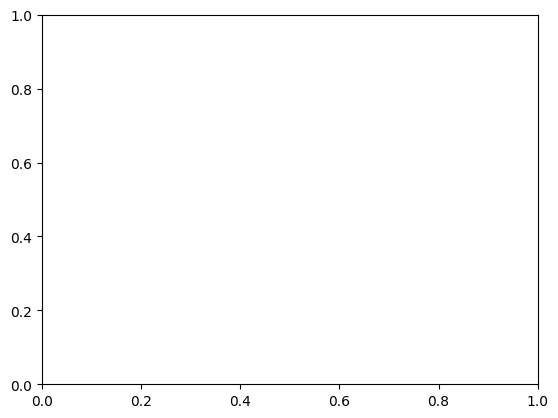

In [306]:
window = 350
w = 1

cov_fn = covariance_multi
thresholds_cov, cov_multi_list = get_threshold(data, cov_fn, roll_sum, cols,
              window=window, w=w, adj_list=adj_list, quantile=1, axis=1, stat_list=None, plot=True)
thresholds_cov_99, cov_multi_list = get_threshold(data, cov_fn, roll_sum, cols,
              window=window, w=w, adj_list=adj_list, quantile=0.99, axis=1, stat_list=cov_multi_list)
thresholds_cov_95, cov_multi_list = get_threshold(data, cov_fn, roll_sum, cols,
              window=window, w=w, adj_list=adj_list, quantile=0.95, axis=1, stat_list=cov_multi_list)

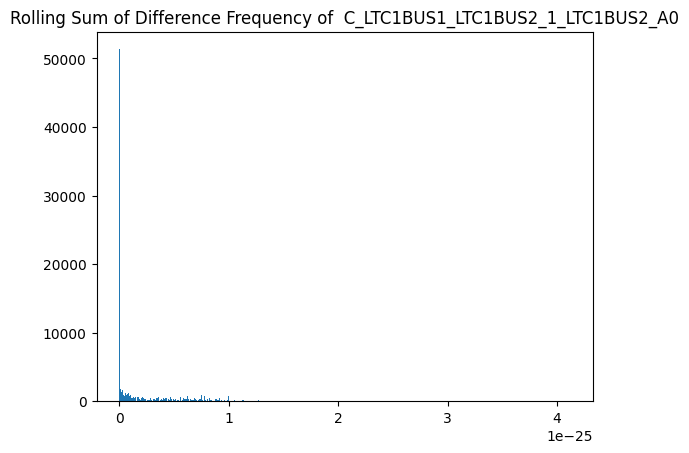

******************************************************************************


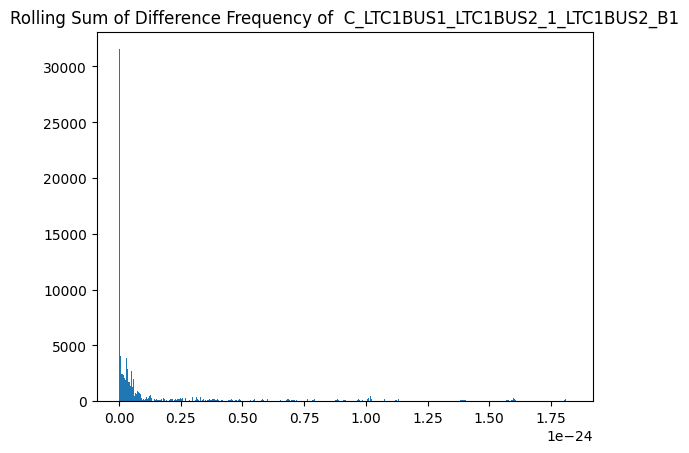

******************************************************************************


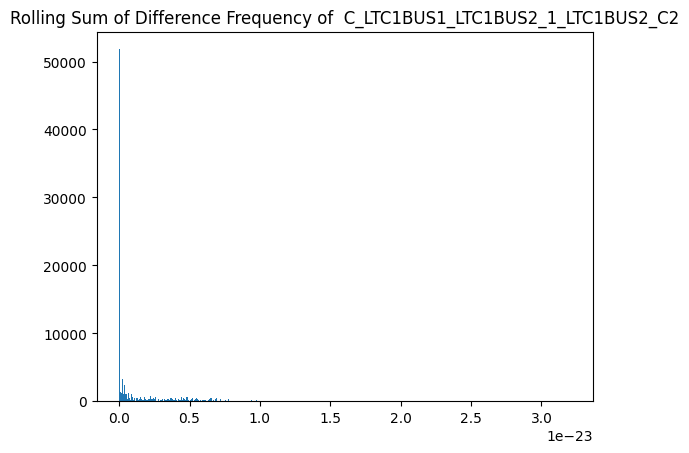

******************************************************************************


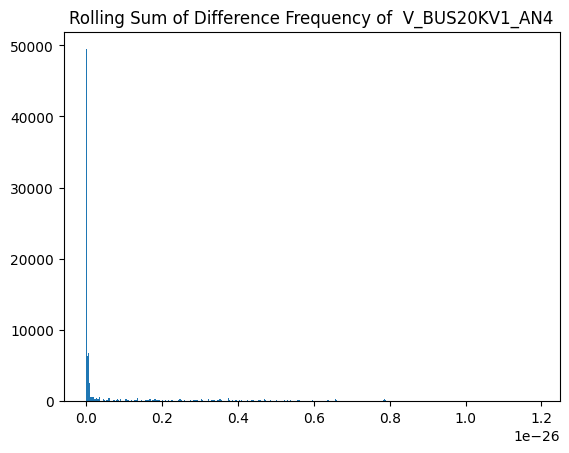

******************************************************************************


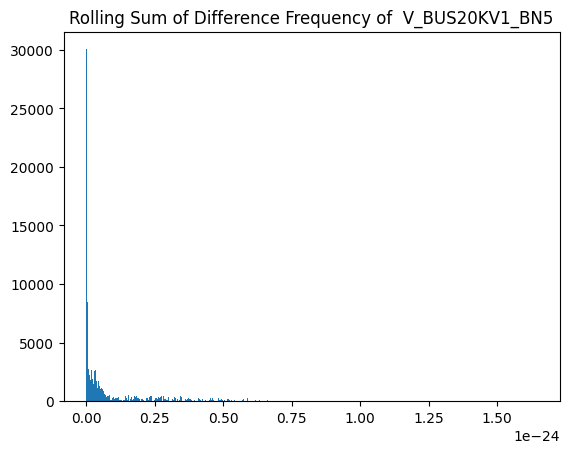

******************************************************************************


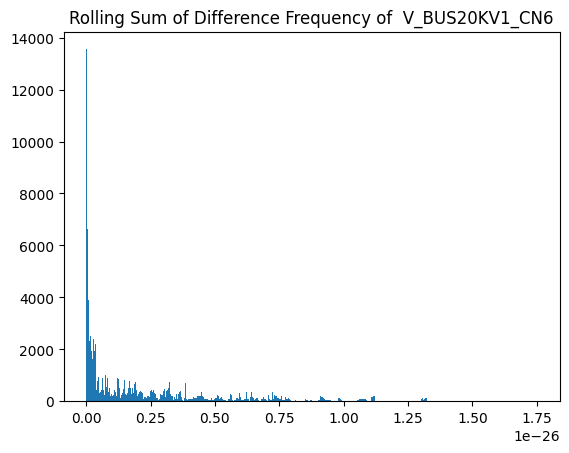

******************************************************************************


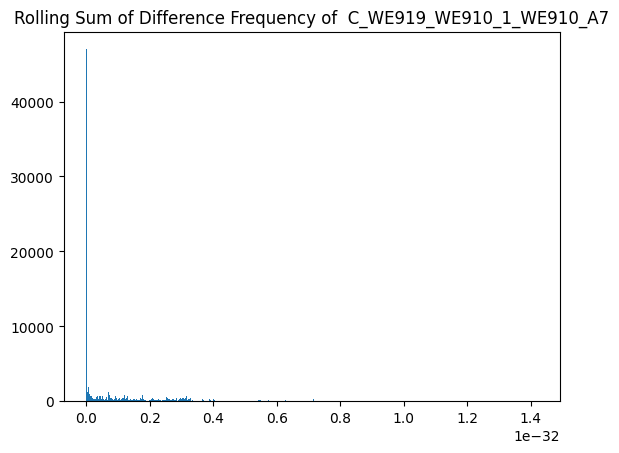

******************************************************************************


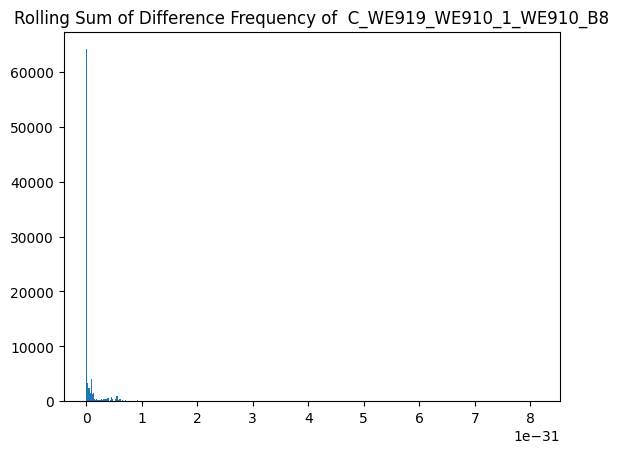

******************************************************************************


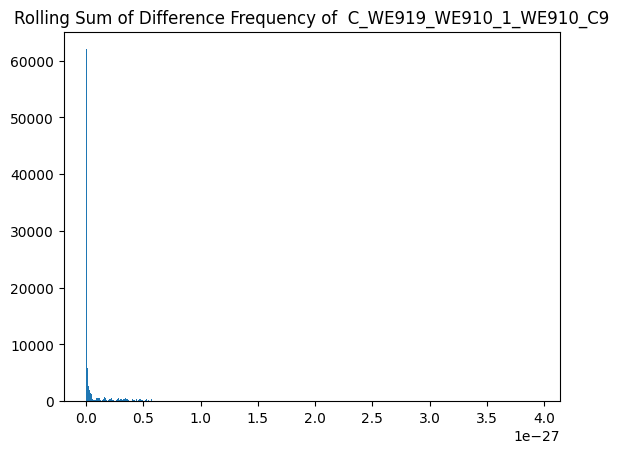

******************************************************************************


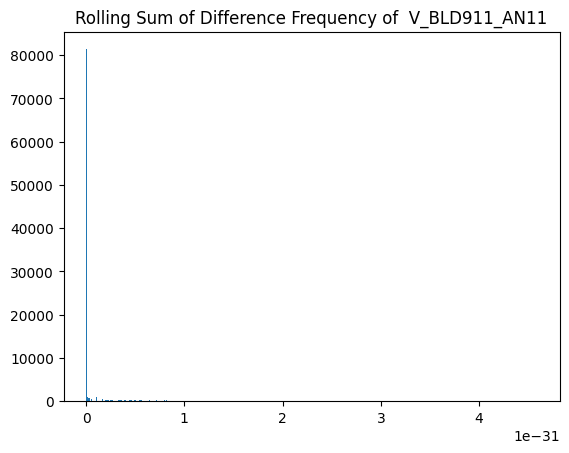

******************************************************************************


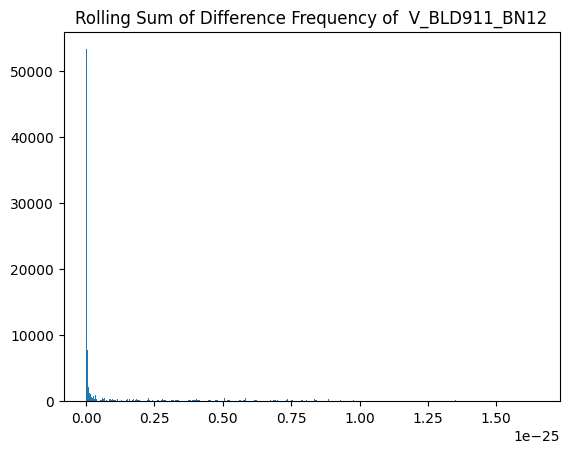

******************************************************************************


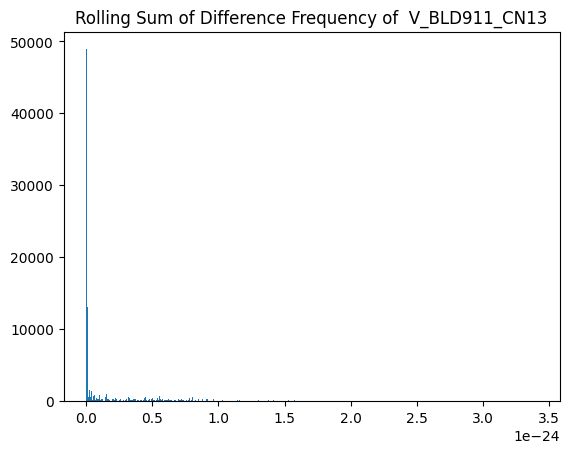

******************************************************************************


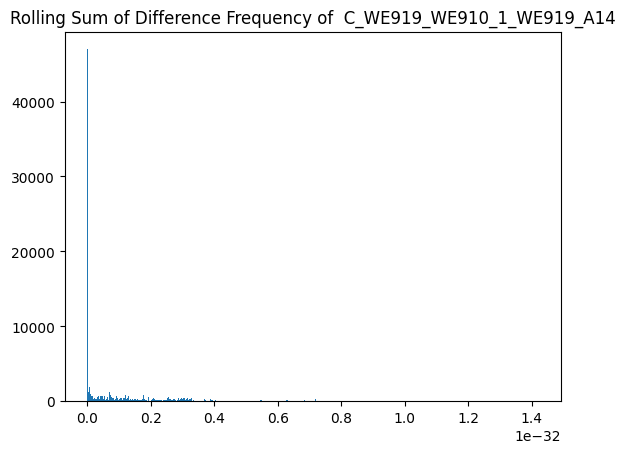

******************************************************************************


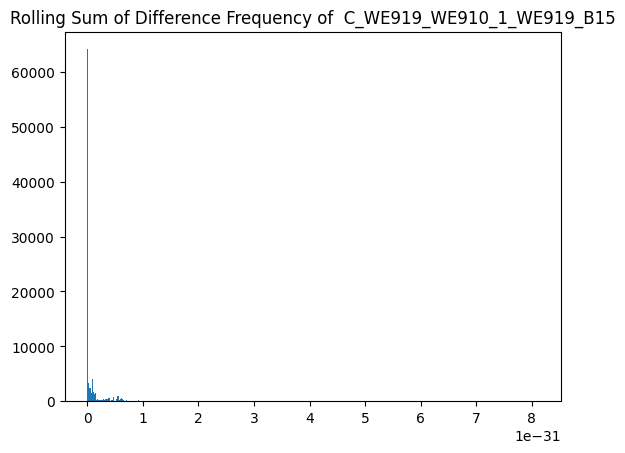

******************************************************************************


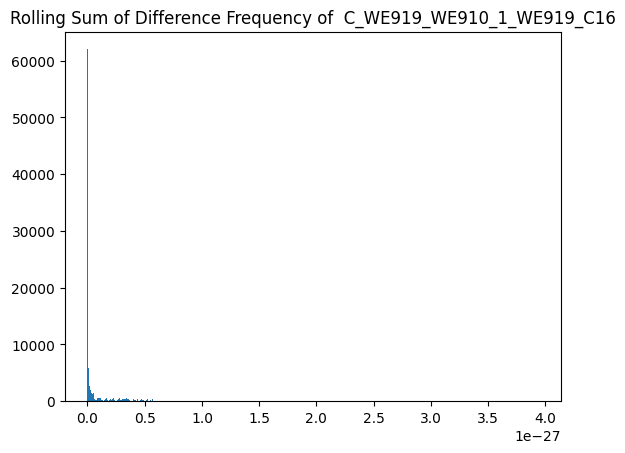

******************************************************************************


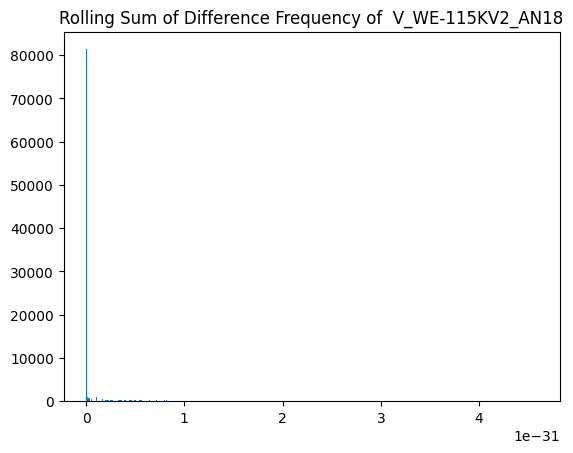

******************************************************************************


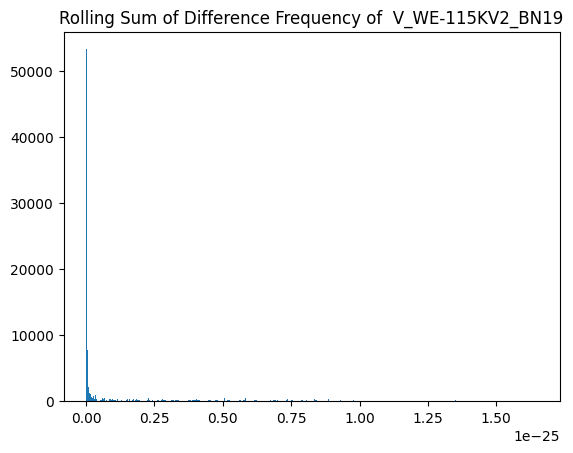

******************************************************************************


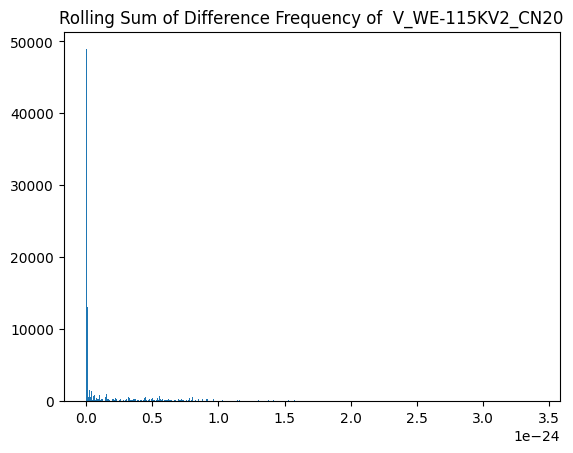

******************************************************************************


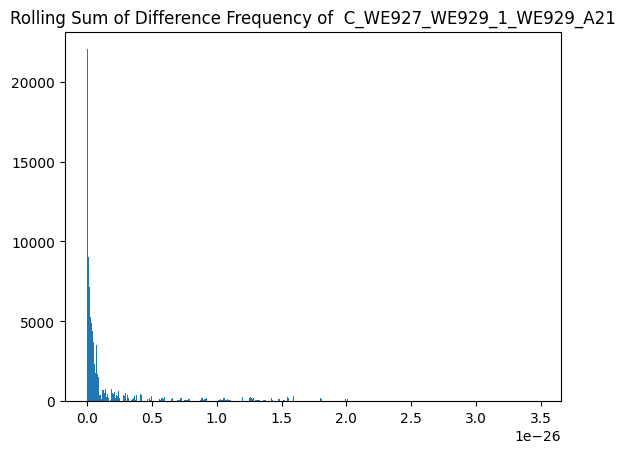

******************************************************************************


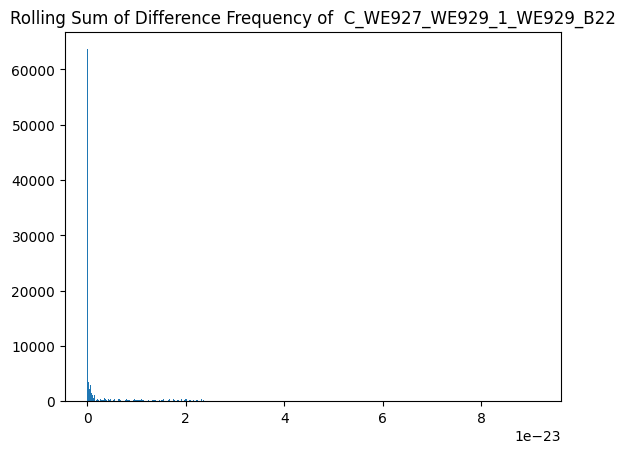

******************************************************************************


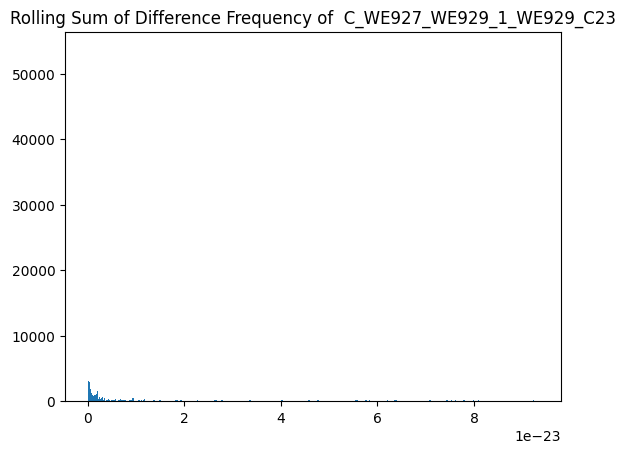

******************************************************************************


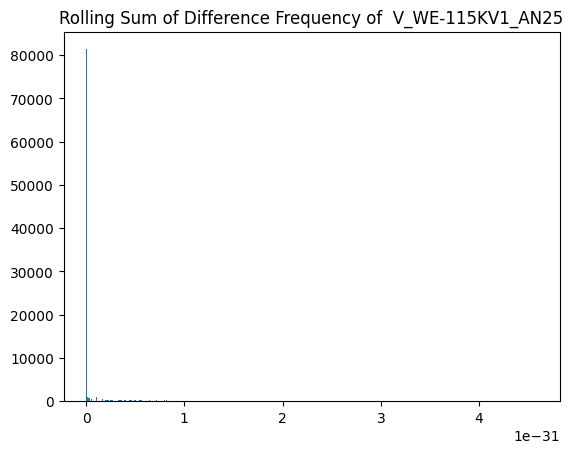

******************************************************************************


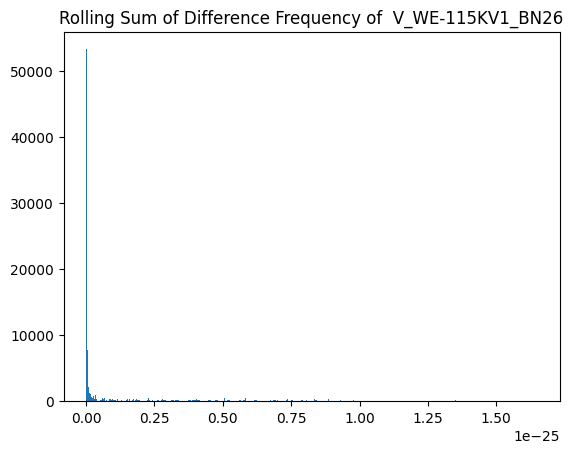

******************************************************************************


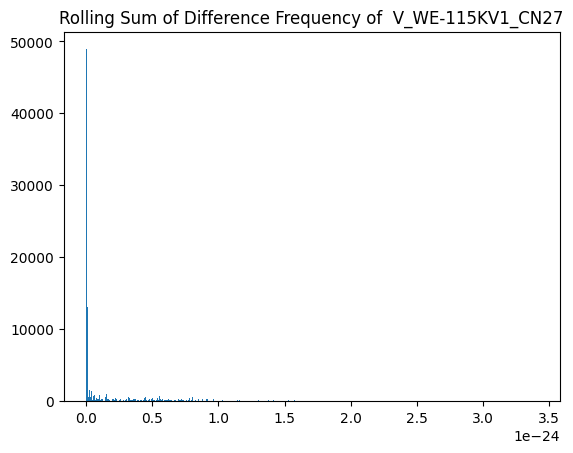

******************************************************************************


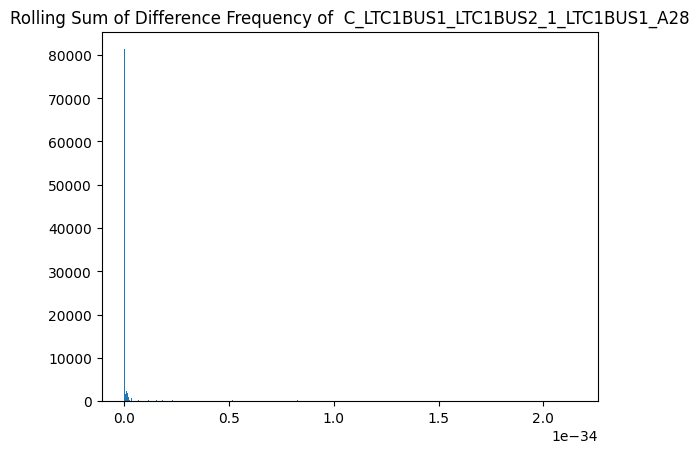

******************************************************************************


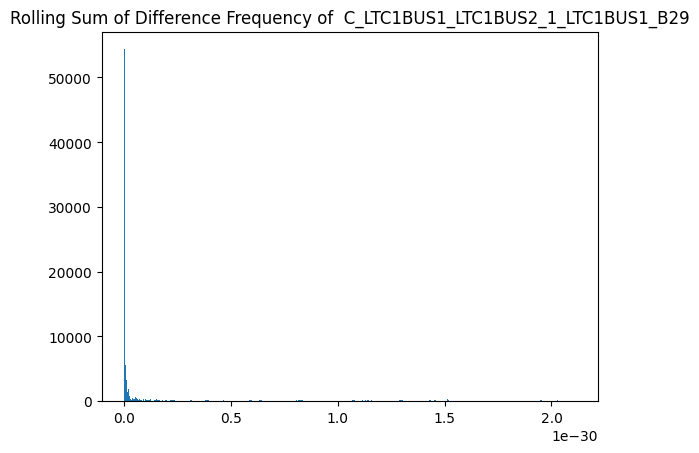

******************************************************************************


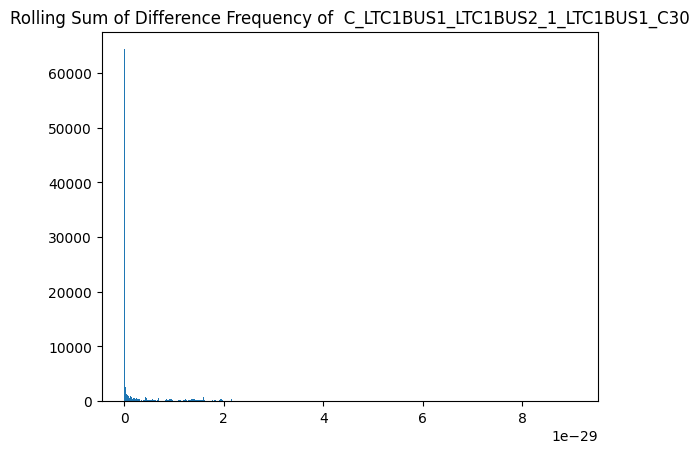

******************************************************************************


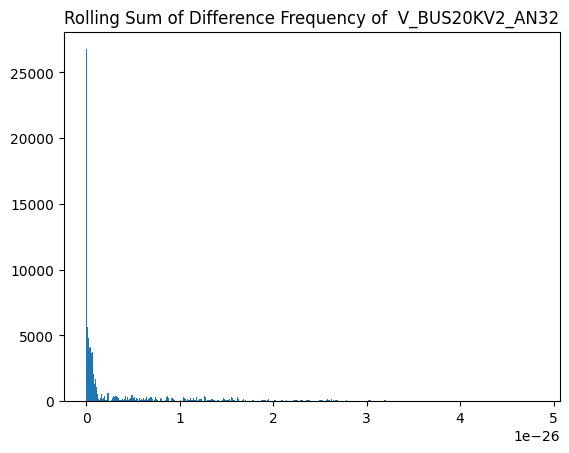

******************************************************************************


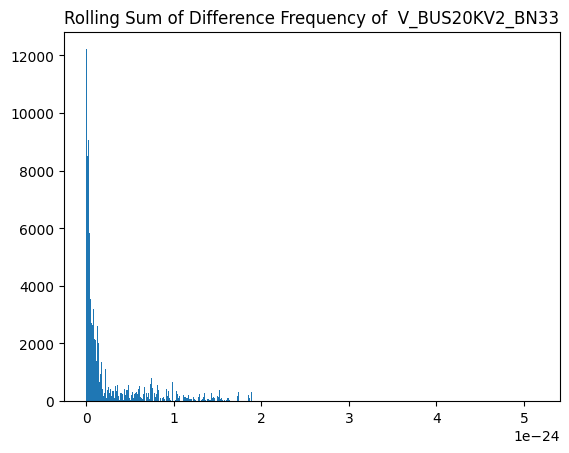

******************************************************************************


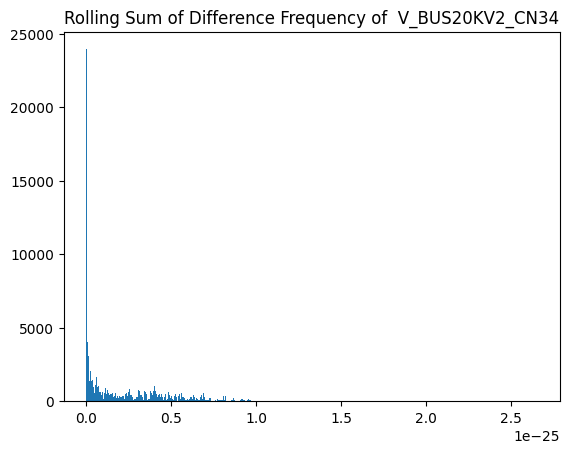

******************************************************************************


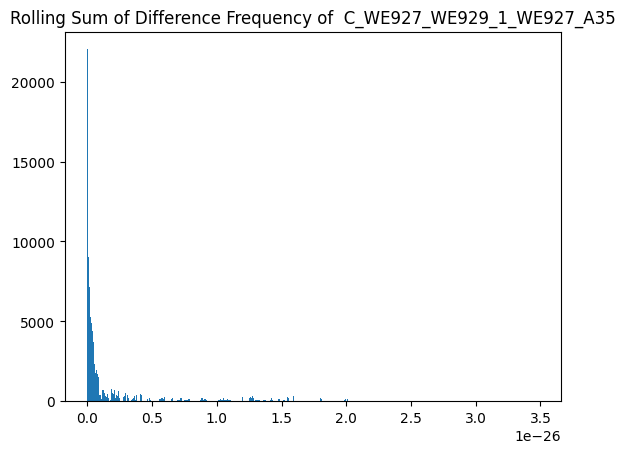

******************************************************************************


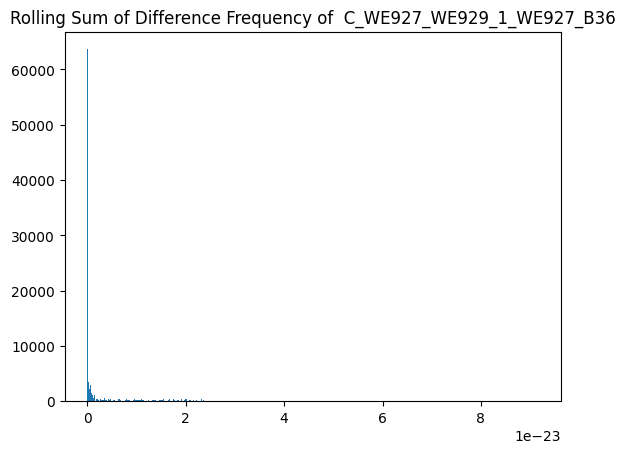

******************************************************************************


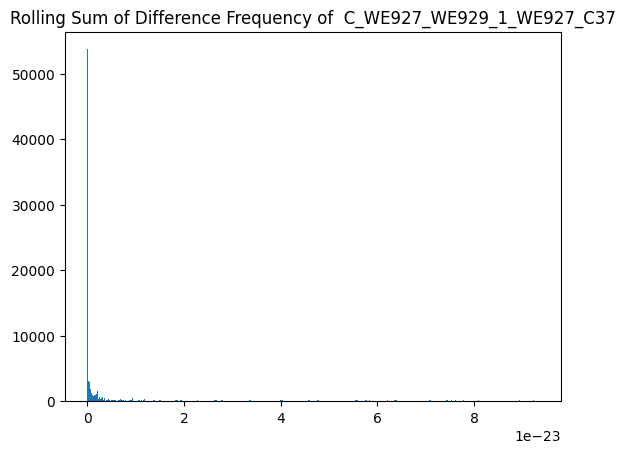

******************************************************************************


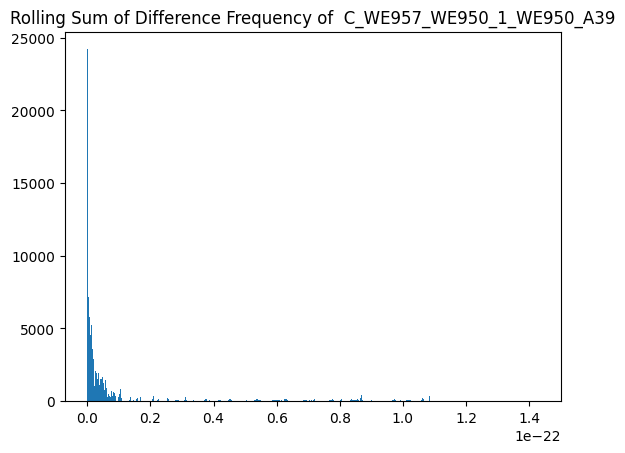

******************************************************************************


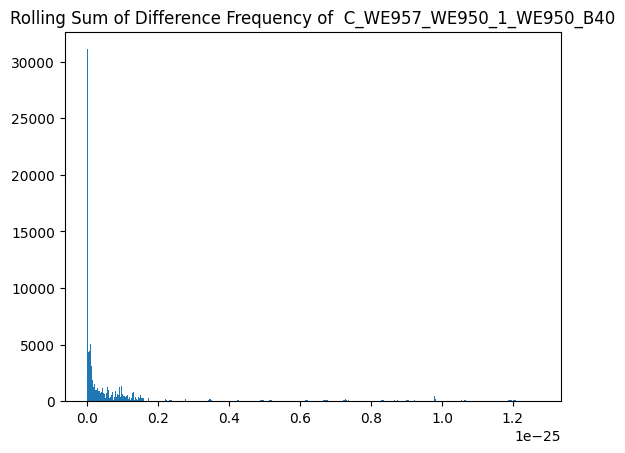

******************************************************************************


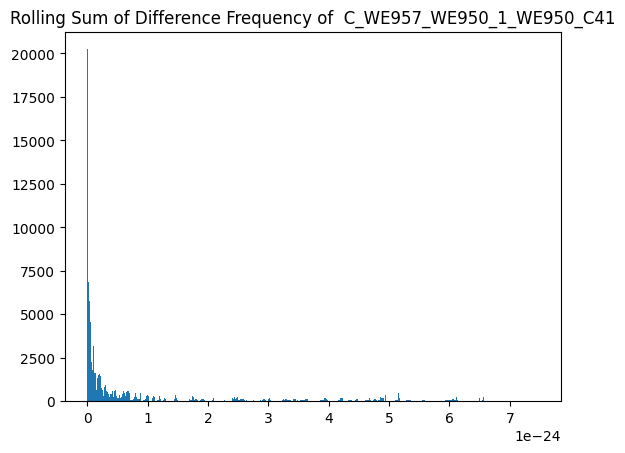

******************************************************************************


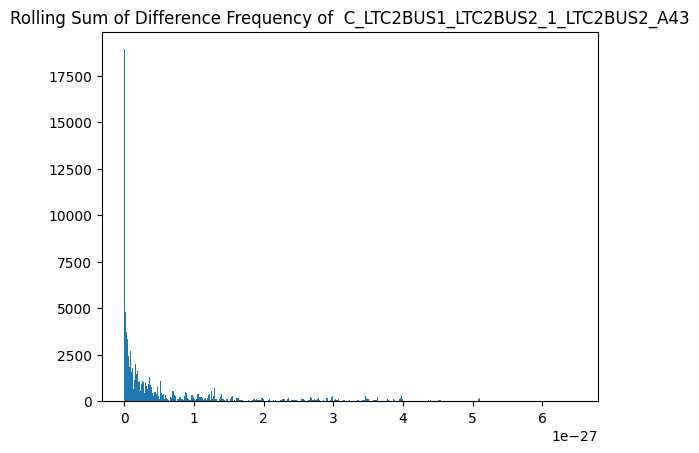

******************************************************************************


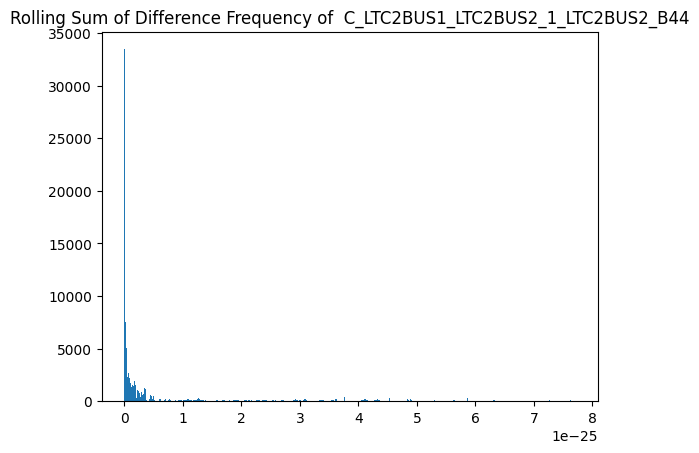

******************************************************************************


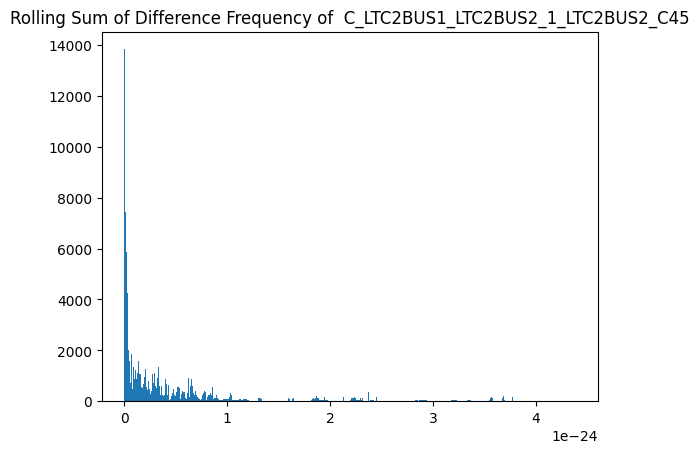

******************************************************************************


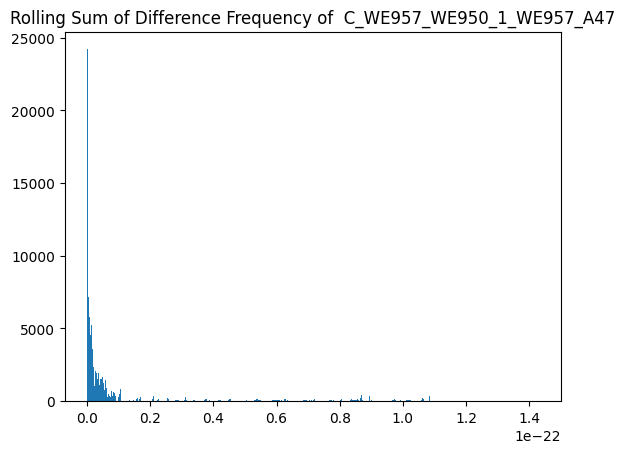

******************************************************************************


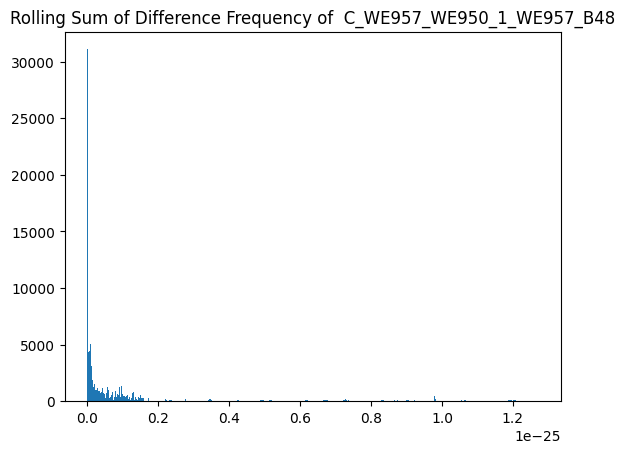

******************************************************************************


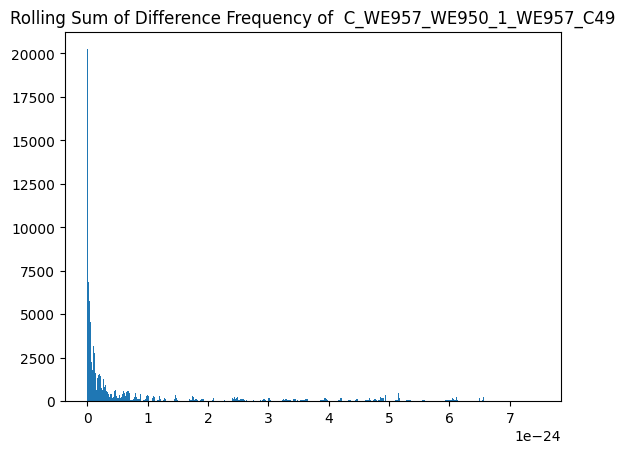

******************************************************************************


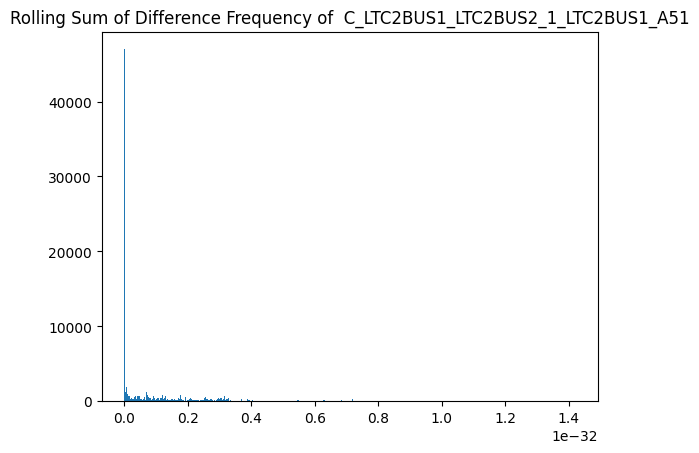

******************************************************************************


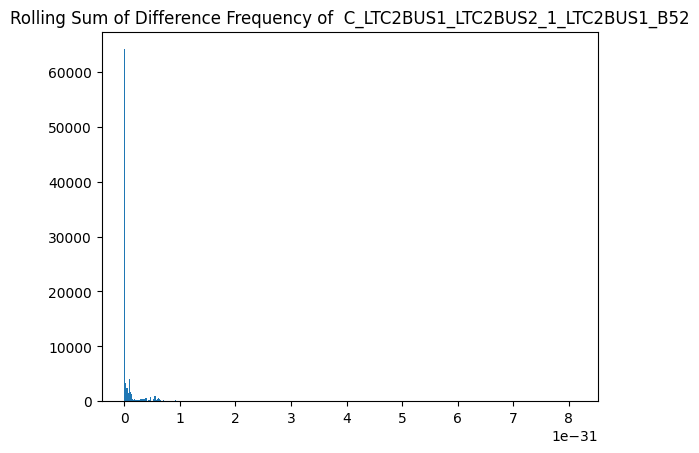

******************************************************************************


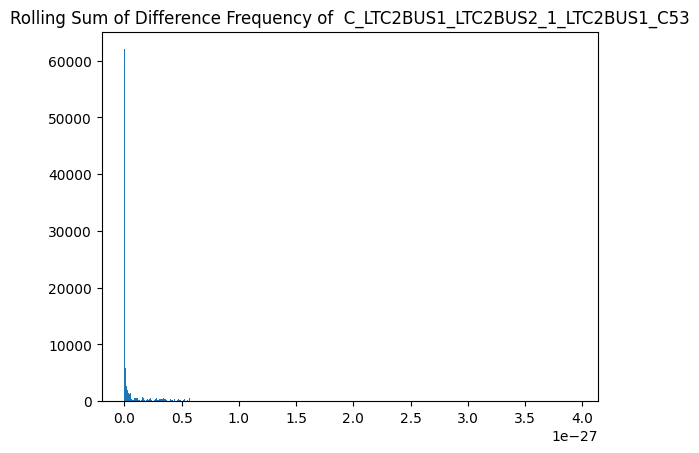

******************************************************************************


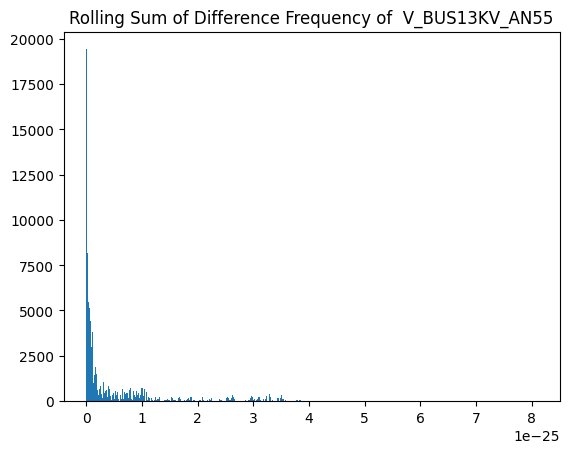

******************************************************************************


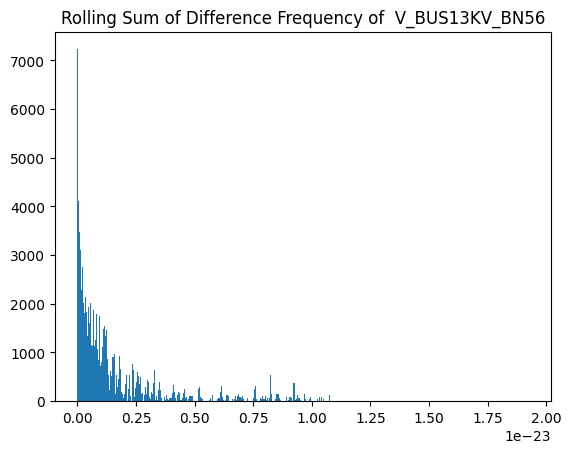

******************************************************************************


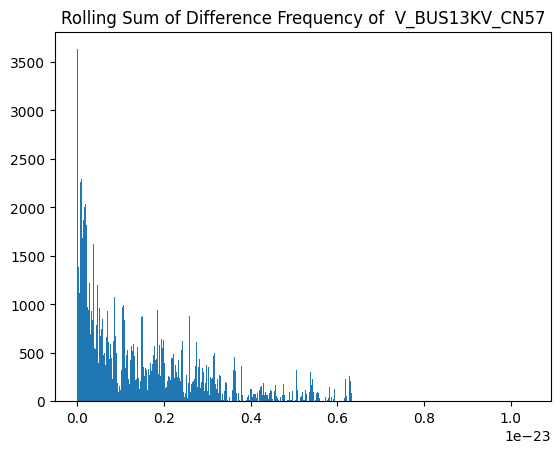

******************************************************************************


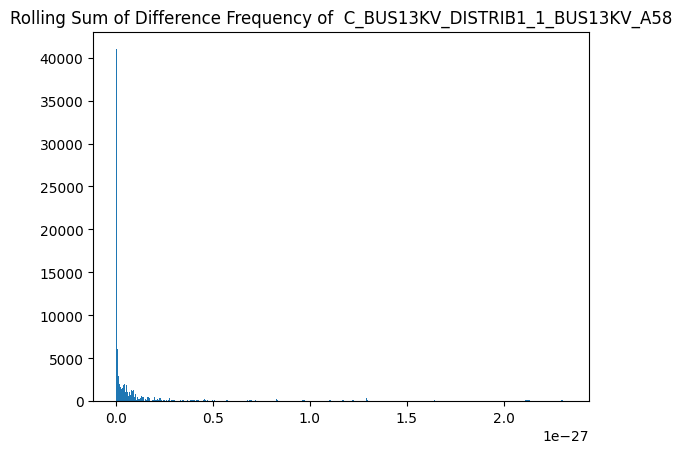

******************************************************************************


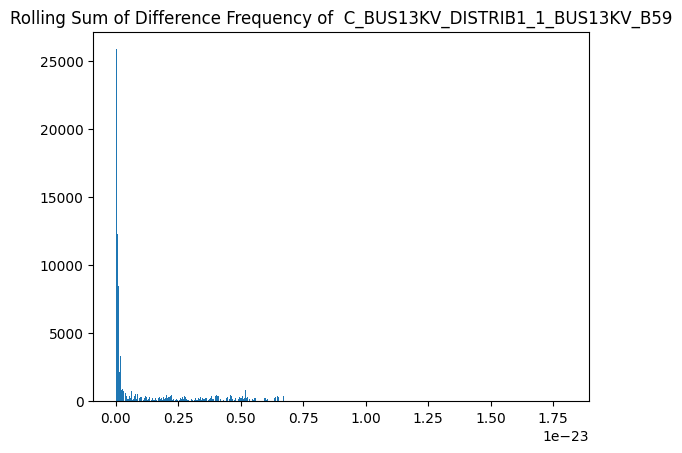

******************************************************************************


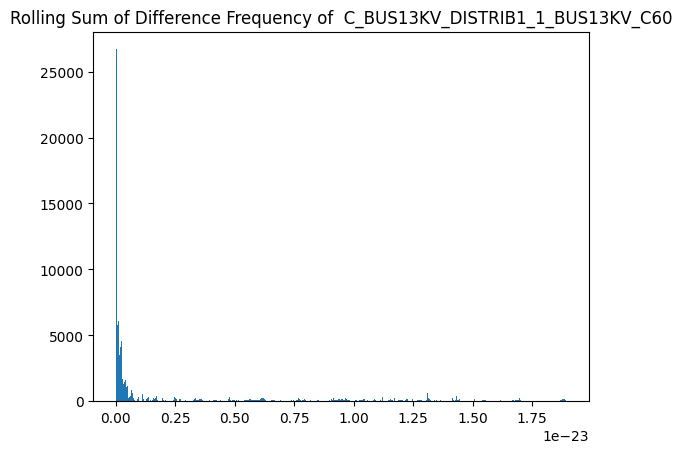

******************************************************************************


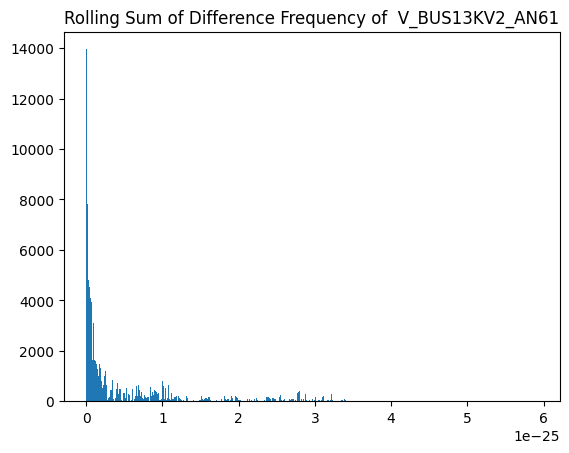

******************************************************************************


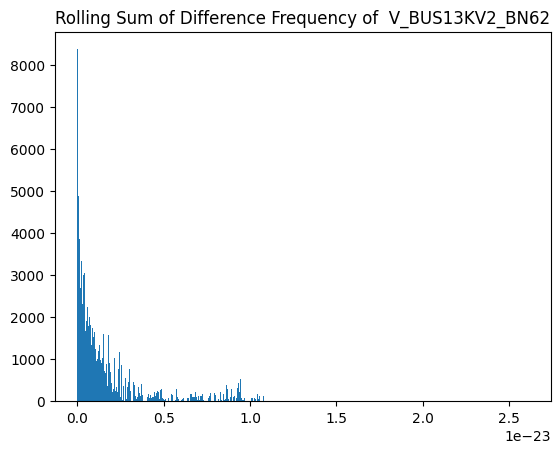

******************************************************************************


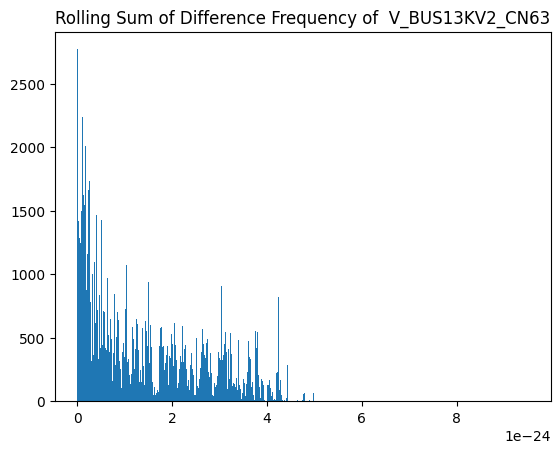

******************************************************************************


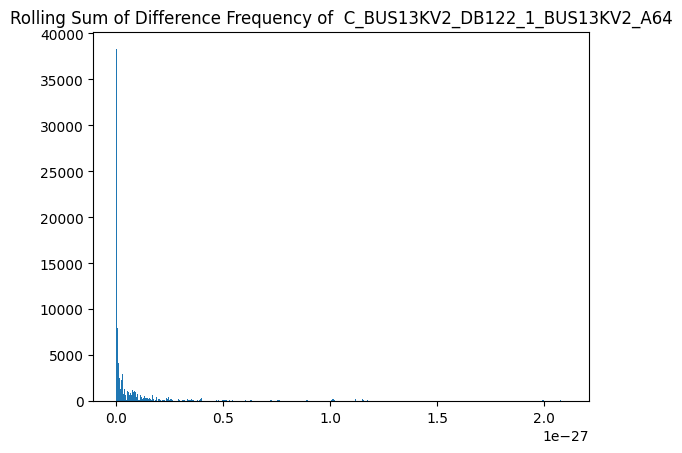

******************************************************************************


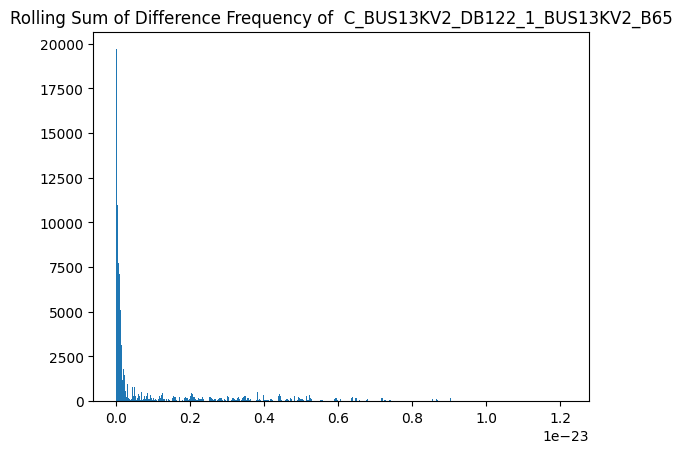

******************************************************************************


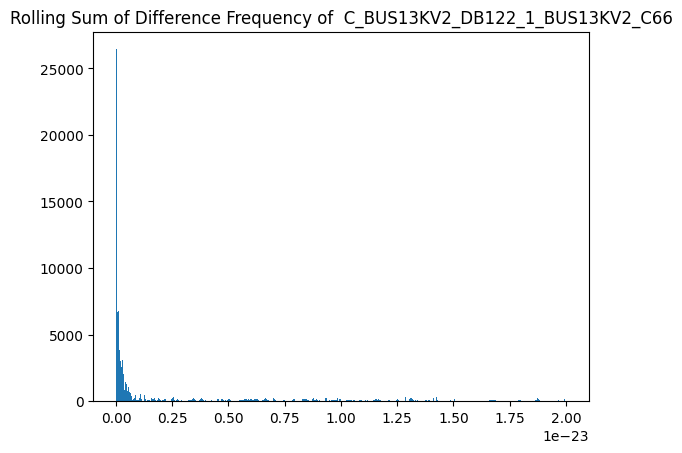

******************************************************************************


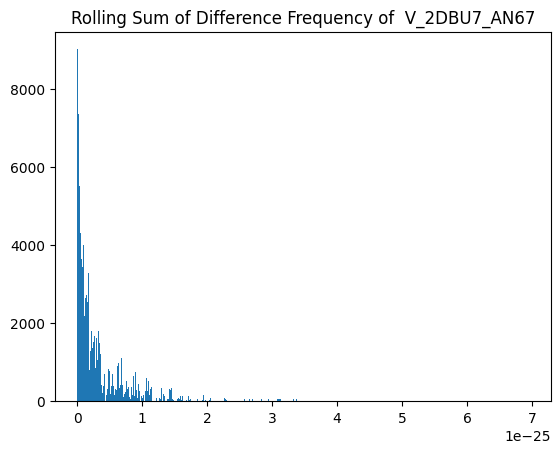

******************************************************************************


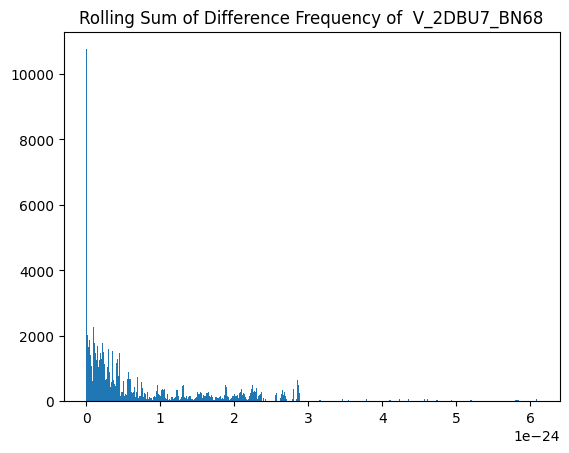

******************************************************************************


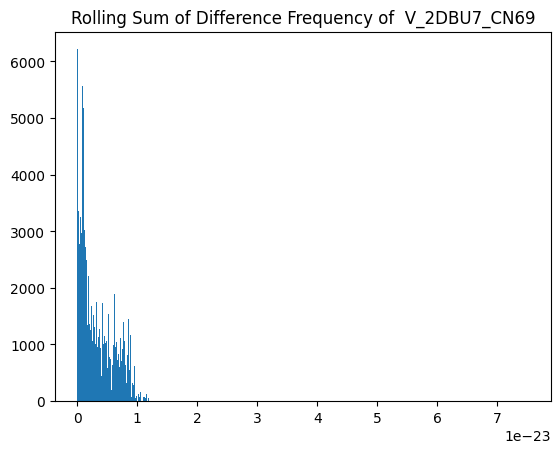

******************************************************************************


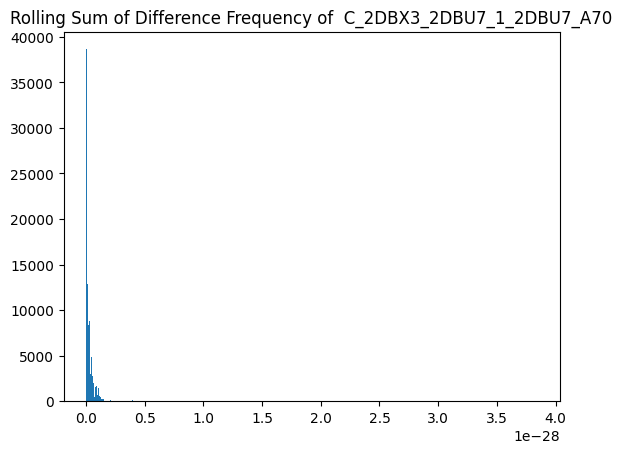

******************************************************************************


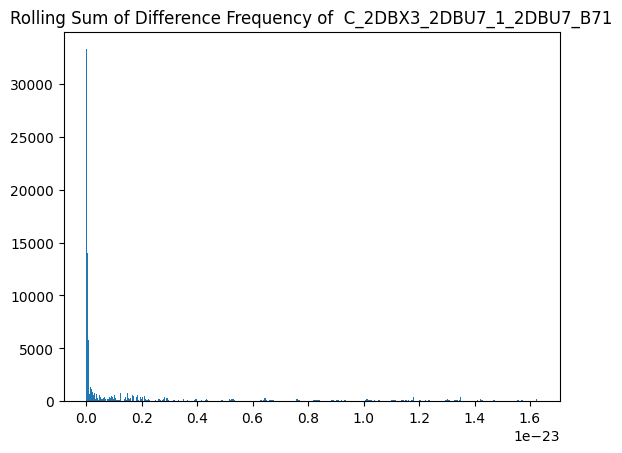

******************************************************************************


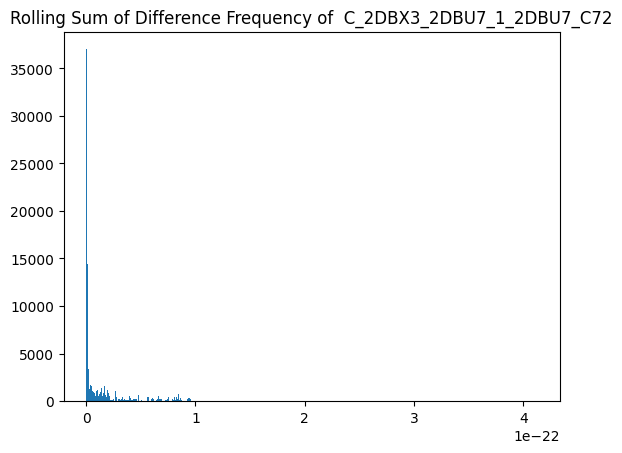

******************************************************************************


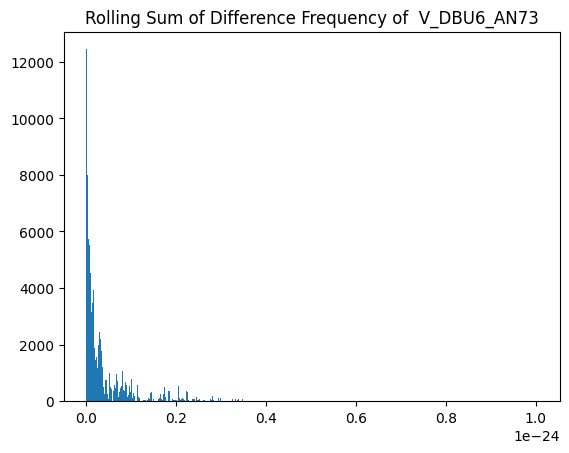

******************************************************************************


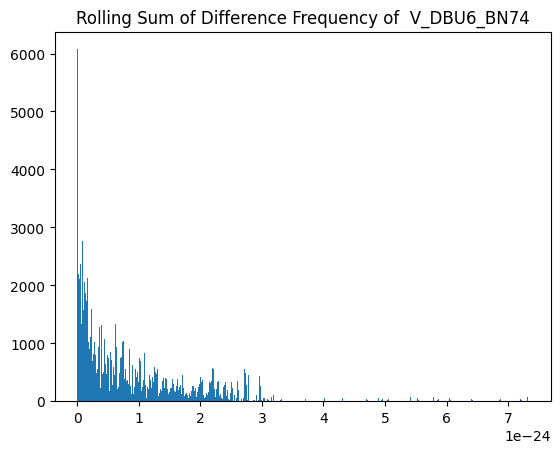

******************************************************************************


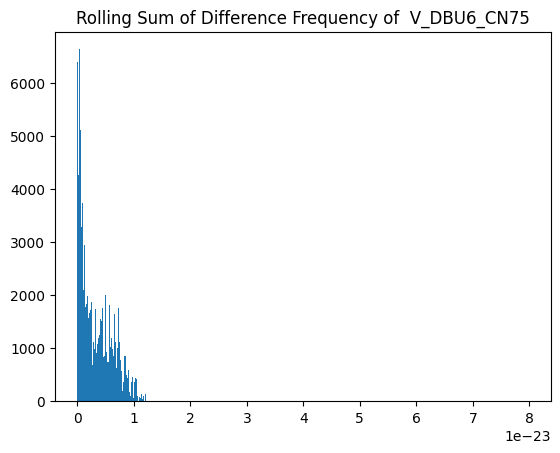

******************************************************************************


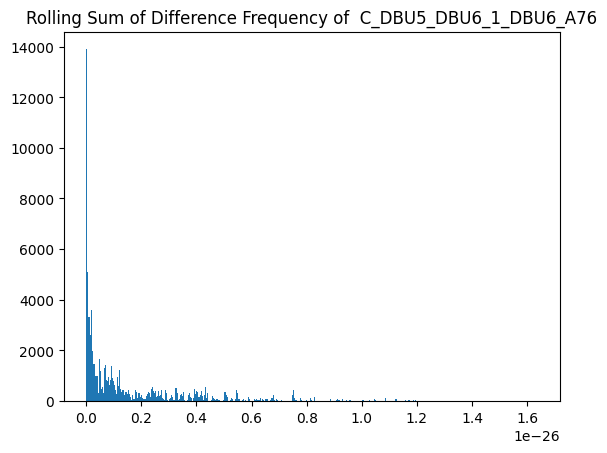

******************************************************************************


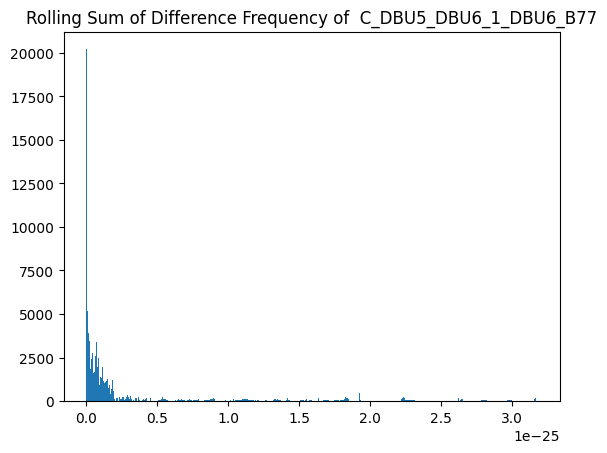

******************************************************************************


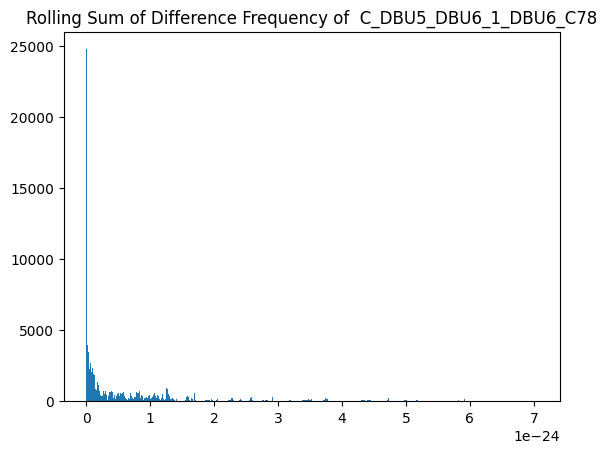

******************************************************************************


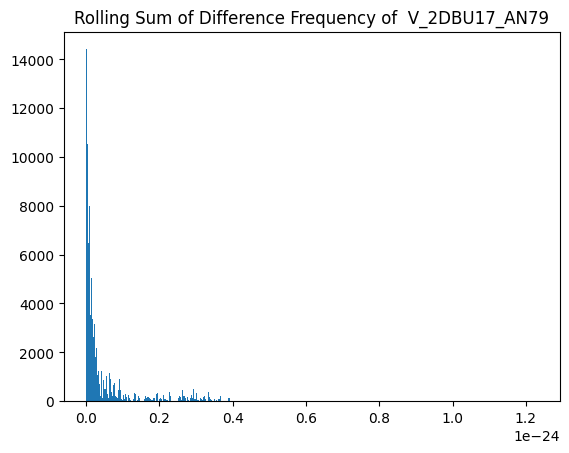

******************************************************************************


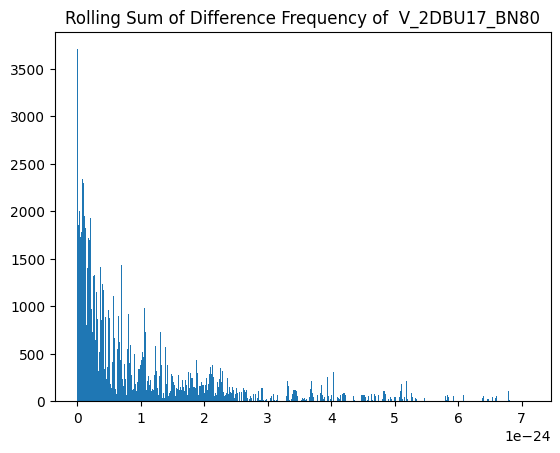

******************************************************************************


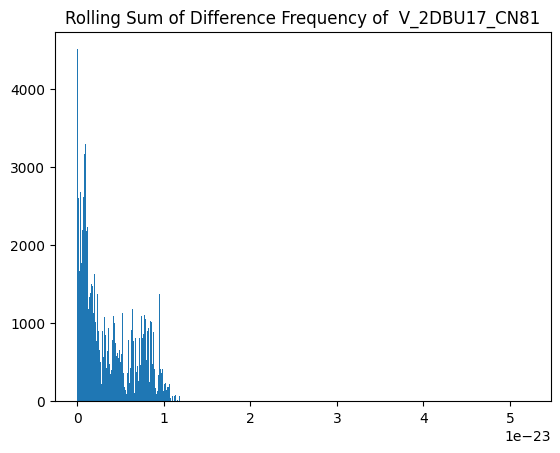

******************************************************************************


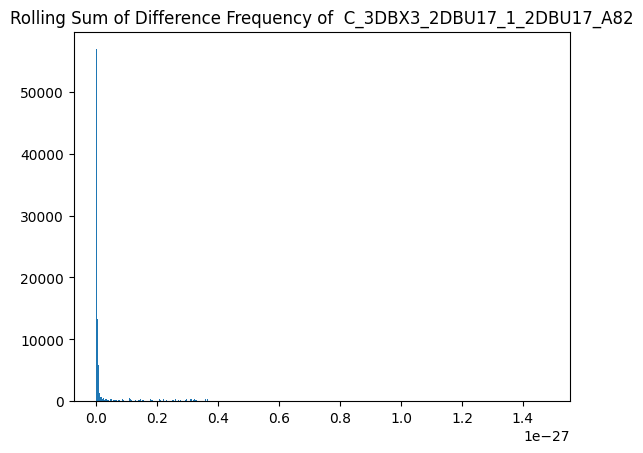

******************************************************************************


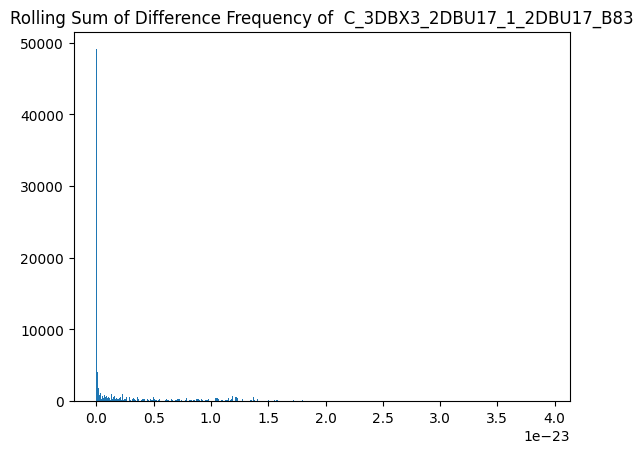

******************************************************************************


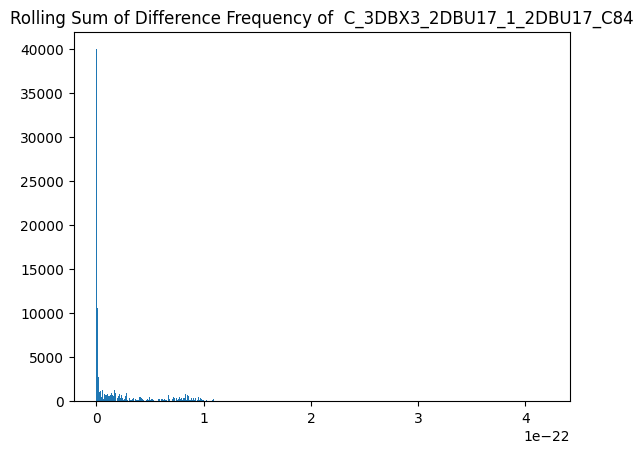

******************************************************************************


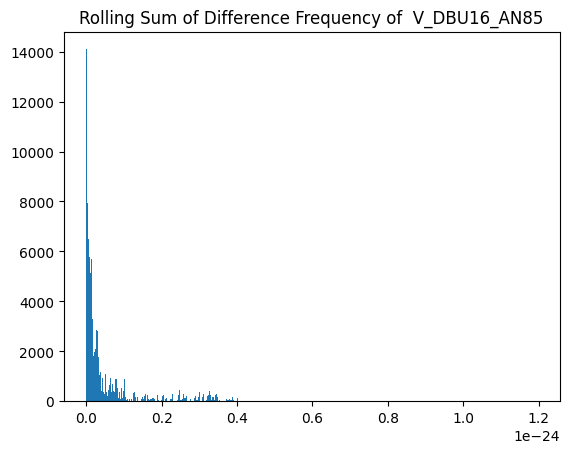

******************************************************************************


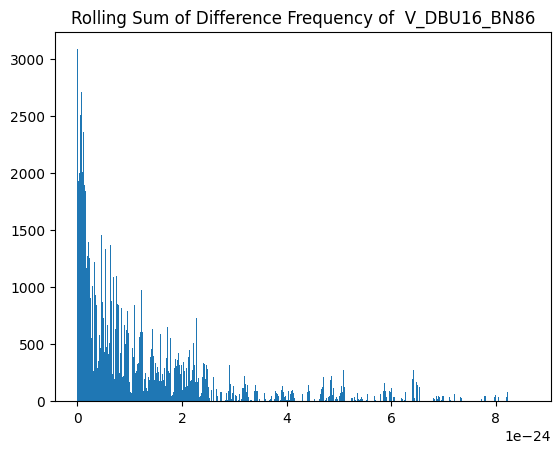

******************************************************************************


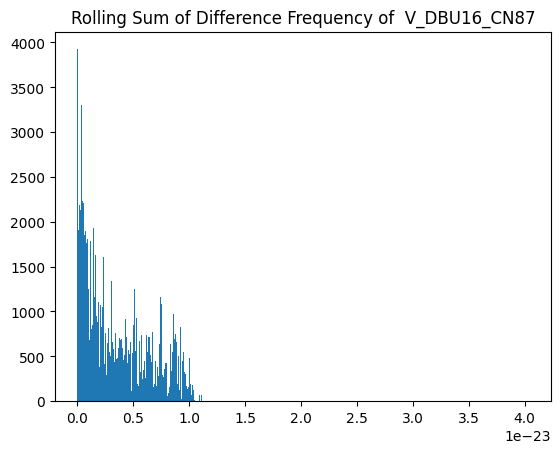

******************************************************************************


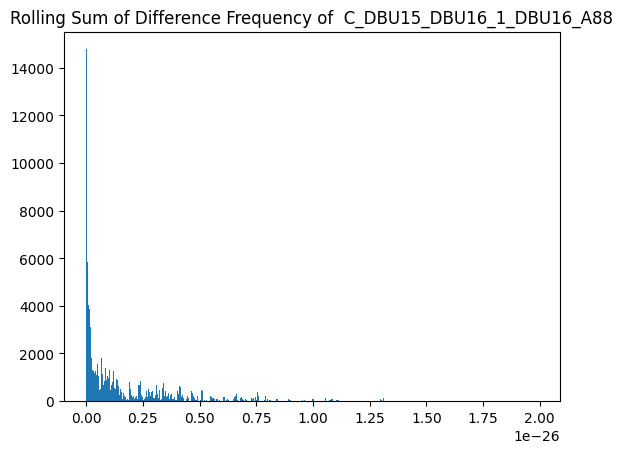

******************************************************************************


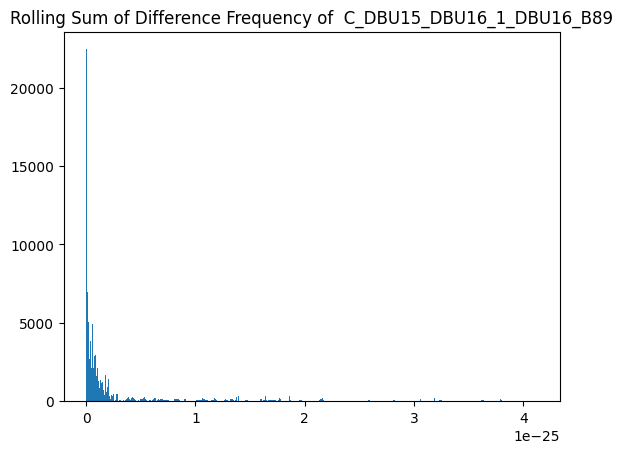

******************************************************************************


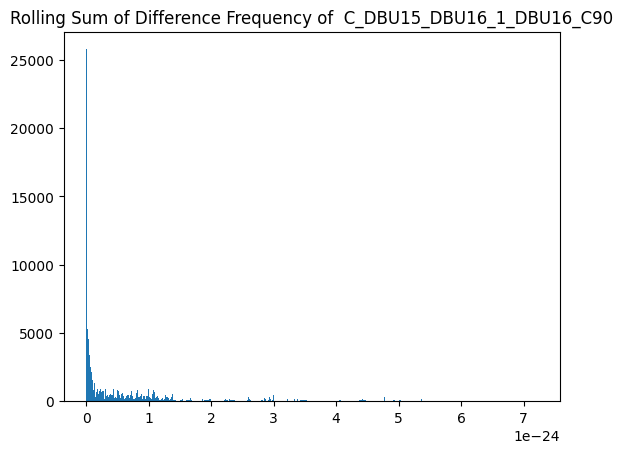

******************************************************************************
******************************************************************************
******************************************************************************
******************************************************************************
******************************************************************************
******************************************************************************
******************************************************************************
******************************************************************************
******************************************************************************
******************************************************************************
******************************************************************************
******************************************************************************
****************************************************

In [307]:
corr_fn = correlation_multi
thresholds_corr, corr_multi_list = get_threshold(data, corr_fn, roll_sum, cols,
              window=window, w=w, adj_list=adj_list, quantile=1, axis=1, stat_list=None, plot=True)
thresholds_corr_99, corr_multi_list = get_threshold(data, corr_fn, roll_sum, cols,
              window=window, w=w, adj_list=adj_list, quantile=0.99, axis=1, stat_list=corr_multi_list)
thresholds_corr_95, corr_multi_list = get_threshold(data, corr_fn, roll_sum, cols,
              window=window, w=w, adj_list=adj_list, quantile=0.95, axis=1, stat_list=corr_multi_list)

In [308]:
len(corr_multi_list)

81

### Testing Data

In [309]:
y_true = np.zeros(len(data_test))
for start, end in all_attack_indices:
    y_true[slice(start, end)] = 1

In [310]:
cov_list = []

for var1_index, var2_indices in adj_list.items():

    var1_index -= 1
    var2_indices = np.array(var2_indices) - 1

    cov_multi = covariance_multi(data_test, var1_index, var2_indices, window=window)
    cov_list.append(
        roll_sum(stat=cov_multi,window=w, axis=0)
    )

rsum_list_cov = np.array(cov_list)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/content/AL_methods.py:358: RuntimeWarning: invalid value encountered in subtract
  def get_threshold_stat_only(data, stat_fn, cols, window=350, w=1, adj_list=adj_list, quantile=1, axis=1, stat_list=None, plot=False):
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1423: RuntimeWarning: overflow encountered in subtract
  a = op(a[slice1], a[slice2])


In [311]:
corr_list = []

for var1_index, var2_indices in adj_list.items():

    var1_index -= 1
    var2_indices = np.array(var2_indices) - 1

    corr_multi = correlation_multi(data_test, var1_index, var2_indices, window=window)
    corr_list.append(
        roll_sum(stat=corr_multi, window=w, axis=0)
    )

rsum_list_corr = np.array(corr_list)

In [312]:
things = list(adj_list.keys())

In [313]:
things.sort()
things

[1,
 2,
 3,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 20,
 21,
 22,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 31,
 33,
 34,
 35,
 36,
 37,
 38,
 40,
 41,
 42,
 44,
 45,
 46,
 48,
 49,
 50,
 52,
 53,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91]

In [314]:
attacks

{1.1: [[52, 44, 59, 48, 15], [53, 45, 60, 49, 16], [54, 17, 50, 46, 61]],
 5.0: [[5, 12, 26, 19, 62]],
 6.6: [[66, 2, 30, 90, 84]],
 9.0: [[68, 56, 74],
  [69, 57, 75],
  [70, 58, 76],
  [71, 59, 77],
  [72, 60, 78],
  [73, 79, 61]],
 10.5: [[36, 22], [37, 23], [38, 24]],
 16.2: [[77, 59, 71], [78, 60, 72], [79, 61, 73]],
 17.4: [[86, 62, 80], [87, 63, 81], [88, 64, 82]]}

In [315]:
attack_start_times

[1.1, 5.0, 6.6, 9.0, 10.5, 16.2, 17.4]

In [316]:
hops

{2.1: [52, 53, 54, 55],
 5.9: [5],
 7.8: [66],
 10.1: [68, 69, 70, 71, 72, 73],
 11.7: [36, 37, 38, 39],
 17.0: [77, 78, 79],
 18.3: [86, 87, 88]}

In [317]:
all_attack_indice

[(4080, 8879),
 (22800, 27119),
 (30480, 36239),
 (42000, 47279),
 (49200, 54959),
 (76560, 80399),
 (82320, 86639)]

In [318]:
attacks_in

{4080: [[52, 44, 59, 48, 15], [53, 45, 60, 49, 16], [54, 17, 50, 46, 61]],
 22800: [[5, 12, 26, 19, 62]],
 30480: [[66, 2, 30, 90, 84]],
 42000: [[68, 56, 74],
  [69, 57, 75],
  [70, 58, 76],
  [71, 59, 77],
  [72, 60, 78],
  [73, 79, 61]],
 49200: [[36, 22], [37, 23], [38, 24]],
 76560: [[77, 59, 71], [78, 60, 72], [79, 61, 73]],
 82320: [[86, 62, 80], [87, 63, 81], [88, 64, 82]]}

In [319]:
total_normal = rsum_list_corr.shape[1] + 1
for start, end in all_attack_indices:
    total_normal -= (end - start + 1 + 2 * (window + w - 1))
print(total_normal)

55475


# Covariance

In [320]:
thresholds_cov = np.array(thresholds_cov)
thresholds_cov_99 = np.array(thresholds_cov_99)
thresholds_cov_95 = np.array(thresholds_cov_95)

thresholds_corr = np.array(thresholds_corr)
thresholds_corr_99 = np.array(thresholds_corr_99)
thresholds_corr_95 = np.array(thresholds_corr_95)

In [321]:
quantiles = [1., 0.99, 0.95]
rsum_list = rsum_list_cov

print("Covariance")


for i, threshold in enumerate([thresholds_cov, thresholds_cov_99, thresholds_cov_95]):
    print("Threshold:", quantiles[i])

    for persistency in [1, 3]:
        print("Persistency:", persistency)


        # each row is sensor, each col is timestep
        violations = (rsum_list > threshold.reshape(-1, 1))
        ADD = detection_delay(violations.any(axis=0), sorted(list(all_attack_indices)), window, w, persistency)
        print(f"DD: {ADD}")
        LD = localisation_delay(violations, sorted(list(all_attack_indices)), window, w, persistency)
        print(f"LD: {LD}")
        fpr = FPR(violations.any(axis=0), all_attack_indices, window, w, total_normal, persistency)
        print("FPR", fpr)
        fpr_l = []
        for v in violations:
            fpr_l.append(FPR(v, all_attack_indices, window, w, total_normal, persistency=persistency))
        print("FPR Localisation (Mean):", np.mean(fpr_l))
        print("####################################################")
        print("FPR Localisation:", fpr_l)
        print("****************************************************")
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print()

Covariance
Threshold: 1.0
Persistency: 1
DD: [0, 0, 0, 0, 0, 0, 0]
LD: [[0, 0, 0], [None], [0], [None, None, None, 0, 0, 0], [0, 0, 0], [0, 0, 0], [None, None, None]]
FPR 1.0
FPR Localisation (Mean): 0.2015812546151083
####################################################
FPR Localisation: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.353498936438692, 0.31975339798824676, 0.00021631755416952087, 0.0, 0.0, 0.0, 0.353498936438692, 0.31975339798824676, 0.00021631755416952087, 0.0, 0.0, 0.0, 0.8861809135811372, 0.6589393229260555, 0.7717669538883081, 0.0, 0.0, 0.0, 0.6114395933229981, 0.46670512312074125, 0.37253488120560985, 0.0, 0.0, 0.0, 0.8861809135811372, 0.6589393229260555, 0.7717669538883081, 0.315805602624653, 0.8093881818509572, 0.3232144788549591, 0.0, 0.0, 0.0, 0.315805602624653, 0.8093881818509572, 0.3232144788549591, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9999819735371526, 1.0, 0.9999819735371526, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

# Correlation

In [322]:
rsum_list = rsum_list_corr

print("Correlation")

for i, threshold in enumerate([thresholds_corr, thresholds_corr_99, thresholds_corr_95]):
    print("Threshold:", quantiles[i])

    for persistency in [1, 3]:
        print("Persistency:", persistency)


        # each row is sensor, each col is timestep
        violations = (rsum_list > threshold.reshape(-1, 1))
        ADD = detection_delay(violations.any(axis=0), sorted(list(all_attack_indices)), window, w, persistency)
        print("DD:", ADD)
        LD = localisation_delay(violations, sorted(list(all_attack_indices)), window, w, persistency)
        print("LD:", LD)
        fpr = FPR(violations.any(axis=0), all_attack_indices, window, w, total_normal, persistency)
        print("FPR", fpr)

        fpr_l = []
        for v in violations:
            fpr_l.append(FPR(v, all_attack_indices, window, w, total_normal, persistency=persistency))
        print("FPR Localisation (Mean):", np.mean(fpr_l))
        print("####################################################")
        print("FPR Localisation:", fpr_l)
        print("****************************************************")
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print()

Correlation
Threshold: 1.0
Persistency: 1
DD: [None, 136, 21, 0, 0, 0, 0]
LD: [[None, None, None], [340], [None], [None, 314, None, None, None, None], [0, None, None], [0, None, None], [None, 0, None]]
FPR 0.3944550600281213
FPR Localisation (Mean): 0.010915357077523136
####################################################
FPR Localisation: [0.0, 0.08537332804557089, 0.0, 0.01004073980603526, 1.8026462847460072e-05, 0.028589970076071673, 0.0, 0.0, 0.0, 0.0, 0.0055341240941702416, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0055341240941702416, 0.0, 0.16222013916429318, 0.0, 0.02534520676352886, 0.0, 0.0055341240941702416, 0.0, 0.0, 0.0, 0.0, 0.01507012294047662, 3.6052925694920145e-05, 0.0, 0.16222013916429318, 0.0, 0.02534520676352886, 0.00513754191152612, 3.6052925694920145e-05, 0.03491725853553016, 9.013231423730036e-05, 0.0, 0.0, 0.00513754191152612, 3.6052925694920145e-05, 0.03491725853553016, 0.0, 0.0, 1.8026462847460072e-05, 5.407938854238022e-05, 0.03257381836536035, 3.6052925694920145e-05, 0.0,

# Combined

In [323]:
print("Combined")

t_corr = [thresholds_corr, thresholds_corr_99, thresholds_corr_95]
t_cov = [thresholds_cov, thresholds_cov_99, thresholds_cov_95]

for i in range(len(t_cov)):
    print("Threshold:", quantiles[i])

    for persistency in [1, 3]:
        print("Persistency:", persistency)


        # each row is sensor, each col is timestep
        violations = np.logical_or((rsum_list_corr > t_corr[i].reshape(-1, 1)), (rsum_list_cov > t_cov[i].reshape(-1, 1)))
        ADD = detection_delay(violations.any(axis=0), sorted(list(all_attack_indices)), window, w, persistency)
        print("DD:", ADD)
        LD = localisation_delay(violations, sorted(list(all_attack_indices)), window, w, persistency)
        print("LD:", LD)
        fpr = FPR(violations.any(axis=0), all_attack_indices, window, w, total_normal, persistency)
        print("FPR", fpr)

        fpr_l = []
        for v in violations:
            fpr_l.append(FPR(v, all_attack_indices, window, w, total_normal, persistency=persistency))
        print("FPR Localisation (Mean):", np.mean(fpr_l))
        print("####################################################")
        print("FPR Localisation:", fpr_l)
        print("****************************************************")
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print()

Combined
Threshold: 1.0
Persistency: 1
DD: [0, 0, 0, 0, 0, 0, 0]
LD: [[0, 0, 0], [340], [0], [None, 314, None, 0, 0, 0], [0, 0, 0], [0, 0, 0], [None, 0, None]]
FPR 1.0
FPR Localisation (Mean): 0.2078273127172912
####################################################
FPR Localisation: [0.0, 0.08537332804557089, 0.0, 0.01004073980603526, 1.8026462847460072e-05, 0.028589970076071673, 0.353498936438692, 0.31975339798824676, 0.00021631755416952087, 0.0, 0.0055341240941702416, 0.0, 0.353498936438692, 0.31975339798824676, 0.00021631755416952087, 0.0, 0.0055341240941702416, 0.0, 0.8861809135811372, 0.6589393229260555, 0.7717669538883081, 0.0, 0.0055341240941702416, 0.0, 0.6114395933229981, 0.46670512312074125, 0.37253488120560985, 0.01507012294047662, 3.6052925694920145e-05, 0.0, 0.8861809135811372, 0.6589393229260555, 0.7717669538883081, 0.3209431445361791, 0.8093881818509572, 0.35813173739048926, 9.013231423730036e-05, 0.0, 0.0, 0.3209431445361791, 0.8093881818509572, 0.35813173739048926, 0.0,

In [324]:
all_sensors =[]
for i in attacks.values():
    for a in i:
        all_sensors += a
all_sensors

[52,
 44,
 59,
 48,
 15,
 53,
 45,
 60,
 49,
 16,
 54,
 17,
 50,
 46,
 61,
 5,
 12,
 26,
 19,
 62,
 66,
 2,
 30,
 90,
 84,
 68,
 56,
 74,
 69,
 57,
 75,
 70,
 58,
 76,
 71,
 59,
 77,
 72,
 60,
 78,
 73,
 79,
 61,
 36,
 22,
 37,
 23,
 38,
 24,
 77,
 59,
 71,
 78,
 60,
 72,
 79,
 61,
 73,
 86,
 62,
 80,
 87,
 63,
 81,
 88,
 64,
 82]

In [325]:
attack_i = {}
for key, items in attacks_in.items():
  attack_i[key] = []
  for i in items:
    attack_i[key] += i
attack_i

{4080: [52, 44, 59, 48, 15, 53, 45, 60, 49, 16, 54, 17, 50, 46, 61],
 22800: [5, 12, 26, 19, 62],
 30480: [66, 2, 30, 90, 84],
 42000: [68,
  56,
  74,
  69,
  57,
  75,
  70,
  58,
  76,
  71,
  59,
  77,
  72,
  60,
  78,
  73,
  79,
  61],
 49200: [36, 22, 37, 23, 38, 24],
 76560: [77, 59, 71, 78, 60, 72, 79, 61, 73],
 82320: [86, 62, 80, 87, 63, 81, 88, 64, 82]}

***********************************************************************************************
Sensor: 1  C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A


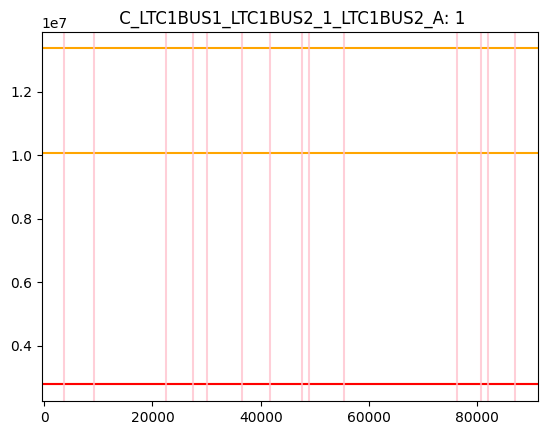

***********************************************************************************************
Sensor: 2  C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B
2
DD = None


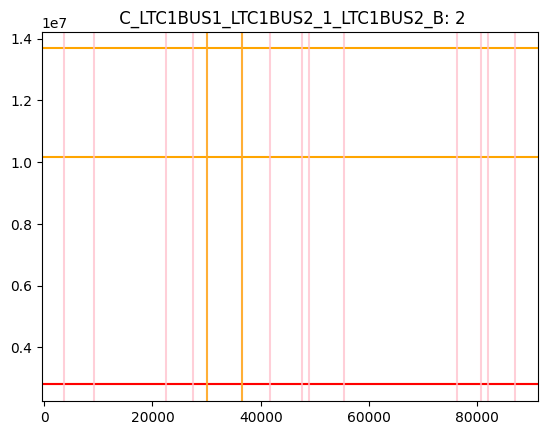

***********************************************************************************************
Sensor: 3  C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C


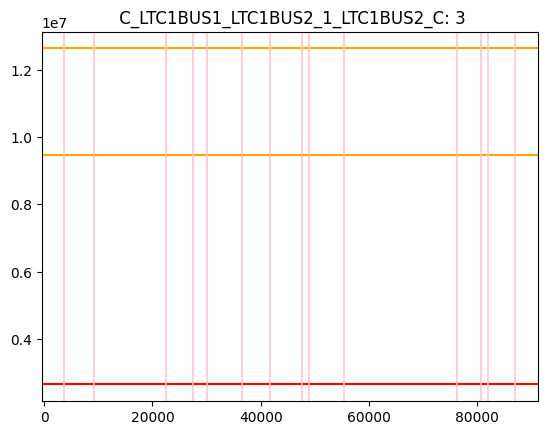

***********************************************************************************************
Sensor: 5  V_BUS20KV1_AN
DD = None
DD = None


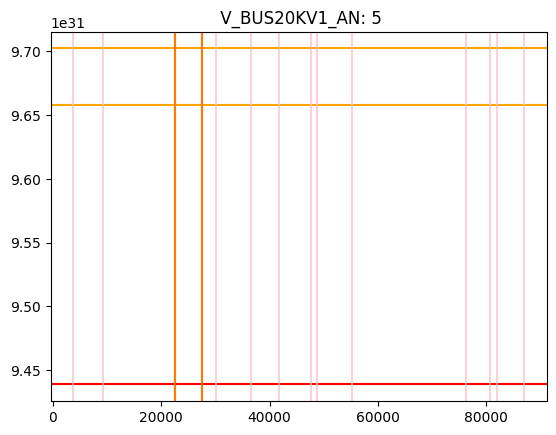

***********************************************************************************************
Sensor: 6  V_BUS20KV1_BN


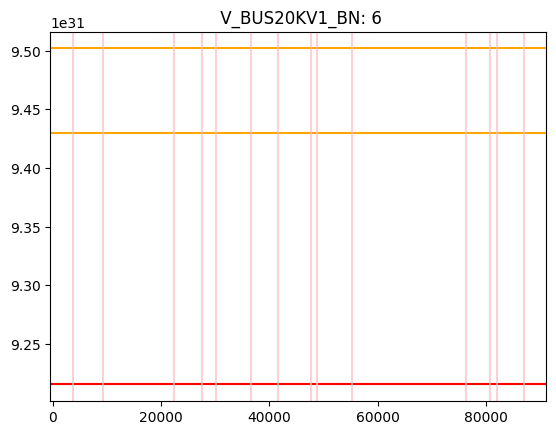

***********************************************************************************************
Sensor: 7  V_BUS20KV1_CN


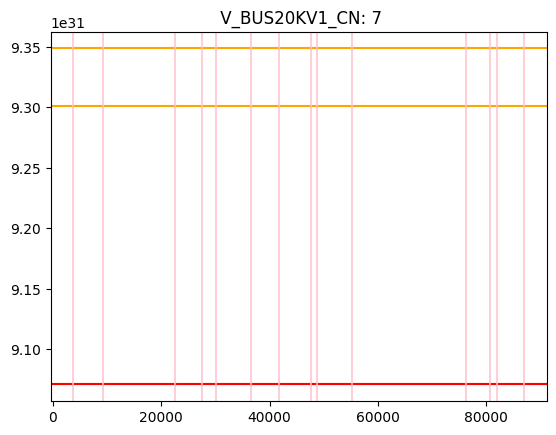

***********************************************************************************************
Sensor: 8  C_WE919_WE910_1_WE910_A


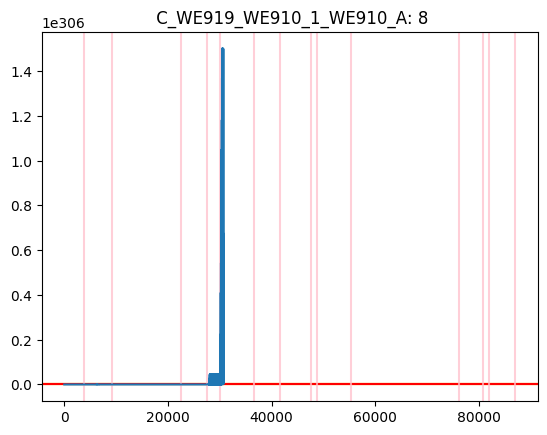

***********************************************************************************************
Sensor: 9  C_WE919_WE910_1_WE910_B


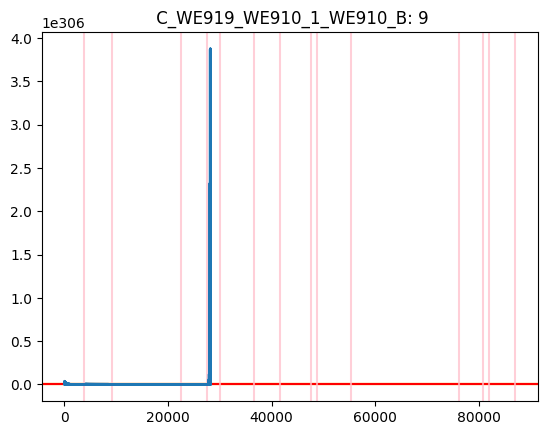

***********************************************************************************************
Sensor: 10  C_WE919_WE910_1_WE910_C


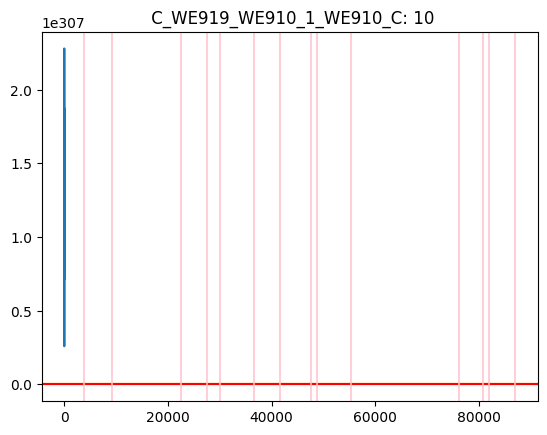

***********************************************************************************************
Sensor: 12  V_BLD911_AN
12
DD = None


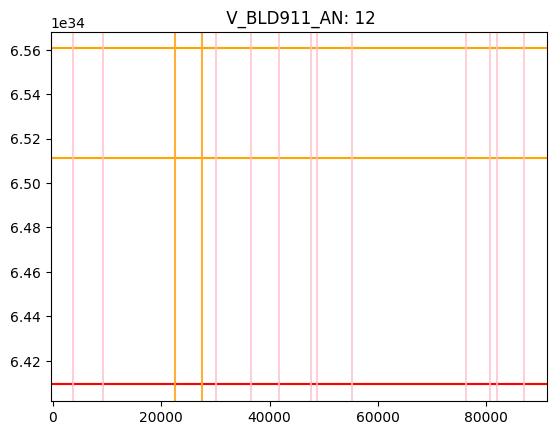

***********************************************************************************************
Sensor: 13  V_BLD911_BN


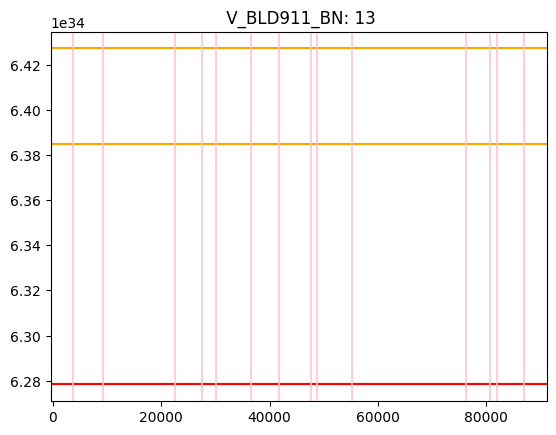

***********************************************************************************************
Sensor: 14  V_BLD911_CN


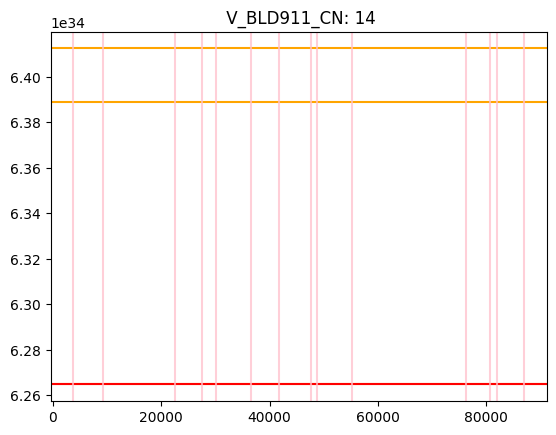

***********************************************************************************************
Sensor: 15  C_WE919_WE910_1_WE919_A
15
DD = 0


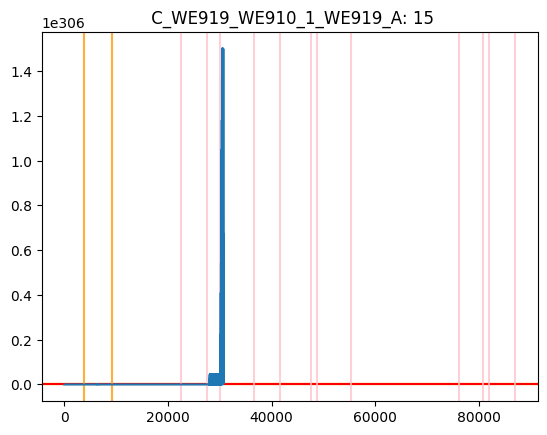

***********************************************************************************************
Sensor: 16  C_WE919_WE910_1_WE919_B
16
DD = 0


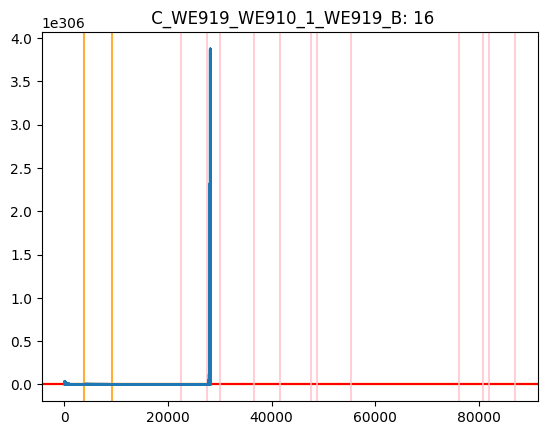

***********************************************************************************************
Sensor: 17  C_WE919_WE910_1_WE919_C
17
DD = None


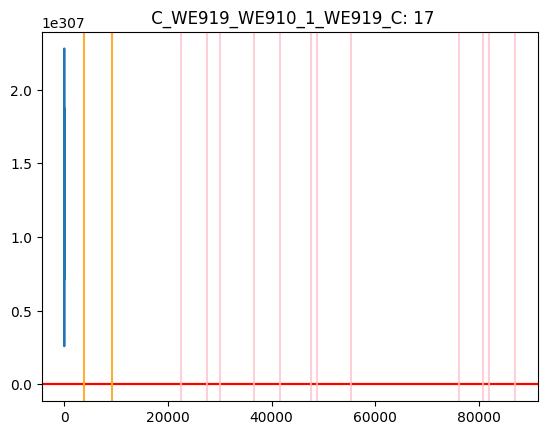

***********************************************************************************************
Sensor: 19  V_WE-115KV2_AN
19
DD = None


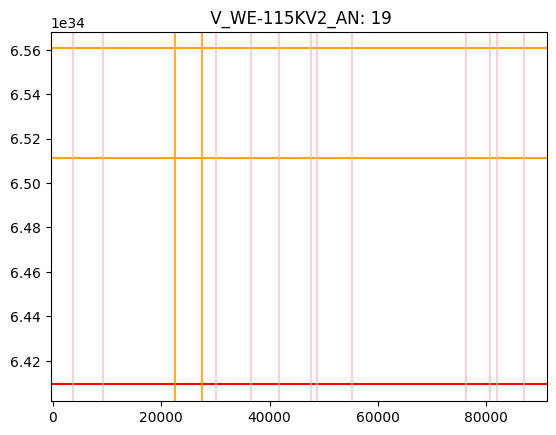

***********************************************************************************************
Sensor: 20  V_WE-115KV2_BN


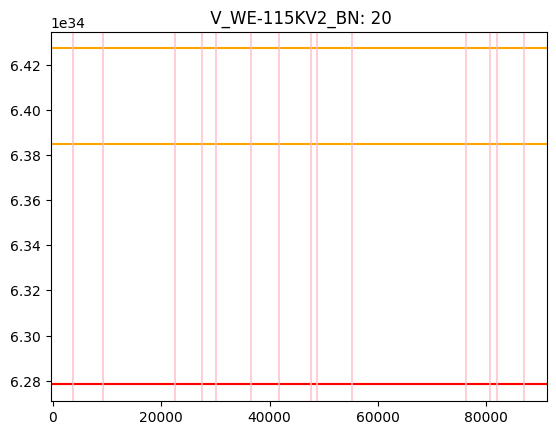

***********************************************************************************************
Sensor: 21  V_WE-115KV2_CN


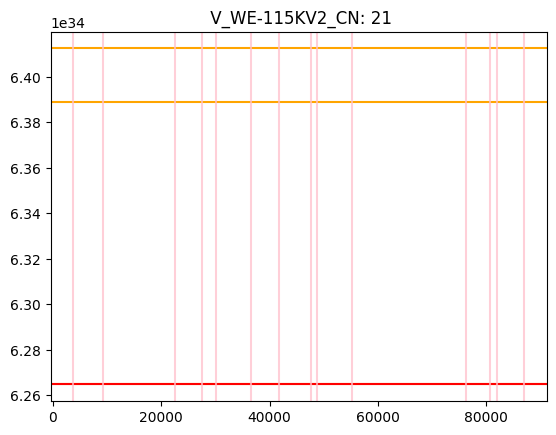

***********************************************************************************************
Sensor: 22  C_WE927_WE929_1_WE929_A
22
DD = 0


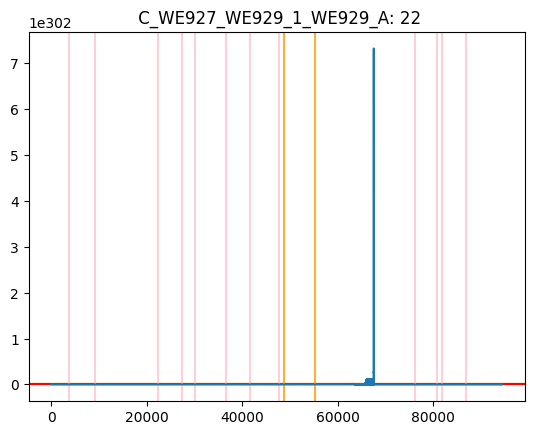

***********************************************************************************************
Sensor: 23  C_WE927_WE929_1_WE929_B
23
DD = 0


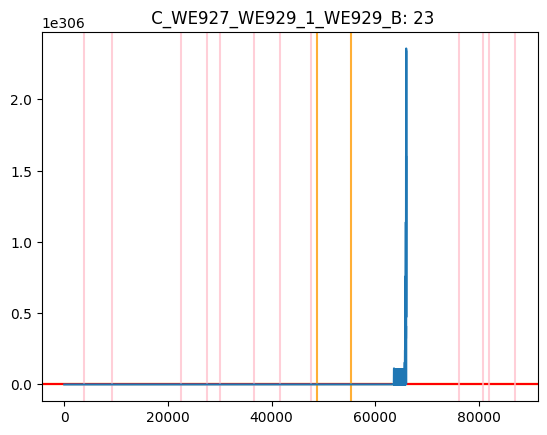

***********************************************************************************************
Sensor: 24  C_WE927_WE929_1_WE929_C
24
DD = 0


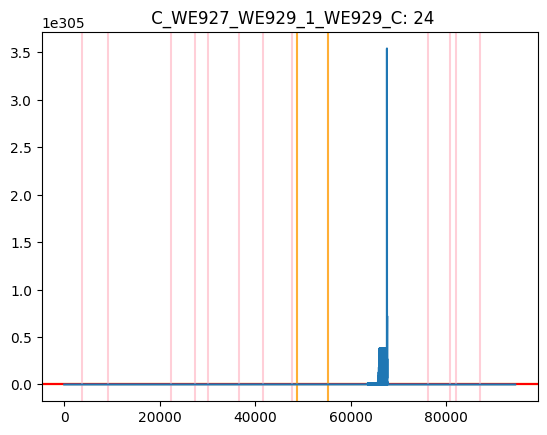

***********************************************************************************************
Sensor: 26  V_WE-115KV1_AN
26
DD = None


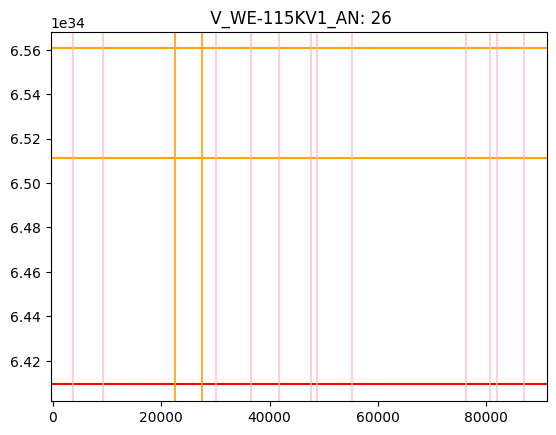

***********************************************************************************************
Sensor: 27  V_WE-115KV1_BN


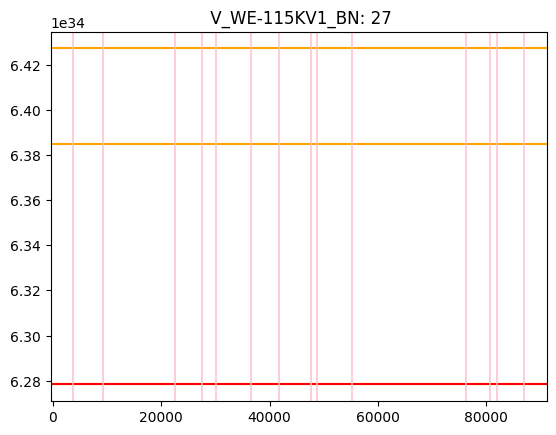

***********************************************************************************************
Sensor: 28  V_WE-115KV1_CN


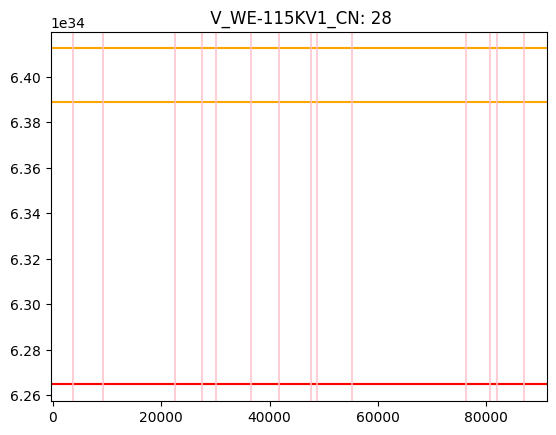

***********************************************************************************************
Sensor: 29  C_LTC1BUS1_LTC1BUS2_1_LTC1BUS1_A


/usr/local/lib/python3.10/dist-packages/matplotlib/ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


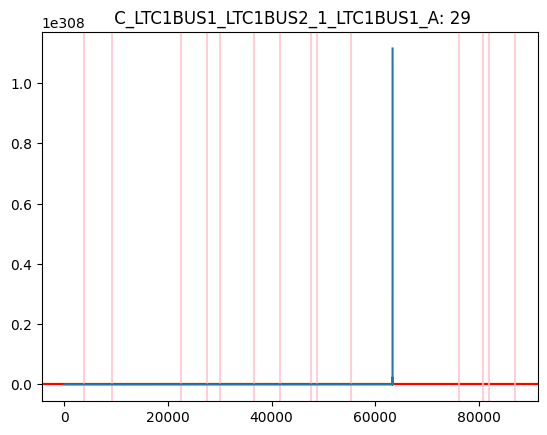

***********************************************************************************************
Sensor: 30  C_LTC1BUS1_LTC1BUS2_1_LTC1BUS1_B
30
DD = 0


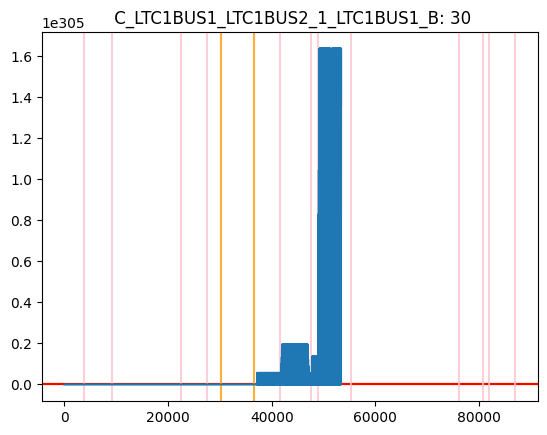

***********************************************************************************************
Sensor: 31  C_LTC1BUS1_LTC1BUS2_1_LTC1BUS1_C


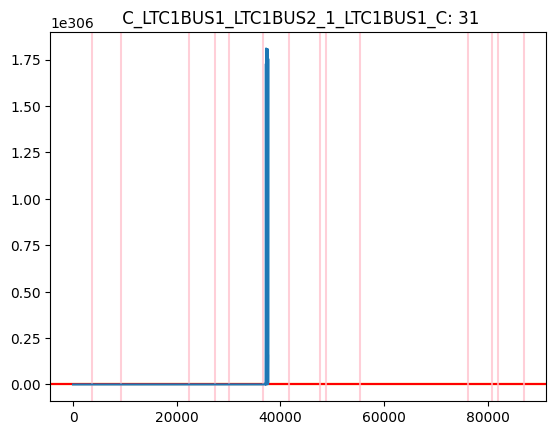

***********************************************************************************************
Sensor: 33  V_BUS20KV2_AN


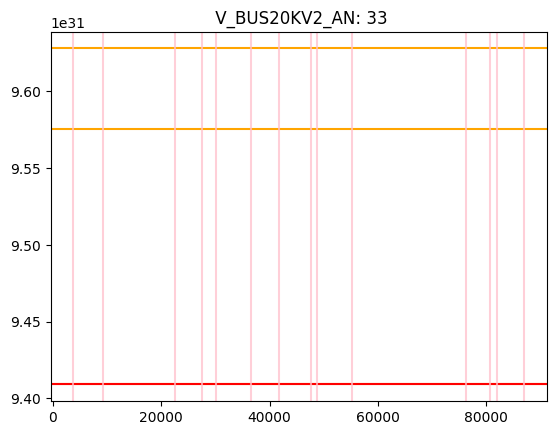

***********************************************************************************************
Sensor: 34  V_BUS20KV2_BN


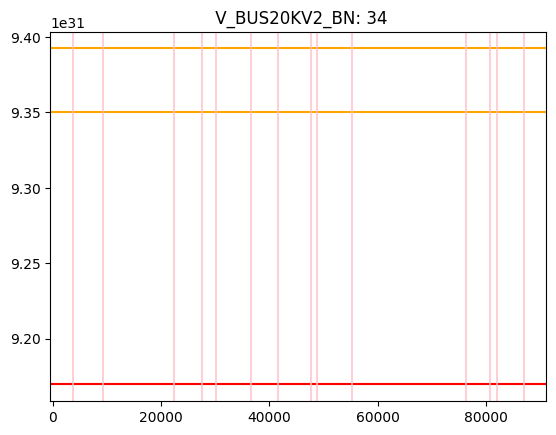

***********************************************************************************************
Sensor: 35  V_BUS20KV2_CN


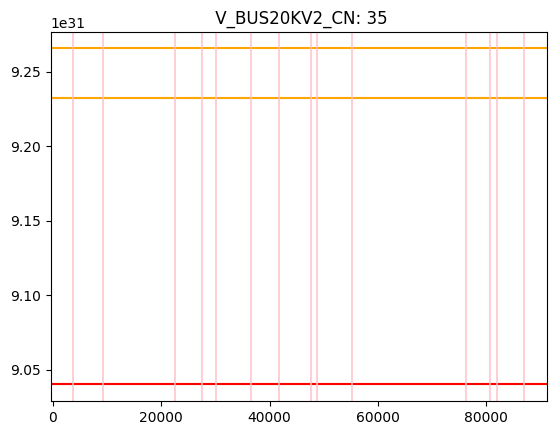

***********************************************************************************************
Sensor: 36  C_WE927_WE929_1_WE927_A
DD = 0
DD = 0


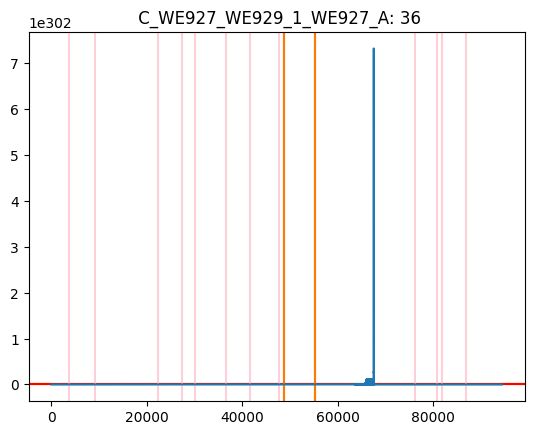

***********************************************************************************************
Sensor: 37  C_WE927_WE929_1_WE927_B
DD = 0
DD = 0


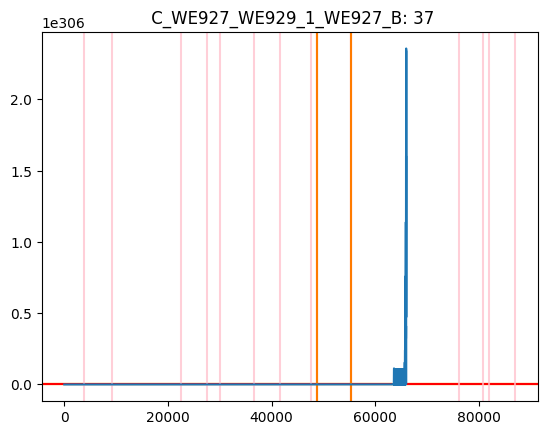

***********************************************************************************************
Sensor: 38  C_WE927_WE929_1_WE927_C
DD = 0
DD = 0


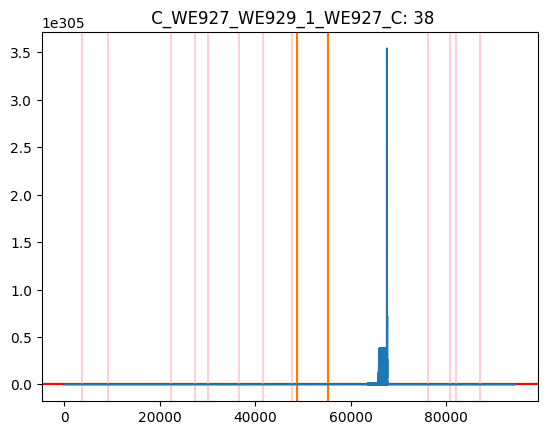

***********************************************************************************************
Sensor: 40  C_WE957_WE950_1_WE950_A


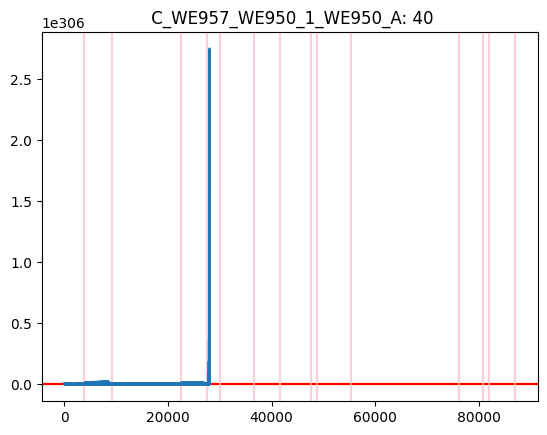

***********************************************************************************************
Sensor: 41  C_WE957_WE950_1_WE950_B


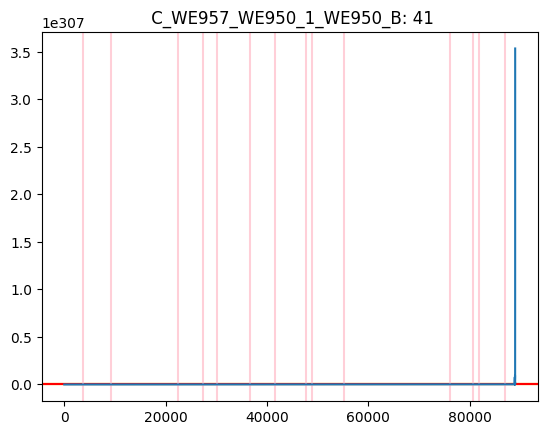

***********************************************************************************************
Sensor: 42  C_WE957_WE950_1_WE950_C


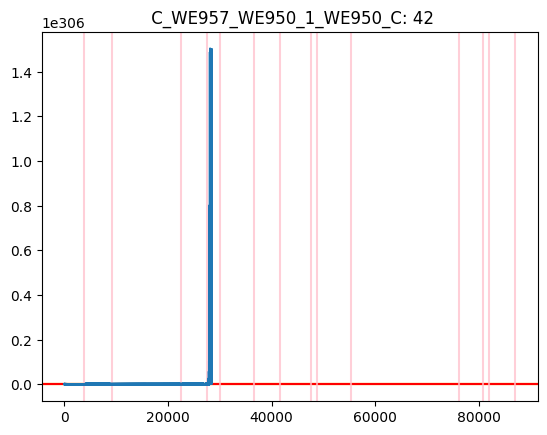

***********************************************************************************************
Sensor: 44  C_LTC2BUS1_LTC2BUS2_1_LTC2BUS2_A
44
DD = None


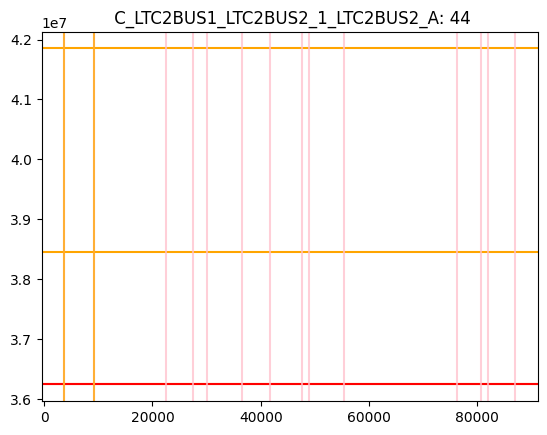

***********************************************************************************************
Sensor: 45  C_LTC2BUS1_LTC2BUS2_1_LTC2BUS2_B
45
DD = None


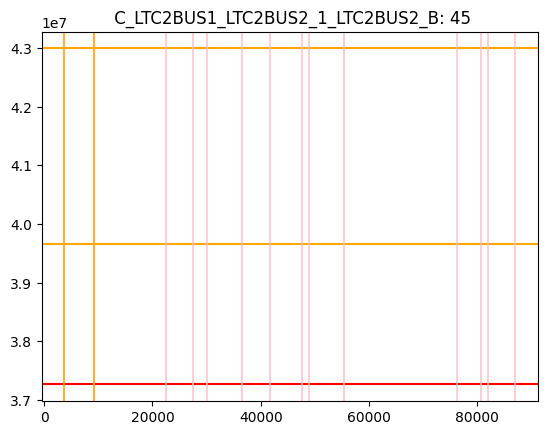

***********************************************************************************************
Sensor: 46  C_LTC2BUS1_LTC2BUS2_1_LTC2BUS2_C
46
DD = None


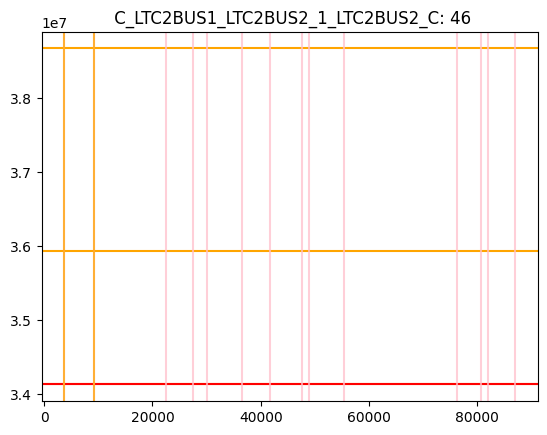

***********************************************************************************************
Sensor: 48  C_WE957_WE950_1_WE957_A
48
DD = 0


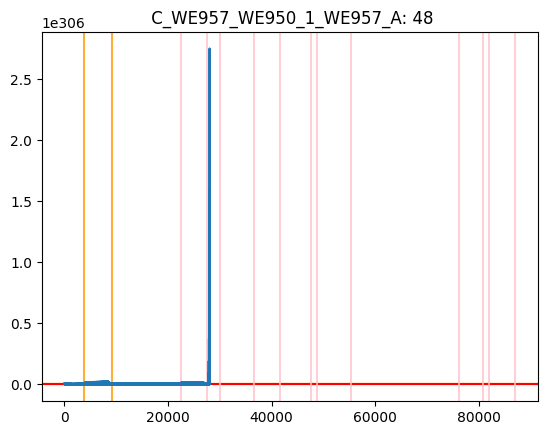

***********************************************************************************************
Sensor: 49  C_WE957_WE950_1_WE957_B
49
DD = 0


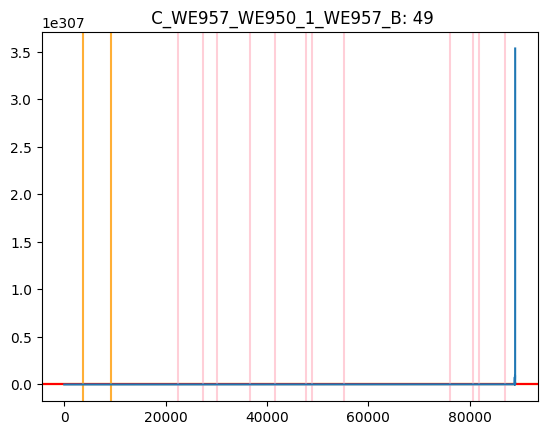

***********************************************************************************************
Sensor: 50  C_WE957_WE950_1_WE957_C
50
DD = 0


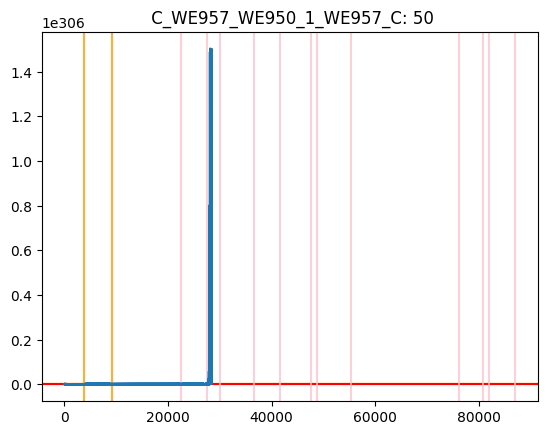

***********************************************************************************************
Sensor: 52  C_LTC2BUS1_LTC2BUS2_1_LTC2BUS1_A
DD = None
DD = None


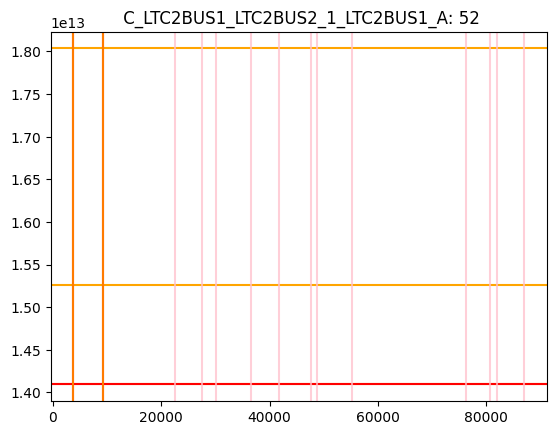

***********************************************************************************************
Sensor: 53  C_LTC2BUS1_LTC2BUS2_1_LTC2BUS1_B
DD = None
DD = None


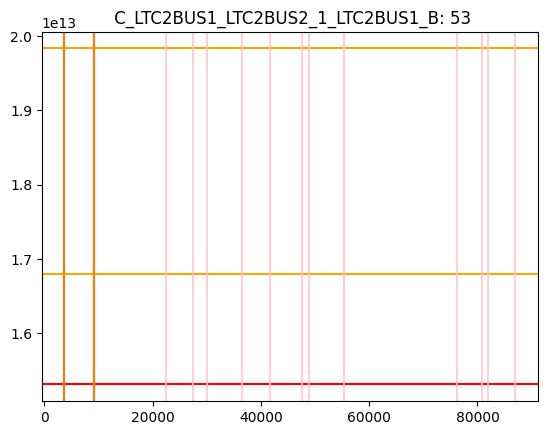

***********************************************************************************************
Sensor: 54  C_LTC2BUS1_LTC2BUS2_1_LTC2BUS1_C
DD = None
DD = None


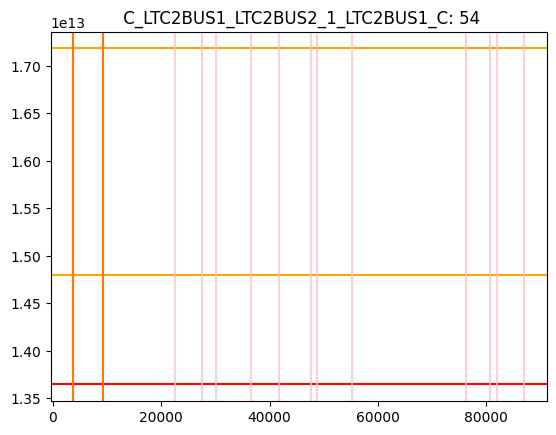

***********************************************************************************************
Sensor: 56  V_BUS13KV_AN
56
DD = None


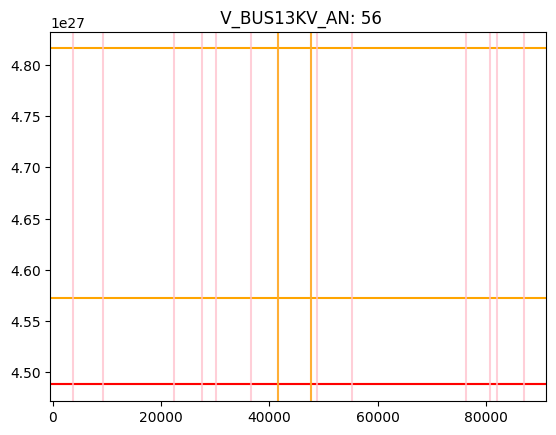

***********************************************************************************************
Sensor: 57  V_BUS13KV_BN
57
DD = None


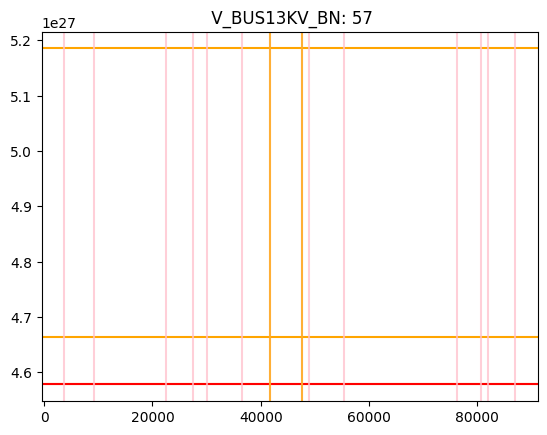

***********************************************************************************************
Sensor: 58  V_BUS13KV_CN
58
DD = None


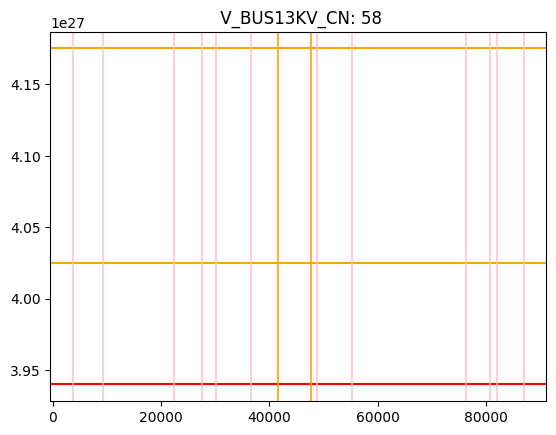

***********************************************************************************************
Sensor: 59  C_BUS13KV_DISTRIB1_1_BUS13KV_A
59
DD = None
59
DD = None
59
DD = None


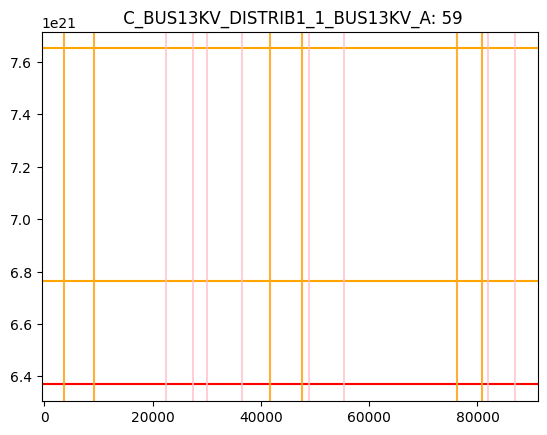

***********************************************************************************************
Sensor: 60  C_BUS13KV_DISTRIB1_1_BUS13KV_B
60
DD = None
60
DD = None
60
DD = None


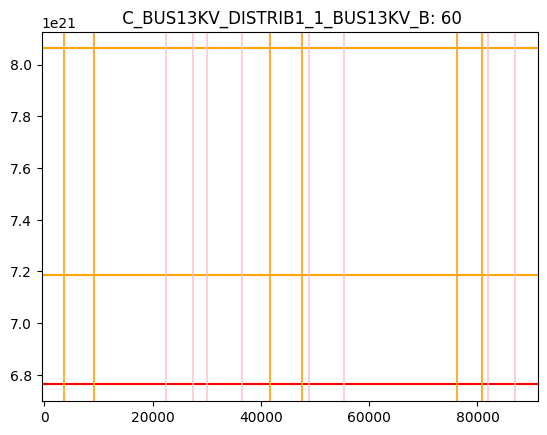

***********************************************************************************************
Sensor: 61  C_BUS13KV_DISTRIB1_1_BUS13KV_C
61
DD = None
61
DD = None
61
DD = None


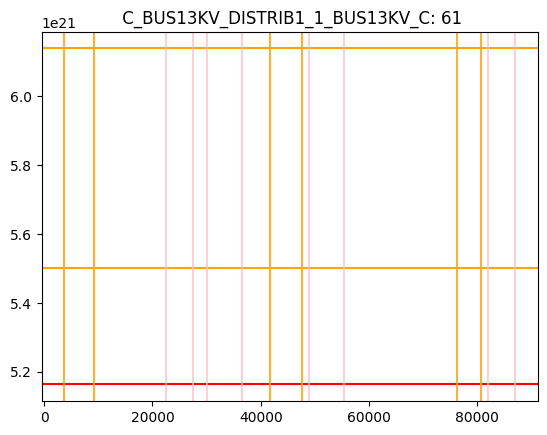

***********************************************************************************************
Sensor: 62  V_BUS13KV2_AN
62
DD = None
62
DD = None


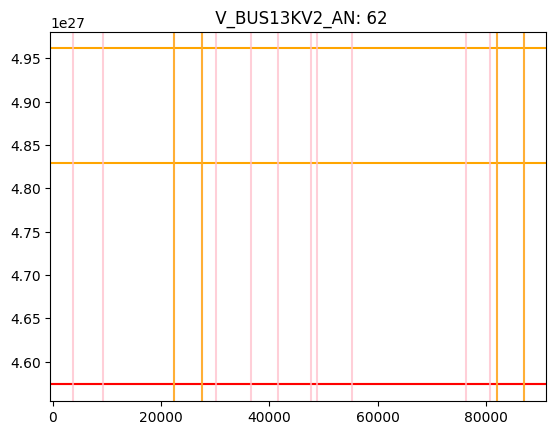

***********************************************************************************************
Sensor: 63  V_BUS13KV2_BN
63
DD = None


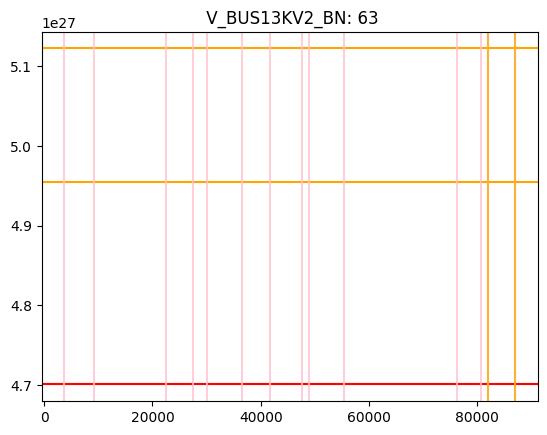

***********************************************************************************************
Sensor: 64  V_BUS13KV2_CN
64
DD = None


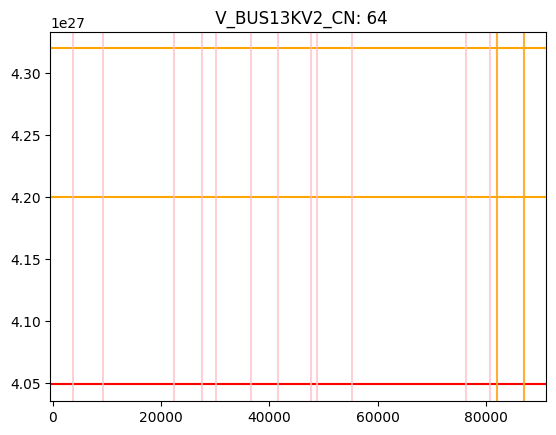

***********************************************************************************************
Sensor: 65  C_BUS13KV2_DB122_1_BUS13KV2_A


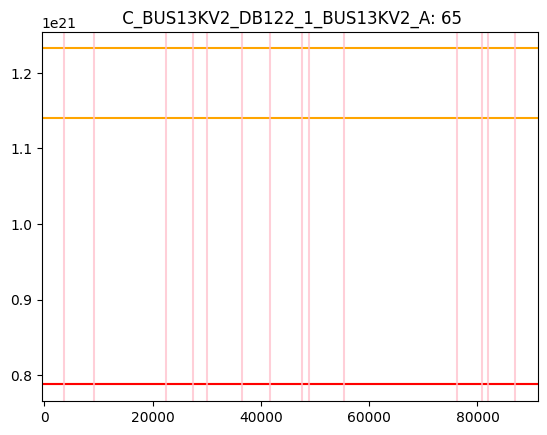

***********************************************************************************************
Sensor: 66  C_BUS13KV2_DB122_1_BUS13KV2_B
DD = None
DD = None


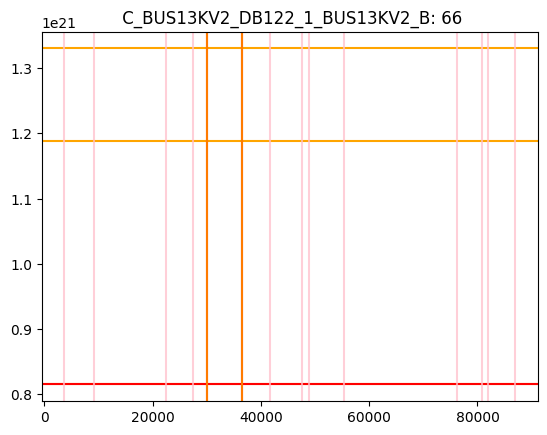

***********************************************************************************************
Sensor: 67  C_BUS13KV2_DB122_1_BUS13KV2_C


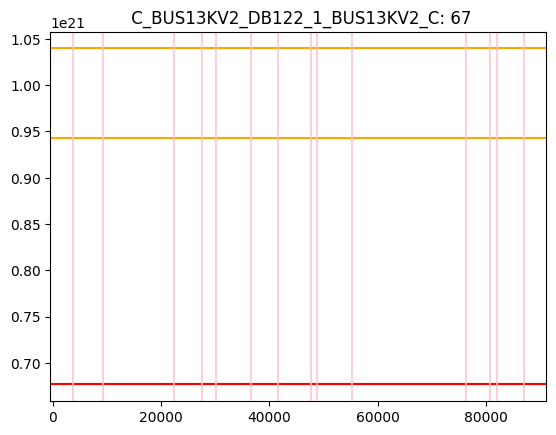

***********************************************************************************************
Sensor: 68  V_2DBU7_AN
DD = None
DD = None


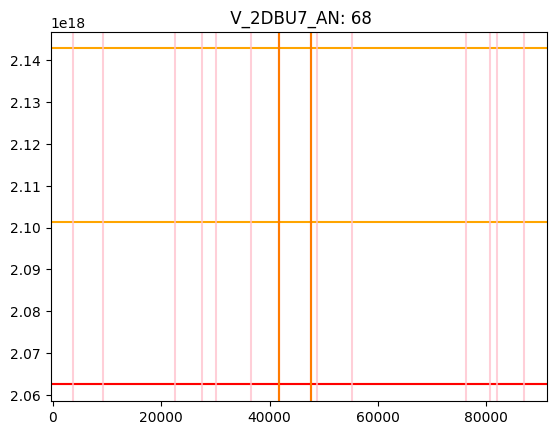

***********************************************************************************************
Sensor: 69  V_2DBU7_BN
DD = None
DD = None


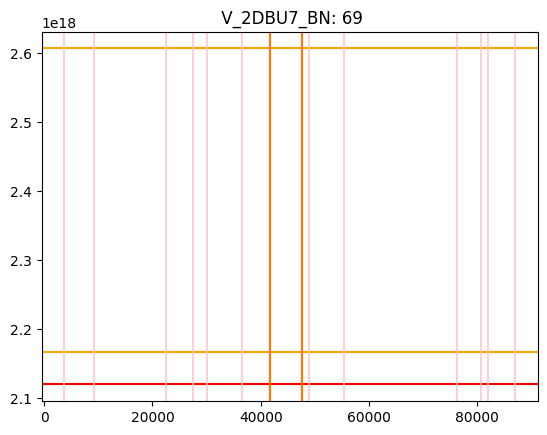

***********************************************************************************************
Sensor: 70  V_2DBU7_CN
DD = None
DD = None


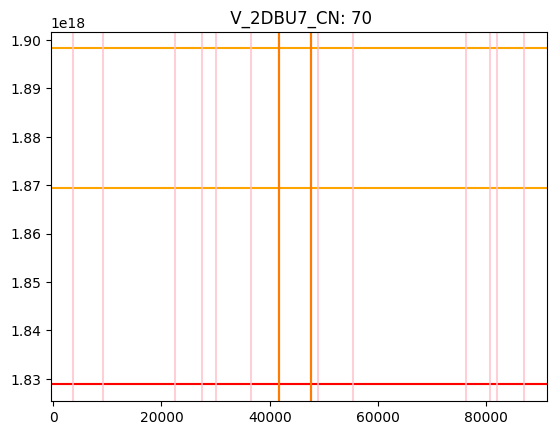

***********************************************************************************************
Sensor: 71  C_2DBX3_2DBU7_1_2DBU7_A
DD = 0
DD = 0
DD = 0


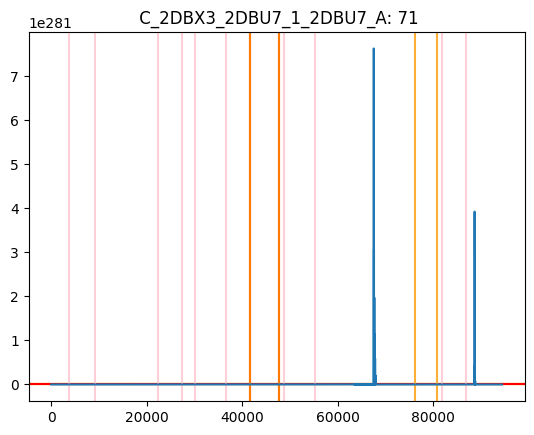

***********************************************************************************************
Sensor: 72  C_2DBX3_2DBU7_1_2DBU7_B
DD = 0
DD = 0
DD = 0


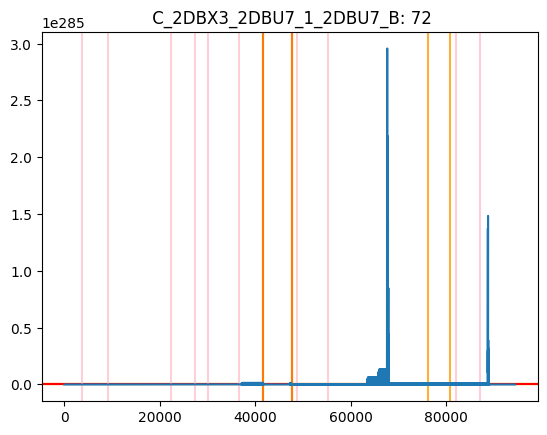

***********************************************************************************************
Sensor: 73  C_2DBX3_2DBU7_1_2DBU7_C
DD = 0
DD = 0
DD = 0


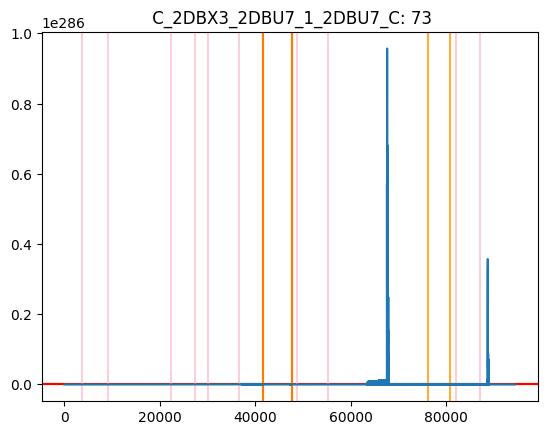

***********************************************************************************************
Sensor: 74  V_DBU6_AN
74
DD = None


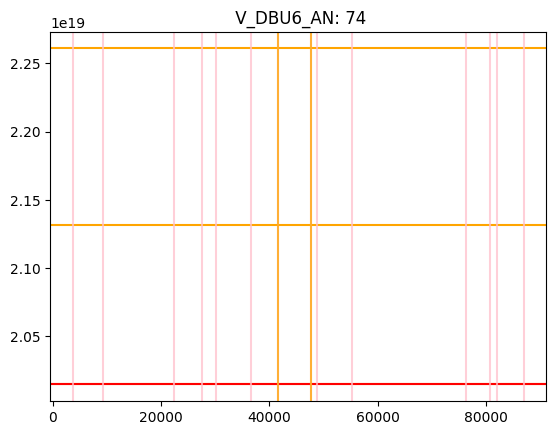

***********************************************************************************************
Sensor: 75  V_DBU6_BN
75
DD = None


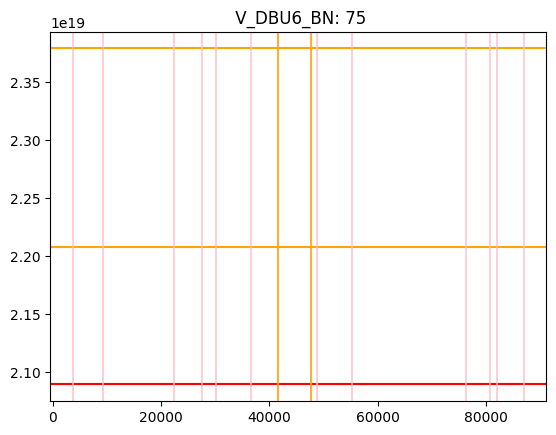

***********************************************************************************************
Sensor: 76  V_DBU6_CN
76
DD = None


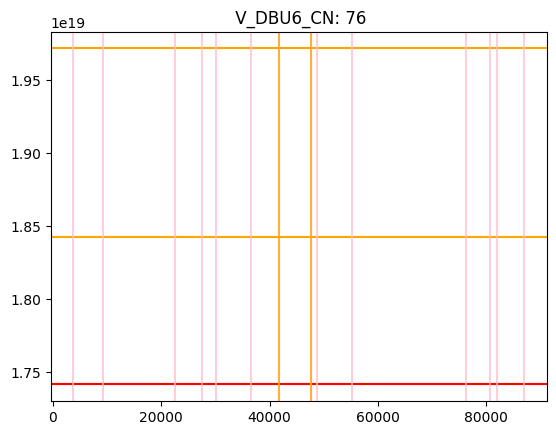

***********************************************************************************************
Sensor: 77  C_DBU5_DBU6_1_DBU6_A
DD = None
DD = None
DD = None


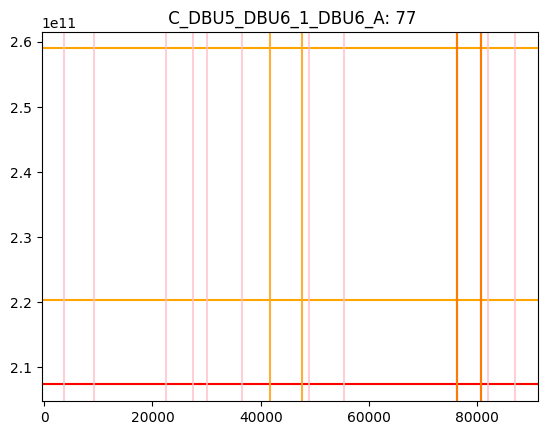

***********************************************************************************************
Sensor: 78  C_DBU5_DBU6_1_DBU6_B
DD = None
DD = None
DD = None


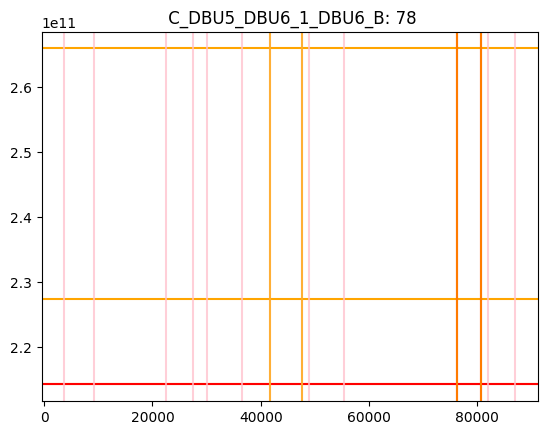

***********************************************************************************************
Sensor: 79  C_DBU5_DBU6_1_DBU6_C
DD = None
DD = None
DD = None


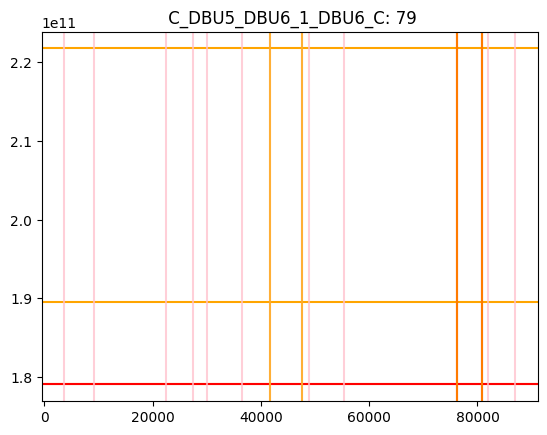

***********************************************************************************************
Sensor: 80  V_2DBU17_AN
80
DD = None


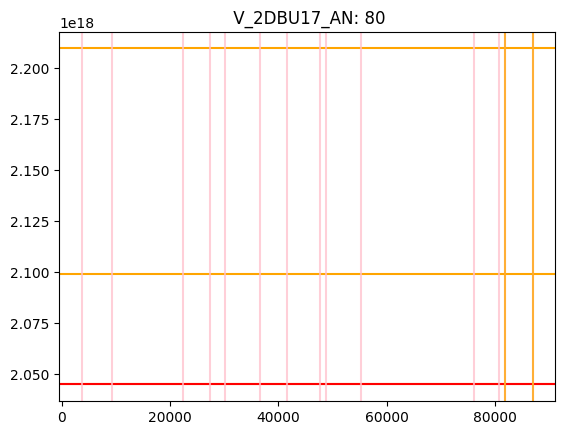

***********************************************************************************************
Sensor: 81  V_2DBU17_BN
81
DD = None


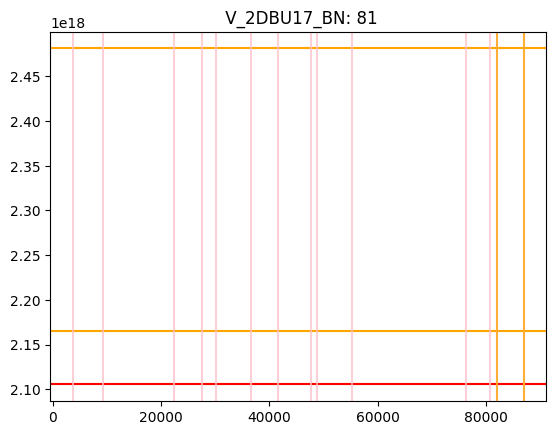

***********************************************************************************************
Sensor: 82  V_2DBU17_CN
82
DD = None


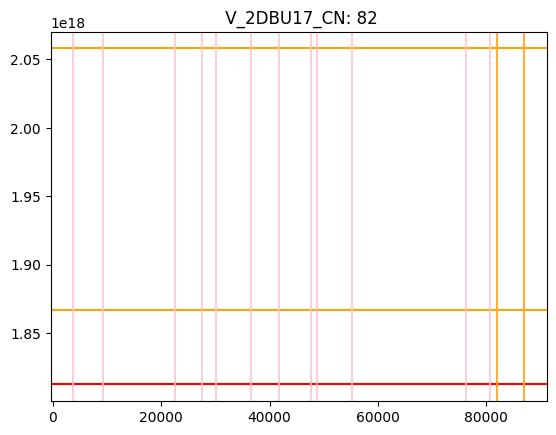

***********************************************************************************************
Sensor: 83  C_3DBX3_2DBU17_1_2DBU17_A


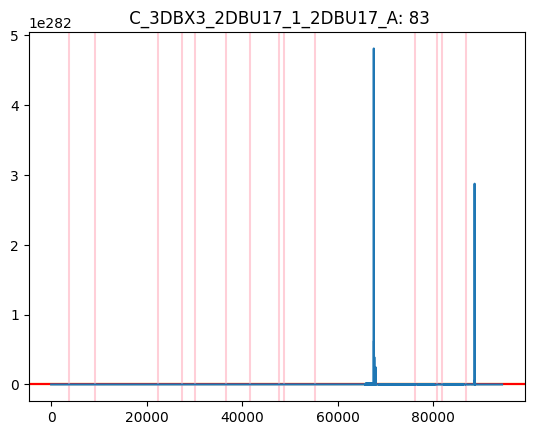

***********************************************************************************************
Sensor: 84  C_3DBX3_2DBU17_1_2DBU17_B
84
DD = 0


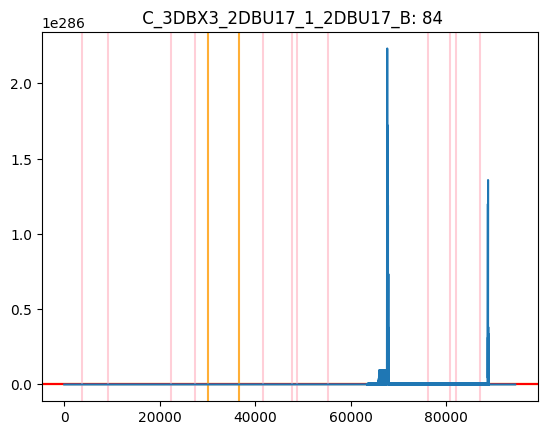

***********************************************************************************************
Sensor: 85  C_3DBX3_2DBU17_1_2DBU17_C


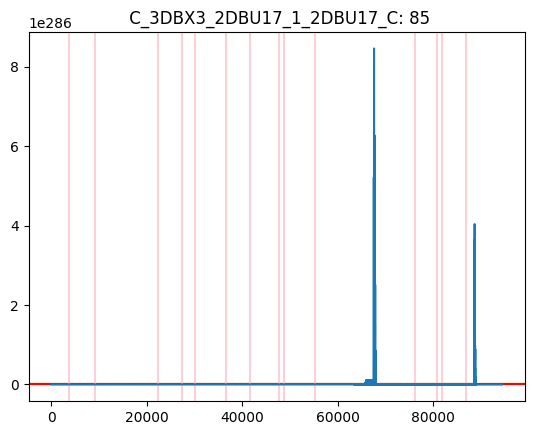

***********************************************************************************************
Sensor: 86  V_DBU16_AN
DD = None
DD = None


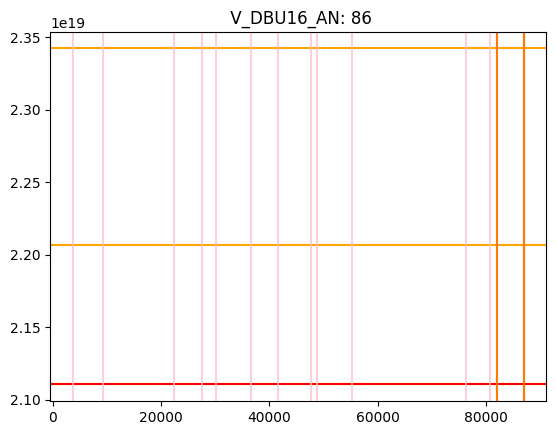

***********************************************************************************************
Sensor: 87  V_DBU16_BN
DD = None
DD = None


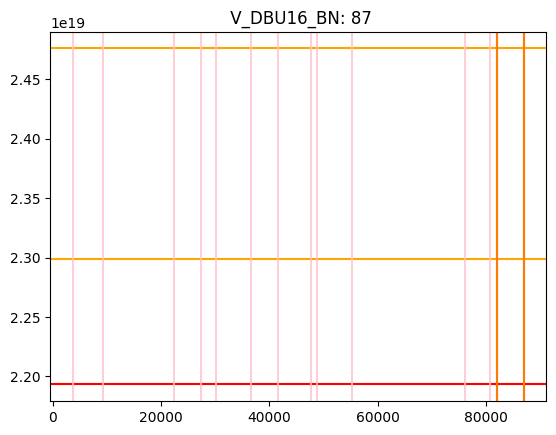

***********************************************************************************************
Sensor: 88  V_DBU16_CN
DD = None
DD = None


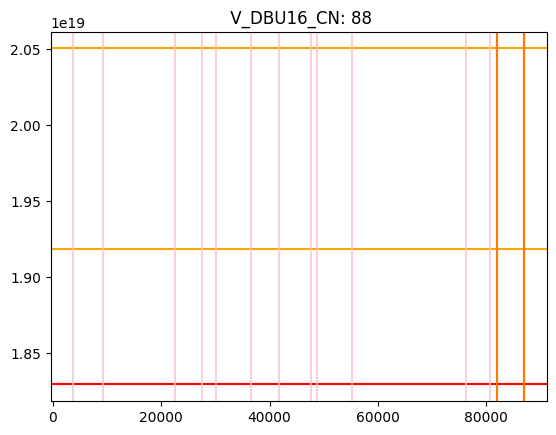

***********************************************************************************************
Sensor: 89  C_DBU15_DBU16_1_DBU16_A


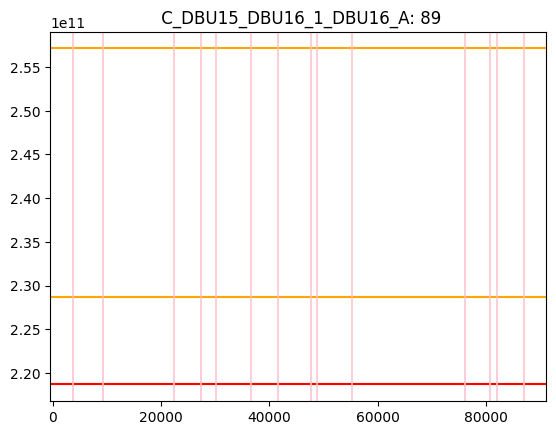

***********************************************************************************************
Sensor: 90  C_DBU15_DBU16_1_DBU16_B
90
DD = None


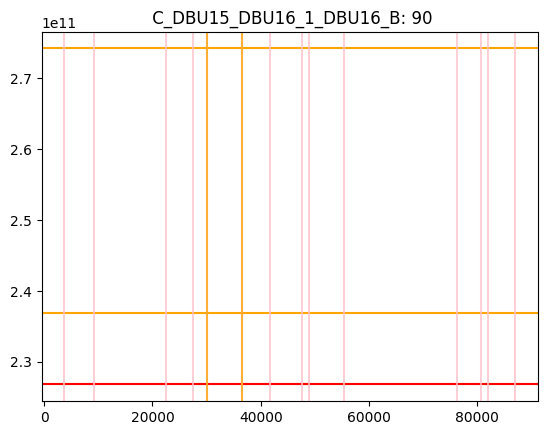

***********************************************************************************************
Sensor: 91  C_DBU15_DBU16_1_DBU16_C


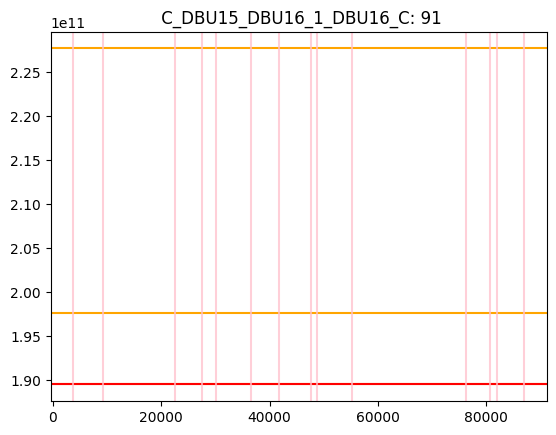

[None, None, None, None, 0, 0, None, None, 0, 0, 0, None, 0, 0, 0, 0, 0, 0, 0, None, None, None, 0, 0, 0, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 0, 0, 0, 0, 0, 0, 0, 0, 0, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 0, None, None, None, None, None, None, None]


In [326]:
LD_cov = []
at_neighbor = {}

rsum_list = rsum_list_cov
threshold = thresholds_cov_95
t_list = t_cov
persistency = 1

for index, i in enumerate(rsum_list):
    print("***********************************************************************************************")
    attack_in = (i > threshold[index]).nonzero()

    violations = (rsum_list > threshold.reshape(-1, 1))

    print(f"Sensor: {things[index]} {cols[things[index]-1]}")
    at_neighbor[things[index]] = attack_in
    plt.title(f"{cols[things[index]-1]}: {things[index]}")

    for t in t_list:
        plt.axhline(t[index], color='orange')

    plt.axhline(threshold[index], color='red')

    if things[index] in attack_dict:
        #if sensor is being attacked

        # ground truth
        attack_indices = df_test.index[
            (df_test['Time'] >= attack_dict[things[index]][0] * 1e6) &
            (df_test['Time'] <= attack_dict[things[index]][1] * 1e6)] - 1201

        for start, end in all_attack_indices:

            # if this is the attack time of the sensor, plot solid red lines
            if attack_indices[0] == start:
                DD = detection_delay(violations[index], [(start, end)], window, w, persistency)[0]
                LD_cov.append(DD)
                print(f"DD = {DD}")
                start_w = start-window-w
                end_w = end+window+w-1
                plt.axvline(start_w, color='red')
                plt.axvline(end_w, color='red')

            # otherwise, plot pink lines
            else:
                start_w = start-window-w
                end_w = end+window+w-1
                plt.axvline(start_w, color='pink', alpha=0.75)
                plt.axvline(end_w, color='pink', alpha=0.75)

            start_w = start-window-w
            end_w = end+window+w-1
            for starts, ate in attack_i.items():
              if starts == start and things[index] in ate:
                DD = detection_delay(violations[index], [(start, end)], window, w, persistency)[0]
                LD_cov.append(DD)
                print(f"DD = {DD}")
                plt.axvline(start_w, color='orange', alpha=0.75)
                plt.axvline(end_w, color='orange', alpha=0.75)

    else:
         for start, end in all_attack_indices:
            start_w = start-window-w
            end_w = end+window+w-1
            plt.axvline(start_w, color='pink', alpha=0.75)
            plt.axvline(end_w, color='pink', alpha=0.75)
            for starts, ate in attack_i.items():
              if starts == start:
                if things[index] in ate:
                  print(things[index])
                  DD = detection_delay(violations[index], [(start, end)], window, w, persistency)[0]
                  LD_cov.append(DD)
                  print(f"DD = {DD}")
                  plt.axvline(start_w, color='orange', alpha=0.75)
                  plt.axvline(end_w, color='orange', alpha=0.75)

    plt.plot(i)
    plt.show()

print(LD_cov)

***********************************************************************************************
Sensor: 1  C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_A


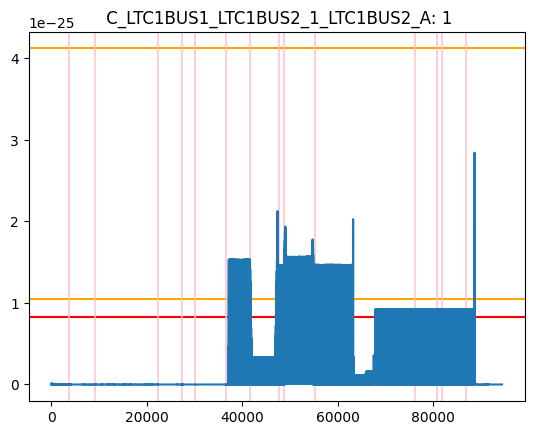

***********************************************************************************************
Sensor: 2  C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_B
2
DD = None


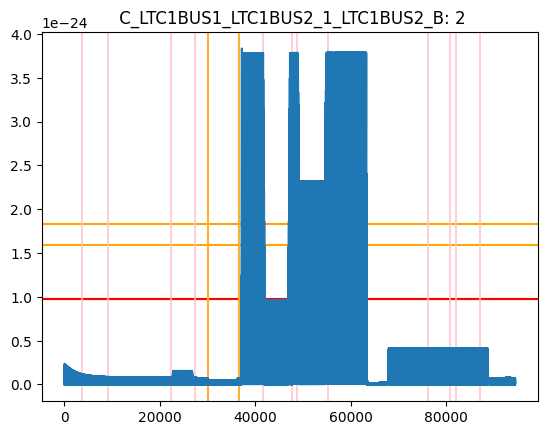

***********************************************************************************************
Sensor: 3  C_LTC1BUS1_LTC1BUS2_1_LTC1BUS2_C


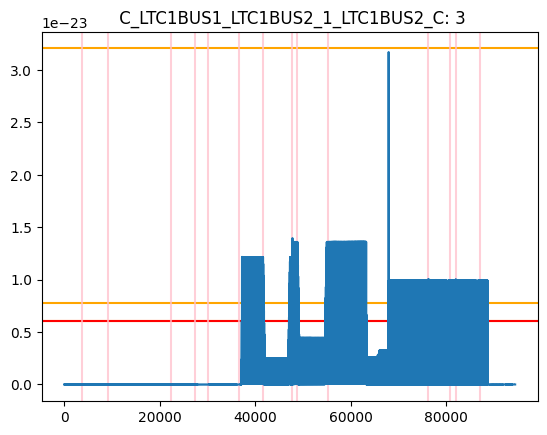

***********************************************************************************************
Sensor: 5  V_BUS20KV1_AN
DD = 339
DD = 339


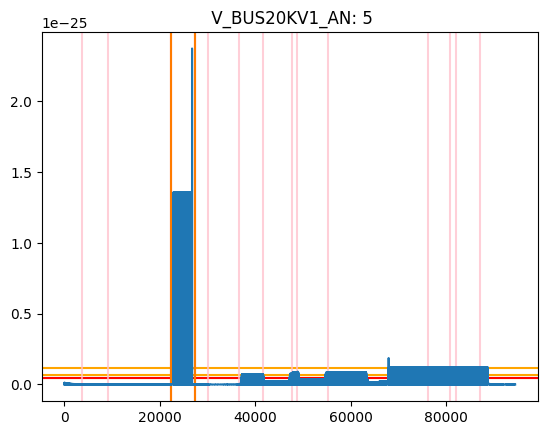

***********************************************************************************************
Sensor: 6  V_BUS20KV1_BN


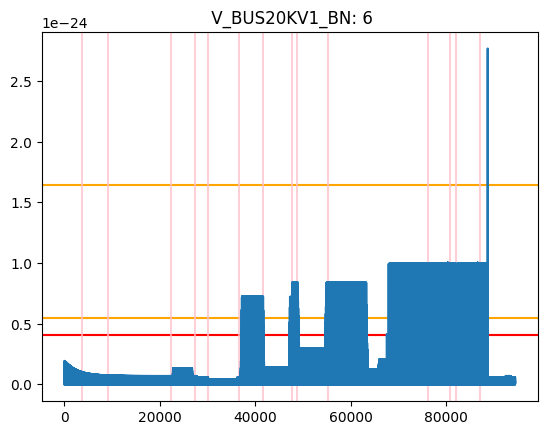

***********************************************************************************************
Sensor: 7  V_BUS20KV1_CN


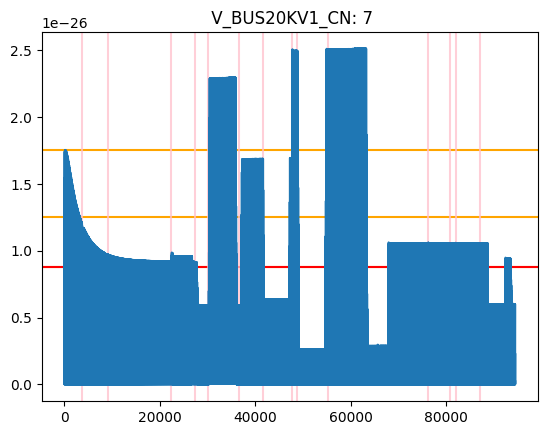

***********************************************************************************************
Sensor: 8  C_WE919_WE910_1_WE910_A


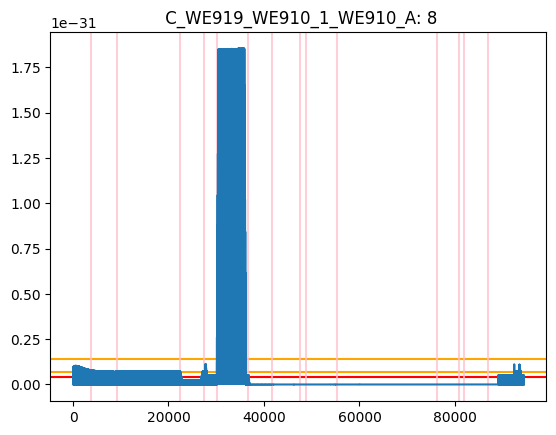

***********************************************************************************************
Sensor: 9  C_WE919_WE910_1_WE910_B


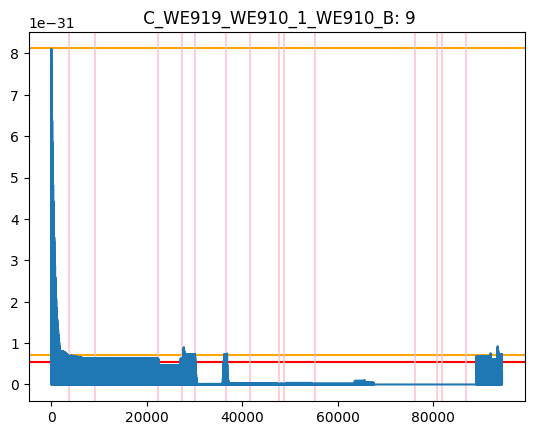

***********************************************************************************************
Sensor: 10  C_WE919_WE910_1_WE910_C


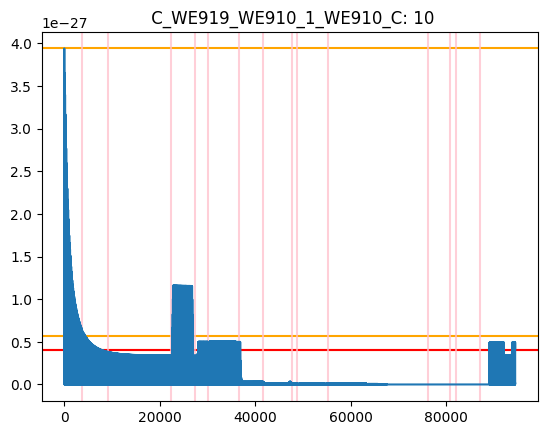

***********************************************************************************************
Sensor: 12  V_BLD911_AN
12
DD = None


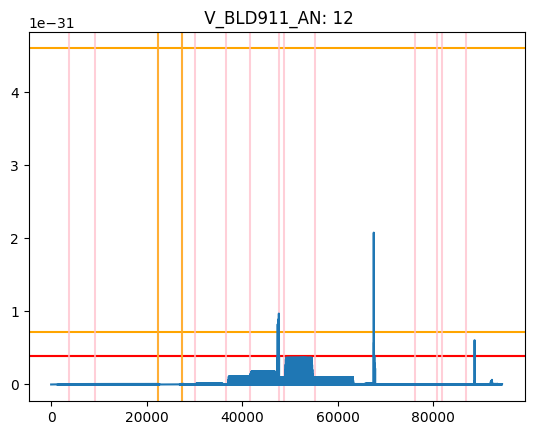

***********************************************************************************************
Sensor: 13  V_BLD911_BN


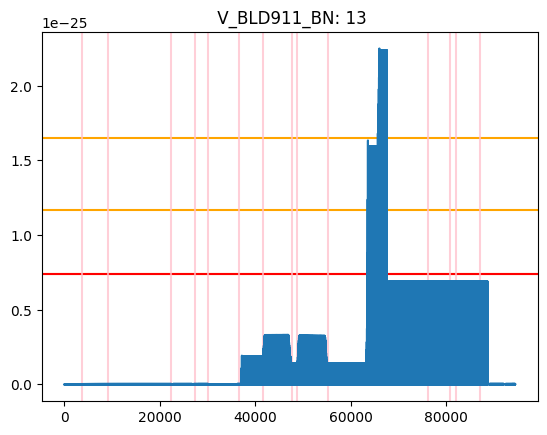

***********************************************************************************************
Sensor: 14  V_BLD911_CN


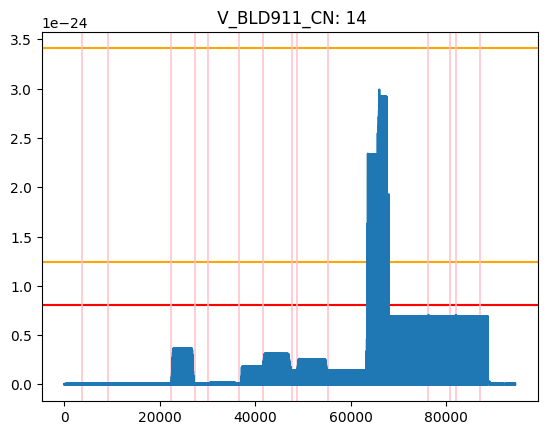

***********************************************************************************************
Sensor: 15  C_WE919_WE910_1_WE919_A
15
DD = 13


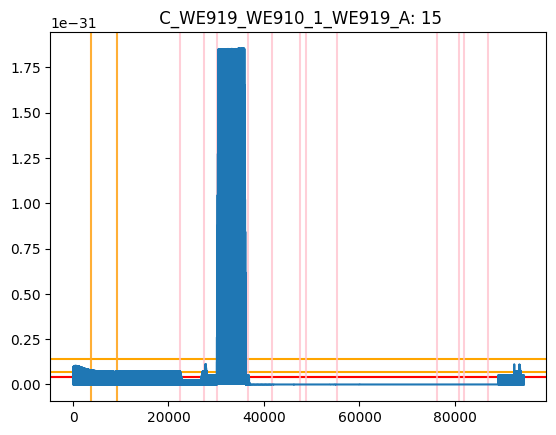

***********************************************************************************************
Sensor: 16  C_WE919_WE910_1_WE919_B
16
DD = 4


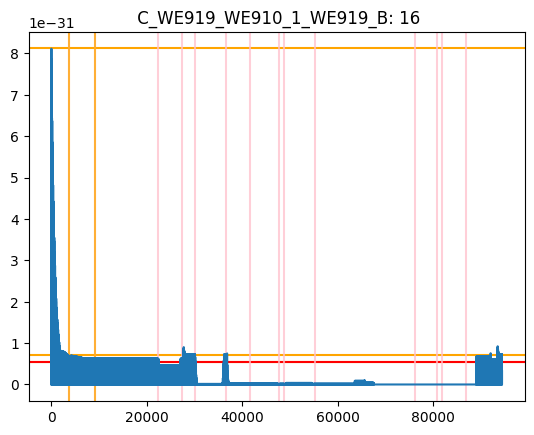

***********************************************************************************************
Sensor: 17  C_WE919_WE910_1_WE919_C
17
DD = 1


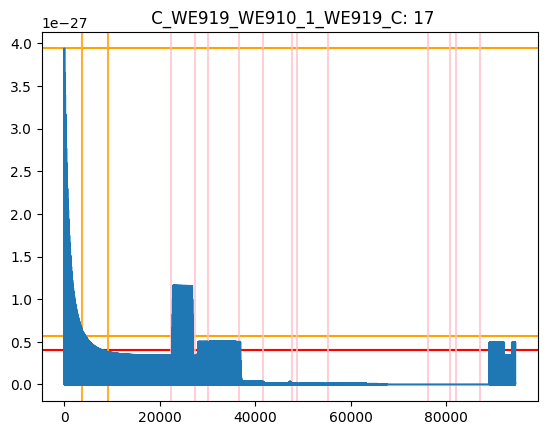

***********************************************************************************************
Sensor: 19  V_WE-115KV2_AN
19
DD = None


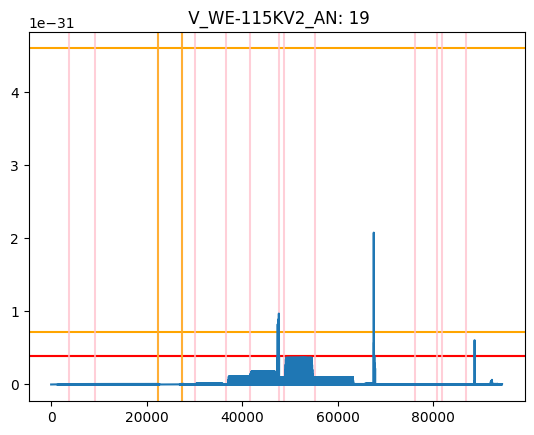

***********************************************************************************************
Sensor: 20  V_WE-115KV2_BN


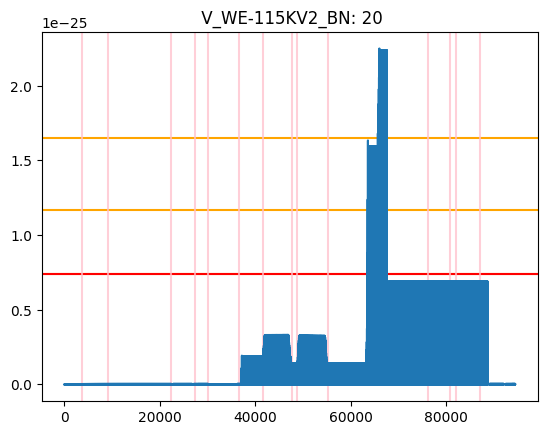

***********************************************************************************************
Sensor: 21  V_WE-115KV2_CN


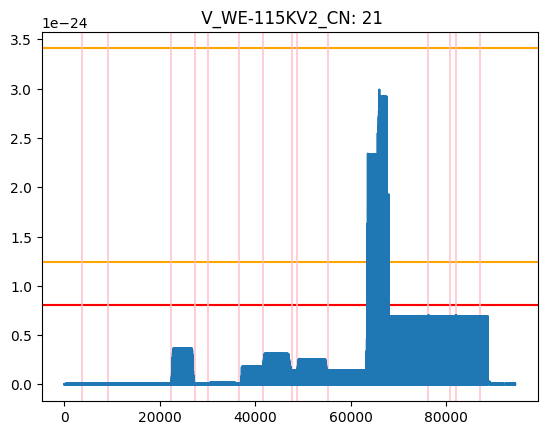

***********************************************************************************************
Sensor: 22  C_WE927_WE929_1_WE929_A
22
DD = 0


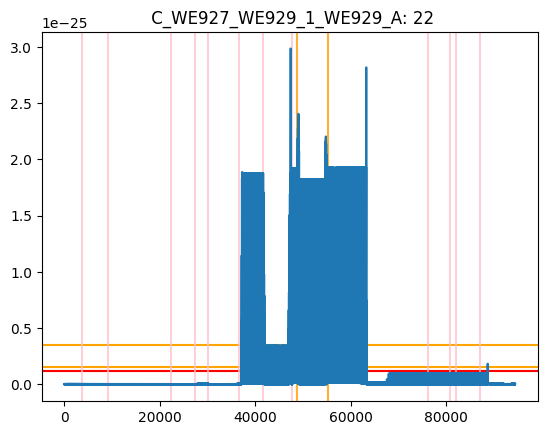

***********************************************************************************************
Sensor: 23  C_WE927_WE929_1_WE929_B
23
DD = None


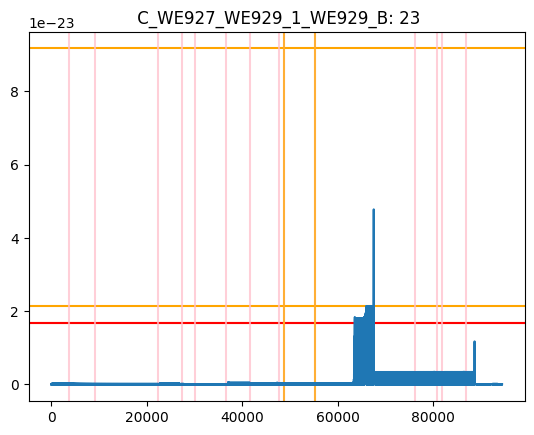

***********************************************************************************************
Sensor: 24  C_WE927_WE929_1_WE929_C
24
DD = None


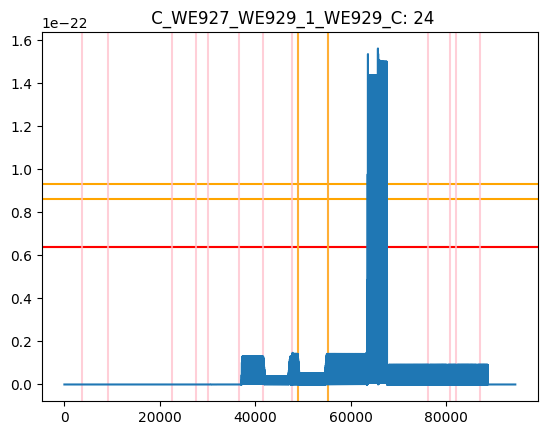

***********************************************************************************************
Sensor: 26  V_WE-115KV1_AN
26
DD = None


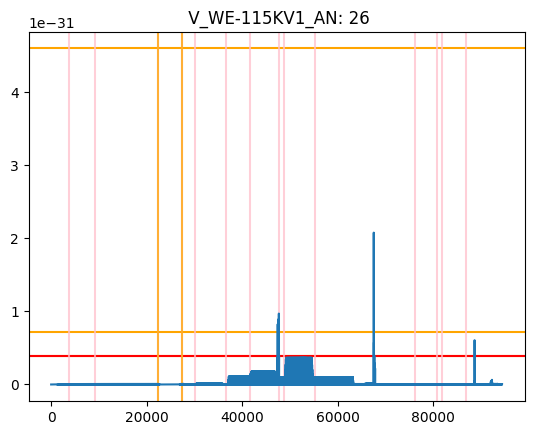

***********************************************************************************************
Sensor: 27  V_WE-115KV1_BN


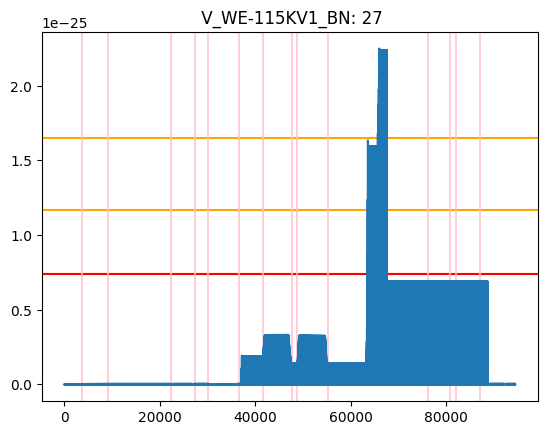

***********************************************************************************************
Sensor: 28  V_WE-115KV1_CN


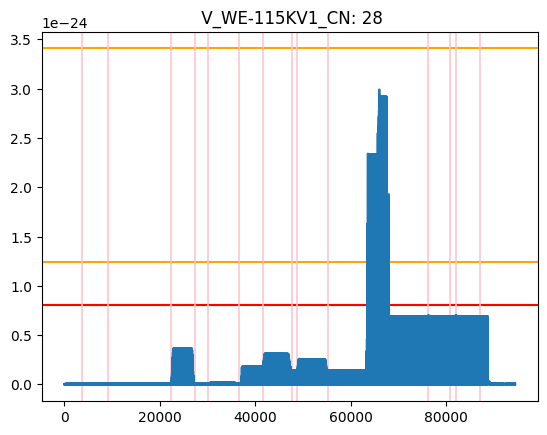

***********************************************************************************************
Sensor: 29  C_LTC1BUS1_LTC1BUS2_1_LTC1BUS1_A


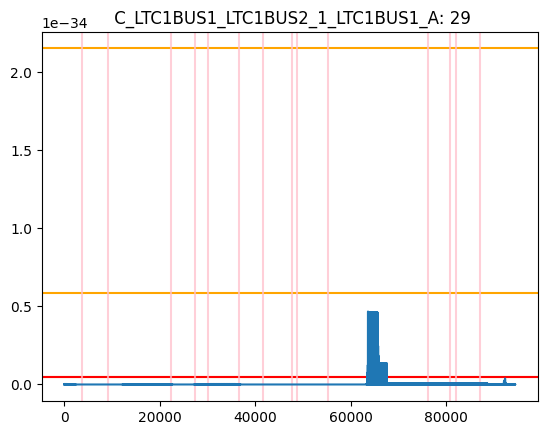

***********************************************************************************************
Sensor: 30  C_LTC1BUS1_LTC1BUS2_1_LTC1BUS1_B
30
DD = 37


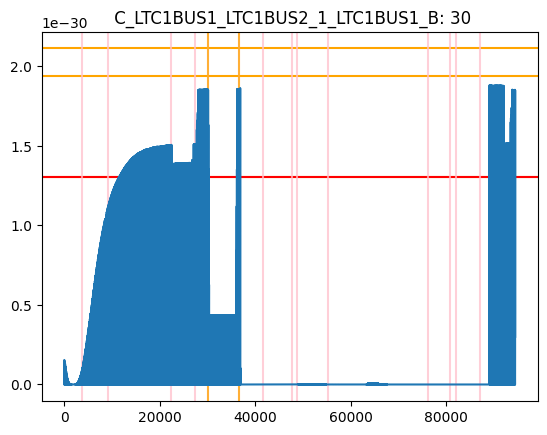

***********************************************************************************************
Sensor: 31  C_LTC1BUS1_LTC1BUS2_1_LTC1BUS1_C


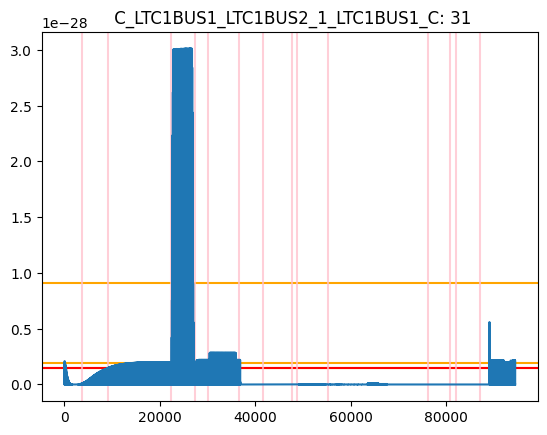

***********************************************************************************************
Sensor: 33  V_BUS20KV2_AN


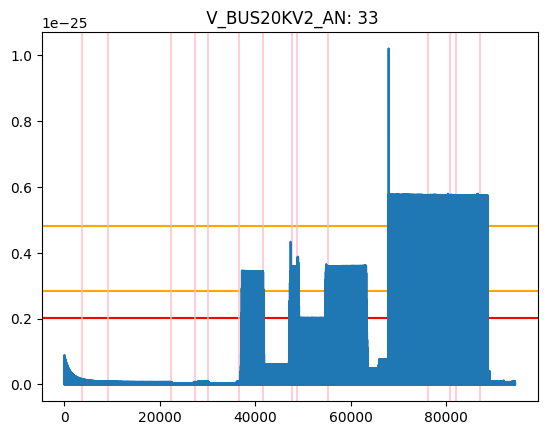

***********************************************************************************************
Sensor: 34  V_BUS20KV2_BN


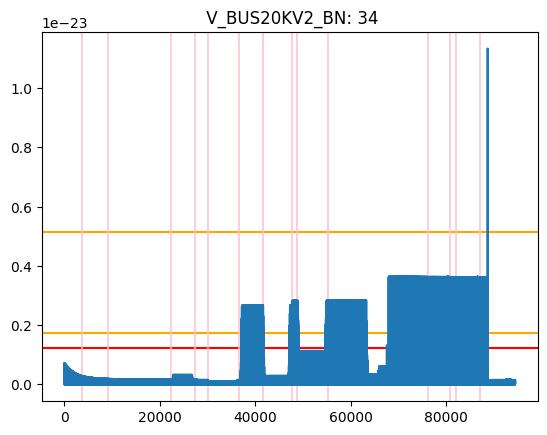

***********************************************************************************************
Sensor: 35  V_BUS20KV2_CN


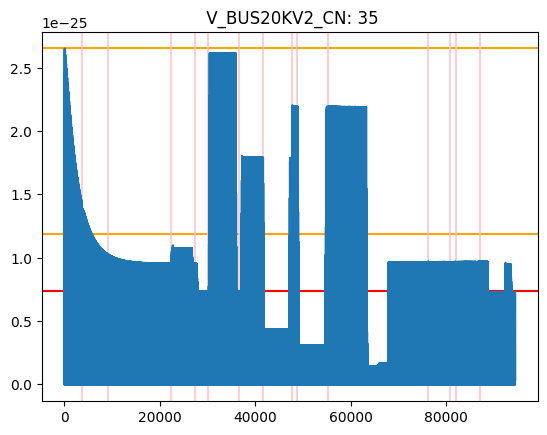

***********************************************************************************************
Sensor: 36  C_WE927_WE929_1_WE927_A
DD = 0
DD = 0


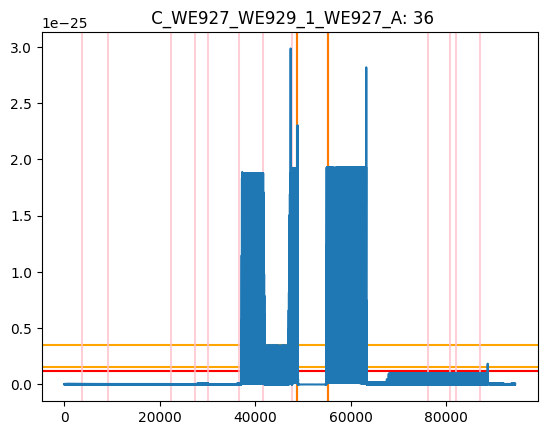

***********************************************************************************************
Sensor: 37  C_WE927_WE929_1_WE927_B
DD = None
DD = None


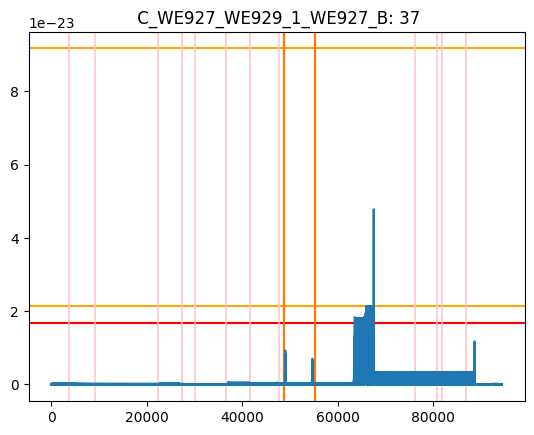

***********************************************************************************************
Sensor: 38  C_WE927_WE929_1_WE927_C
DD = None
DD = None


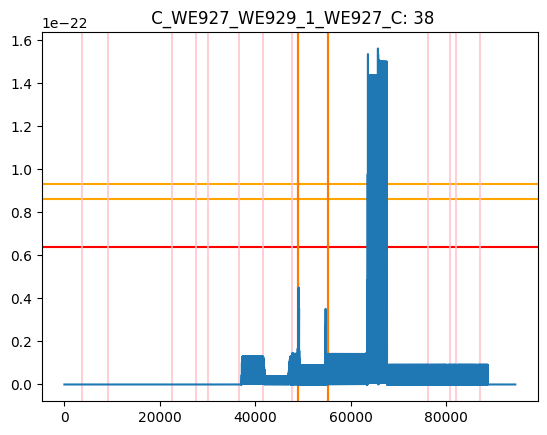

***********************************************************************************************
Sensor: 40  C_WE957_WE950_1_WE950_A


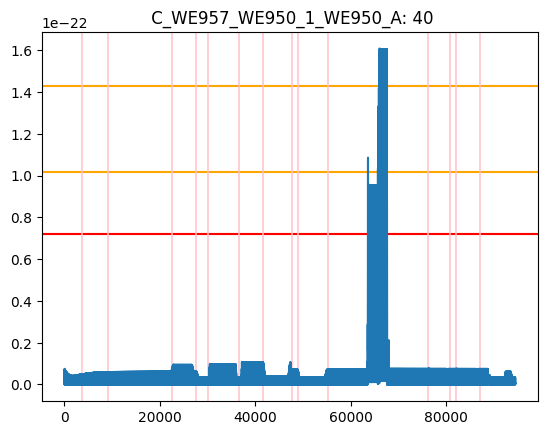

***********************************************************************************************
Sensor: 41  C_WE957_WE950_1_WE950_B


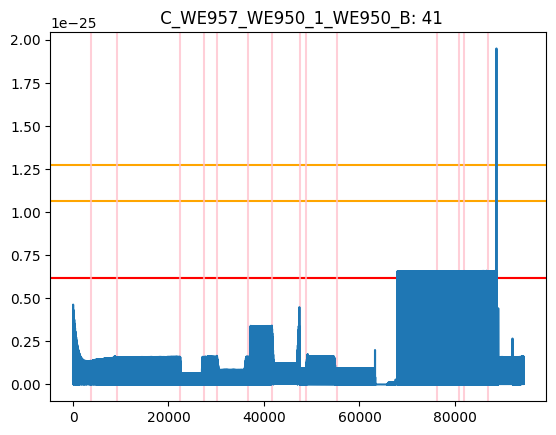

***********************************************************************************************
Sensor: 42  C_WE957_WE950_1_WE950_C


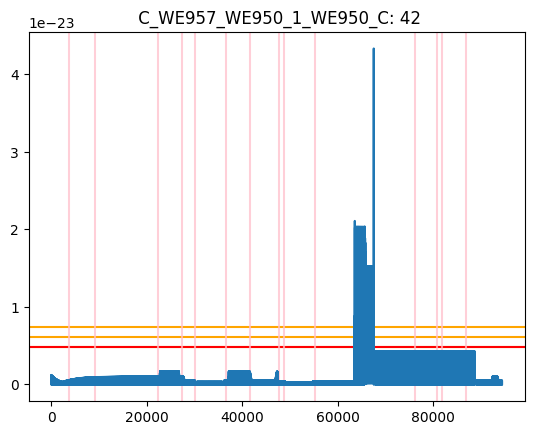

***********************************************************************************************
Sensor: 44  C_LTC2BUS1_LTC2BUS2_1_LTC2BUS2_A
44
DD = None


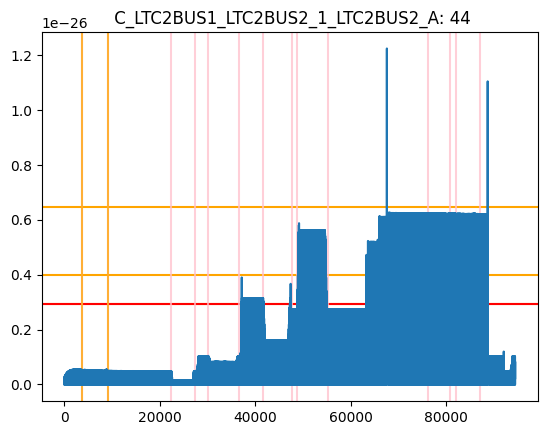

***********************************************************************************************
Sensor: 45  C_LTC2BUS1_LTC2BUS2_1_LTC2BUS2_B
45
DD = None


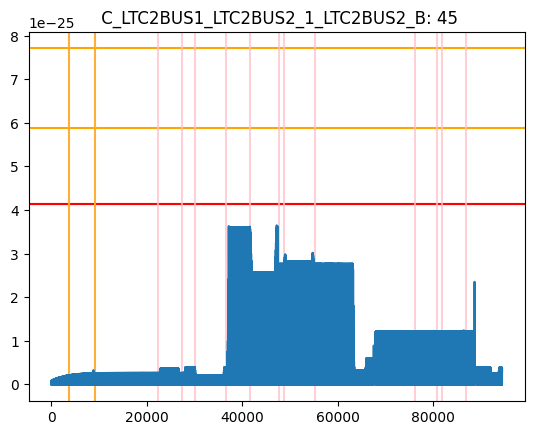

***********************************************************************************************
Sensor: 46  C_LTC2BUS1_LTC2BUS2_1_LTC2BUS2_C
46
DD = None


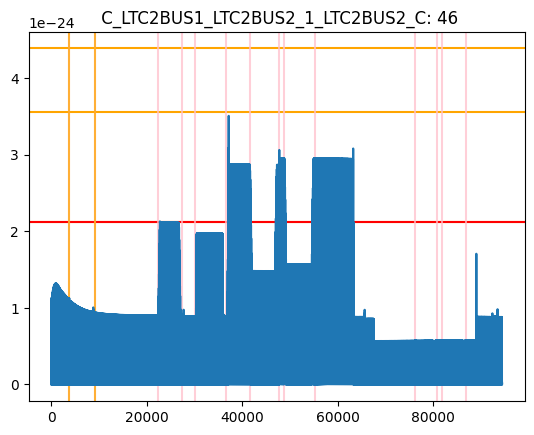

***********************************************************************************************
Sensor: 48  C_WE957_WE950_1_WE957_A
48
DD = None


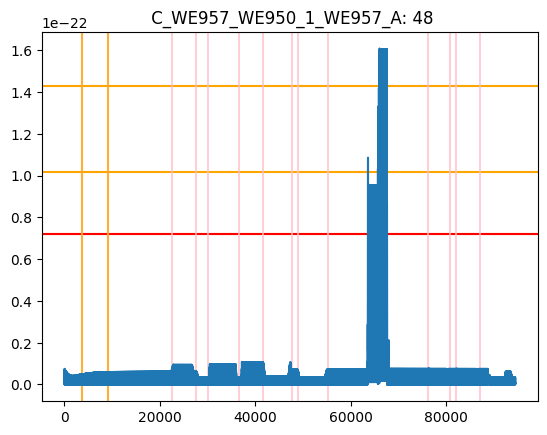

***********************************************************************************************
Sensor: 49  C_WE957_WE950_1_WE957_B
49
DD = None


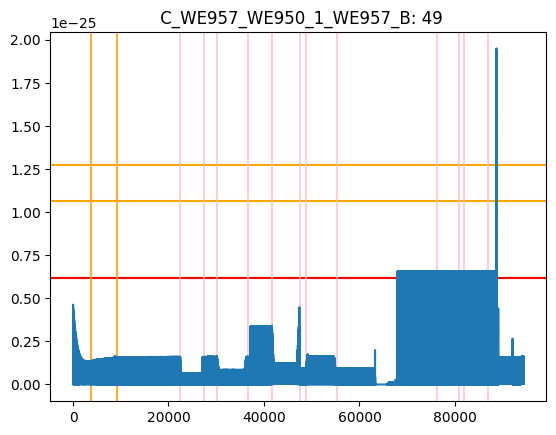

***********************************************************************************************
Sensor: 50  C_WE957_WE950_1_WE957_C
50
DD = None


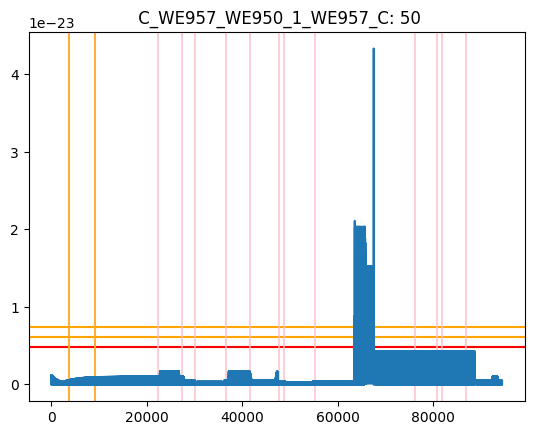

***********************************************************************************************
Sensor: 52  C_LTC2BUS1_LTC2BUS2_1_LTC2BUS1_A
DD = 12
DD = 12


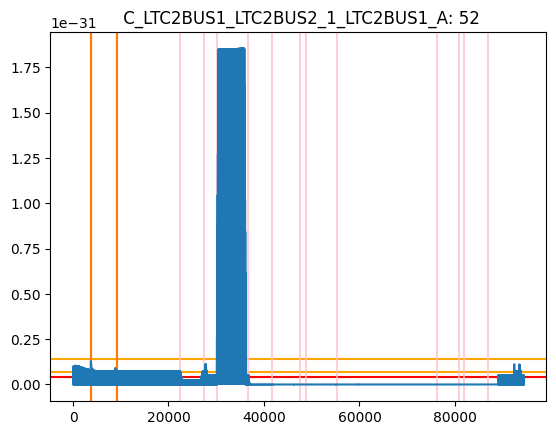

***********************************************************************************************
Sensor: 53  C_LTC2BUS1_LTC2BUS2_1_LTC2BUS1_B
DD = 3
DD = 3


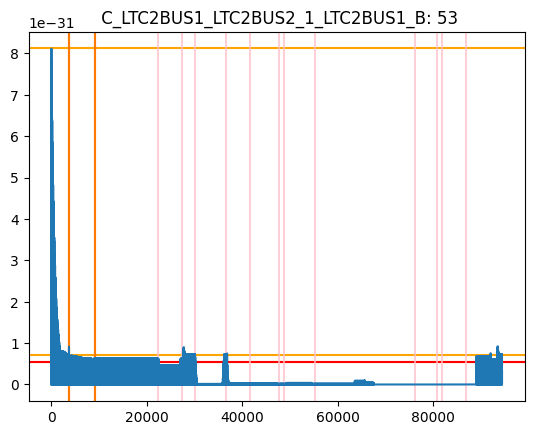

***********************************************************************************************
Sensor: 54  C_LTC2BUS1_LTC2BUS2_1_LTC2BUS1_C
DD = 1
DD = 1


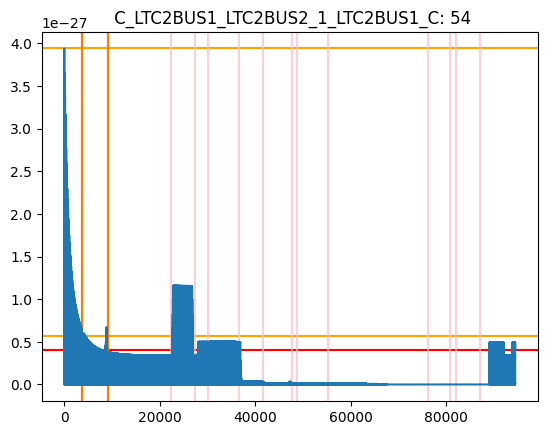

***********************************************************************************************
Sensor: 56  V_BUS13KV_AN
56
DD = 5766


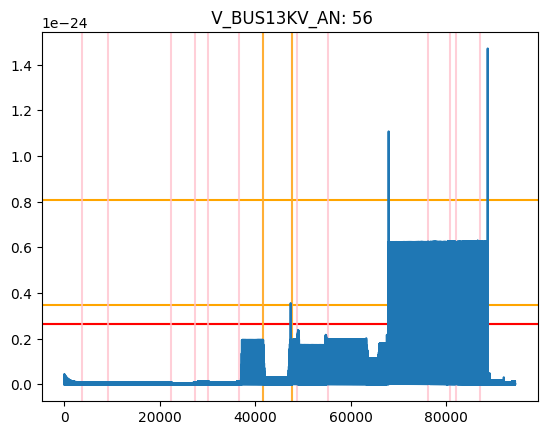

***********************************************************************************************
Sensor: 57  V_BUS13KV_BN
57
DD = 0


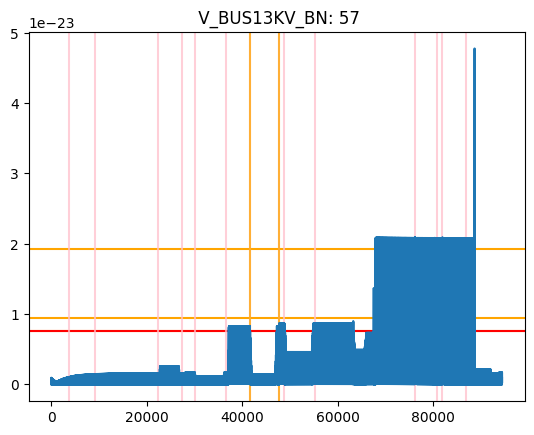

***********************************************************************************************
Sensor: 58  V_BUS13KV_CN
58
DD = 17


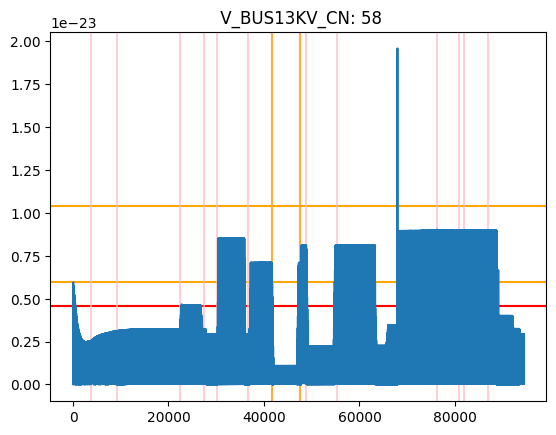

***********************************************************************************************
Sensor: 59  C_BUS13KV_DISTRIB1_1_BUS13KV_A
59
DD = None
59
DD = None
59
DD = None


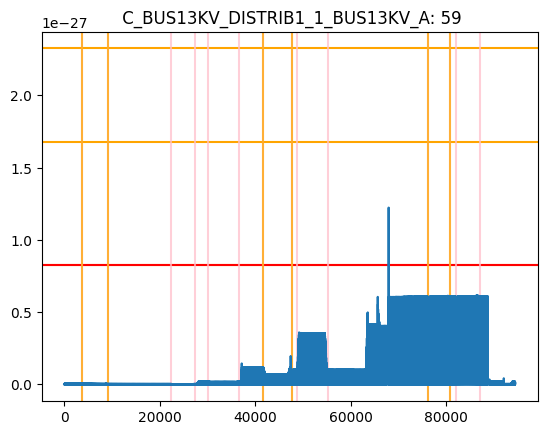

***********************************************************************************************
Sensor: 60  C_BUS13KV_DISTRIB1_1_BUS13KV_B
60
DD = None
60
DD = None
60
DD = None


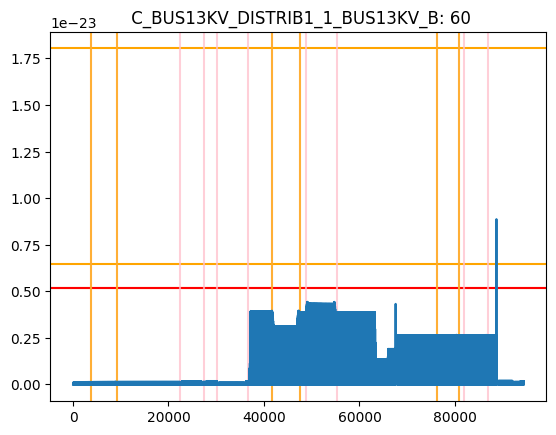

***********************************************************************************************
Sensor: 61  C_BUS13KV_DISTRIB1_1_BUS13KV_C
61
DD = None
61
DD = None
61
DD = None


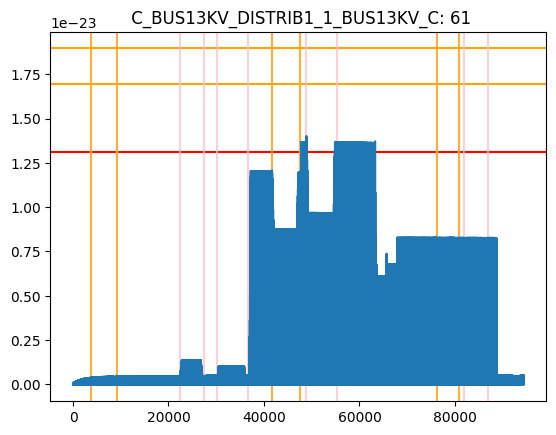

***********************************************************************************************
Sensor: 62  V_BUS13KV2_AN
62
DD = 1
62
DD = None


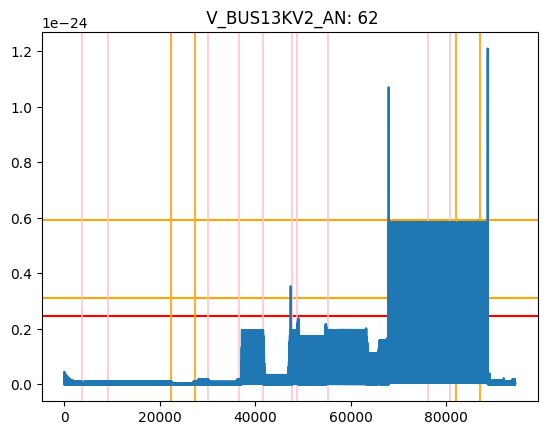

***********************************************************************************************
Sensor: 63  V_BUS13KV2_BN
63
DD = 0


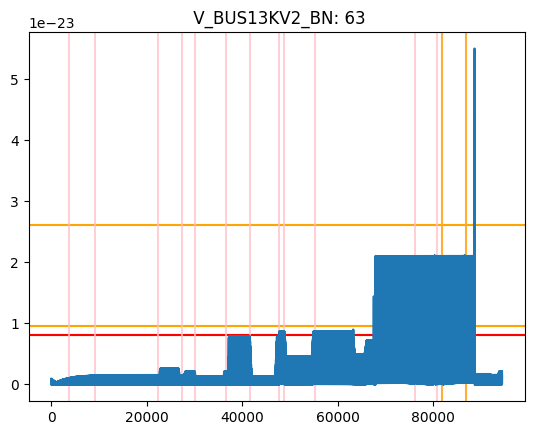

***********************************************************************************************
Sensor: 64  V_BUS13KV2_CN
64
DD = 17


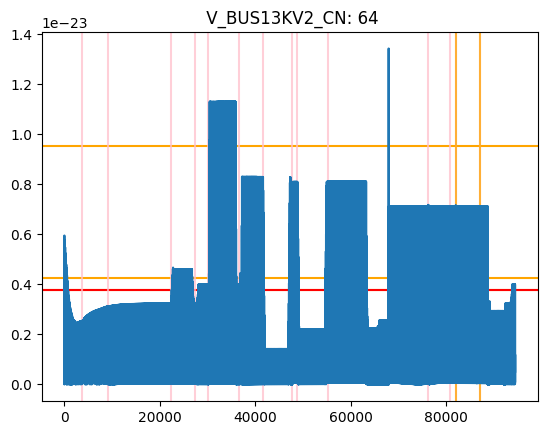

***********************************************************************************************
Sensor: 65  C_BUS13KV2_DB122_1_BUS13KV2_A


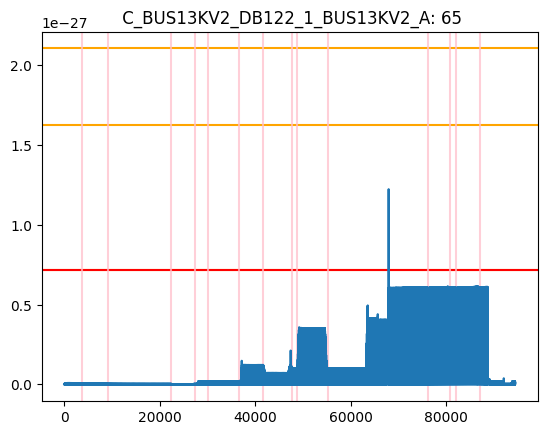

***********************************************************************************************
Sensor: 66  C_BUS13KV2_DB122_1_BUS13KV2_B
DD = None
DD = None


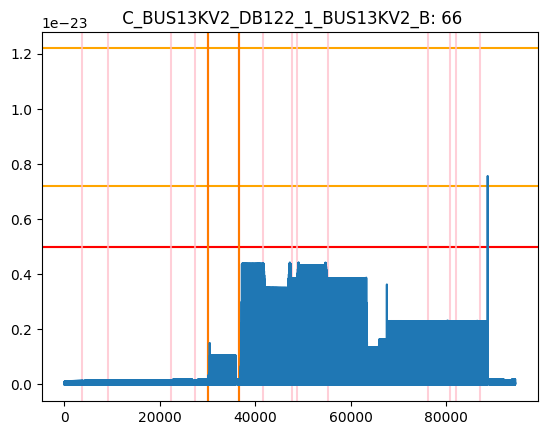

***********************************************************************************************
Sensor: 67  C_BUS13KV2_DB122_1_BUS13KV2_C


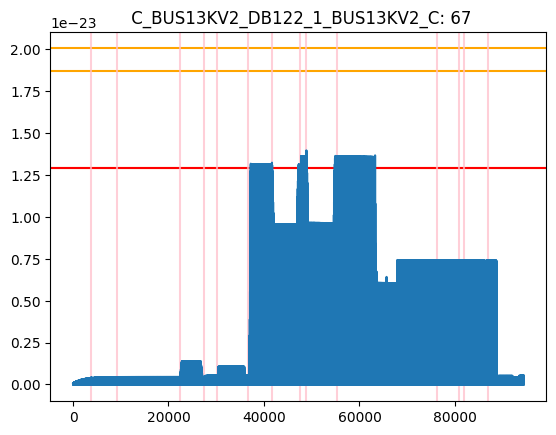

***********************************************************************************************
Sensor: 68  V_2DBU7_AN
DD = 8
DD = 8


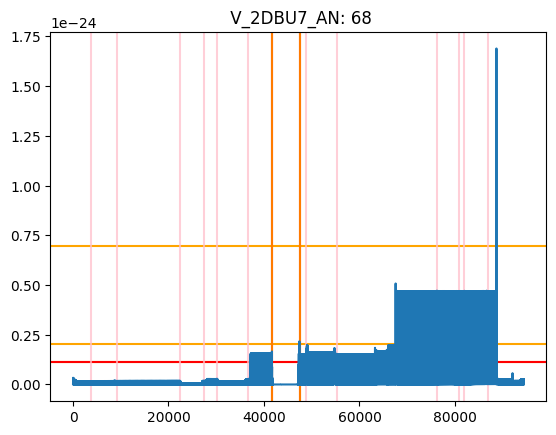

***********************************************************************************************
Sensor: 69  V_2DBU7_BN
DD = 276
DD = 276


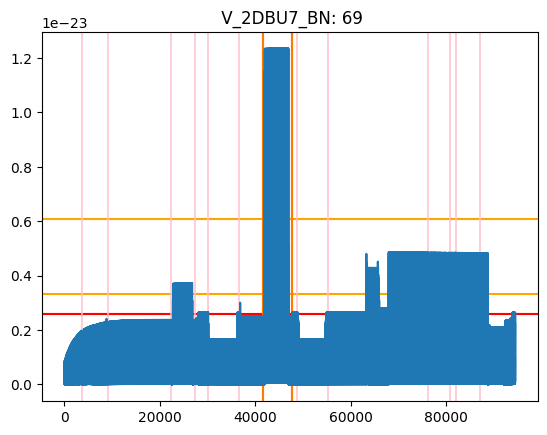

***********************************************************************************************
Sensor: 70  V_2DBU7_CN
DD = 16
DD = 16


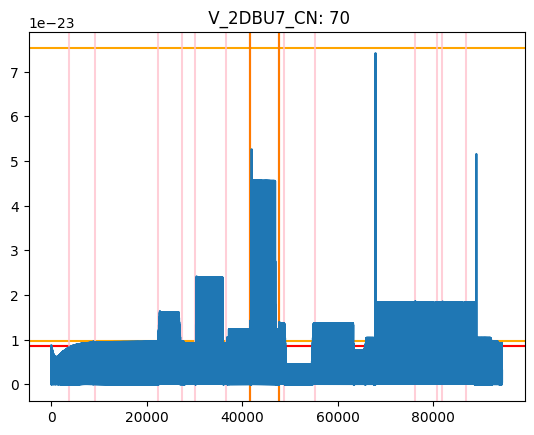

***********************************************************************************************
Sensor: 71  C_2DBX3_2DBU7_1_2DBU7_A
DD = 0
DD = 5810
DD = 5810


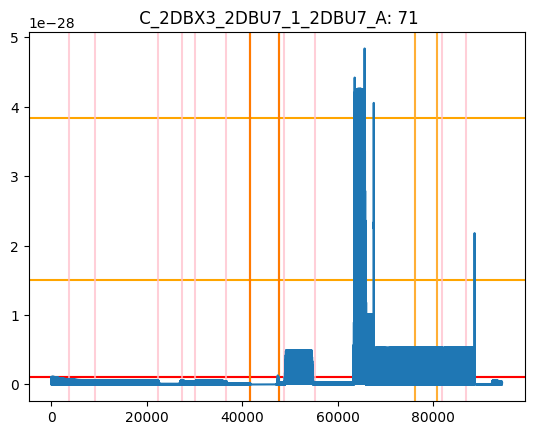

***********************************************************************************************
Sensor: 72  C_2DBX3_2DBU7_1_2DBU7_B
DD = None
DD = None
DD = None


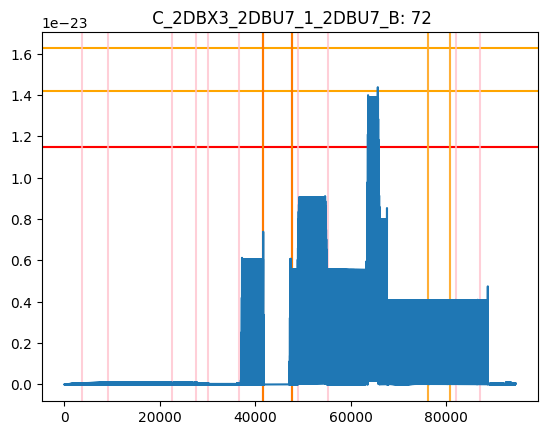

***********************************************************************************************
Sensor: 73  C_2DBX3_2DBU7_1_2DBU7_C
DD = None
DD = None
DD = None


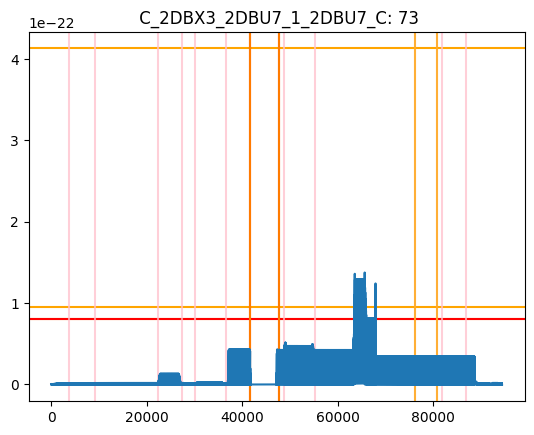

***********************************************************************************************
Sensor: 74  V_DBU6_AN
74
DD = 5771


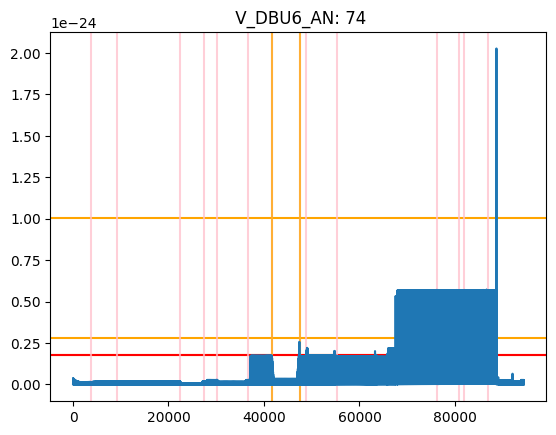

***********************************************************************************************
Sensor: 75  V_DBU6_BN
75
DD = 33


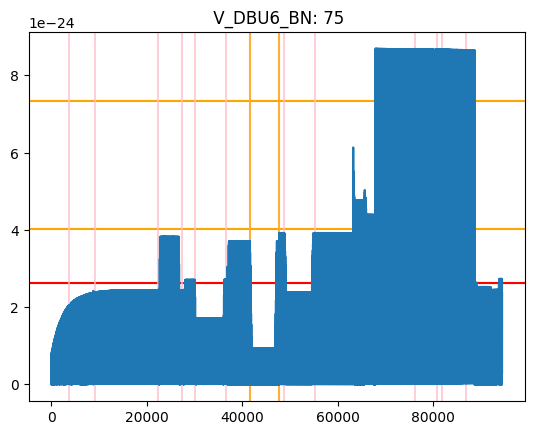

***********************************************************************************************
Sensor: 76  V_DBU6_CN
76
DD = 16


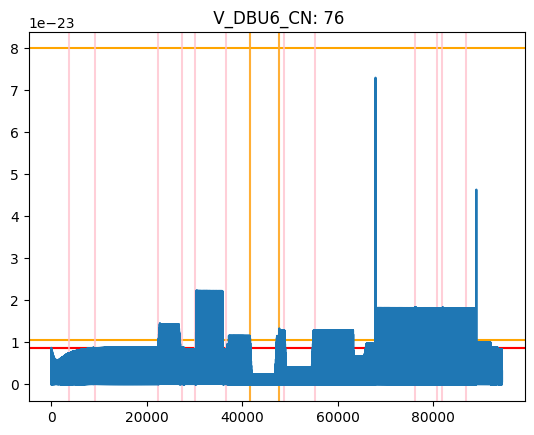

***********************************************************************************************
Sensor: 77  C_DBU5_DBU6_1_DBU6_A
DD = 0
DD = 0
DD = 9


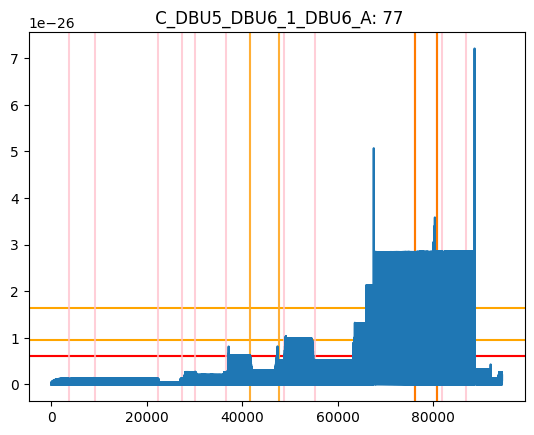

***********************************************************************************************
Sensor: 78  C_DBU5_DBU6_1_DBU6_B
DD = None
DD = None
DD = None


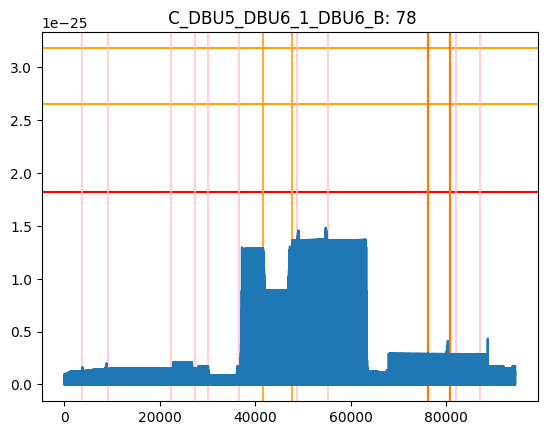

***********************************************************************************************
Sensor: 79  C_DBU5_DBU6_1_DBU6_C
DD = None
DD = None
DD = 21


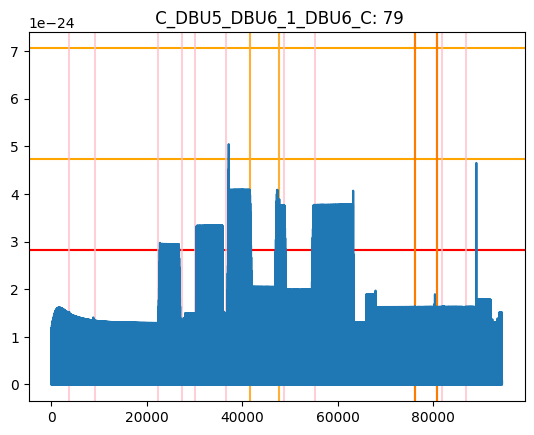

***********************************************************************************************
Sensor: 80  V_2DBU17_AN
80
DD = 0


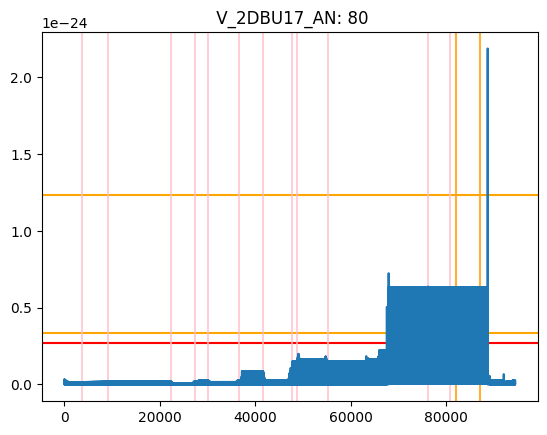

***********************************************************************************************
Sensor: 81  V_2DBU17_BN
81
DD = 0


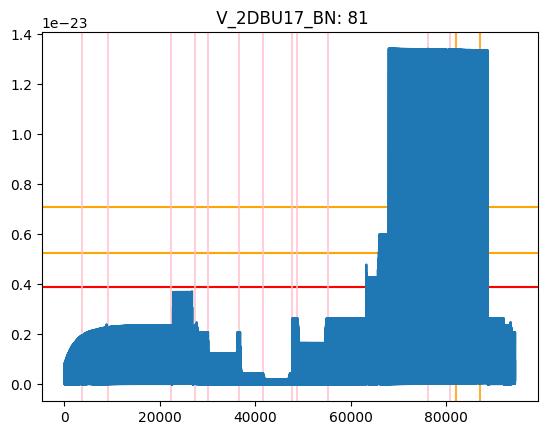

***********************************************************************************************
Sensor: 82  V_2DBU17_CN
82
DD = 14


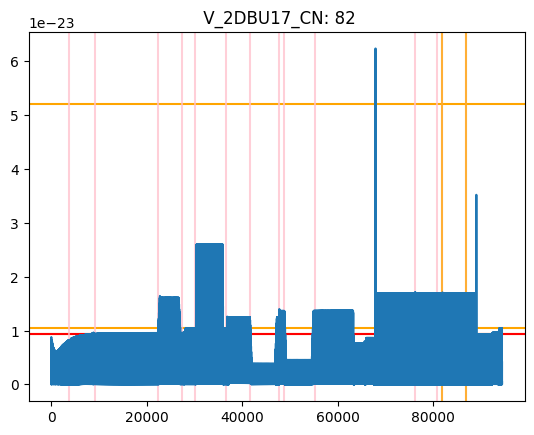

***********************************************************************************************
Sensor: 83  C_3DBX3_2DBU17_1_2DBU17_A


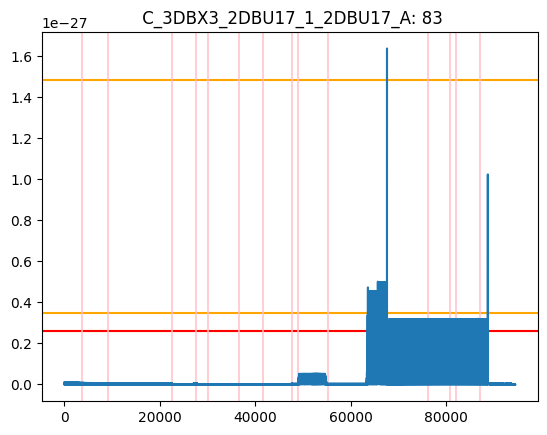

***********************************************************************************************
Sensor: 84  C_3DBX3_2DBU17_1_2DBU17_B
84
DD = None


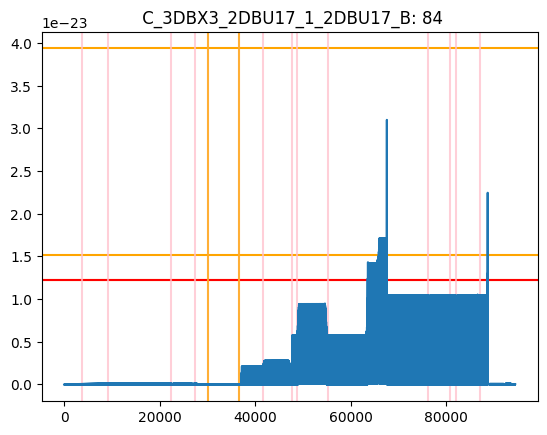

***********************************************************************************************
Sensor: 85  C_3DBX3_2DBU17_1_2DBU17_C


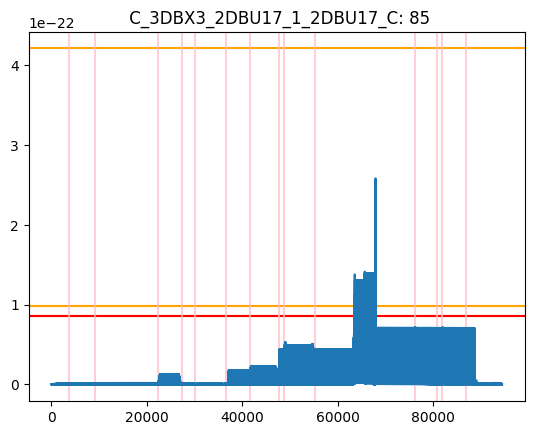

***********************************************************************************************
Sensor: 86  V_DBU16_AN
DD = 0
DD = 0


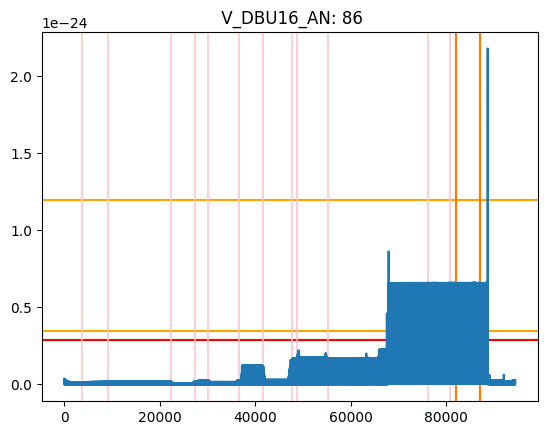

***********************************************************************************************
Sensor: 87  V_DBU16_BN
DD = 0
DD = 0


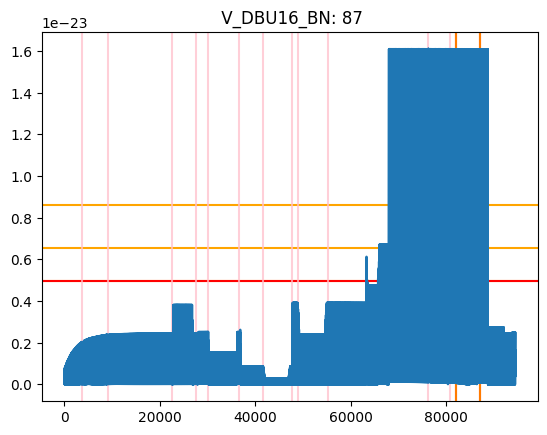

***********************************************************************************************
Sensor: 88  V_DBU16_CN
DD = 15
DD = 15


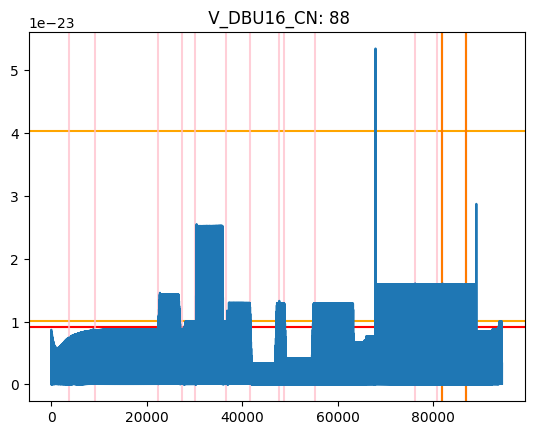

***********************************************************************************************
Sensor: 89  C_DBU15_DBU16_1_DBU16_A


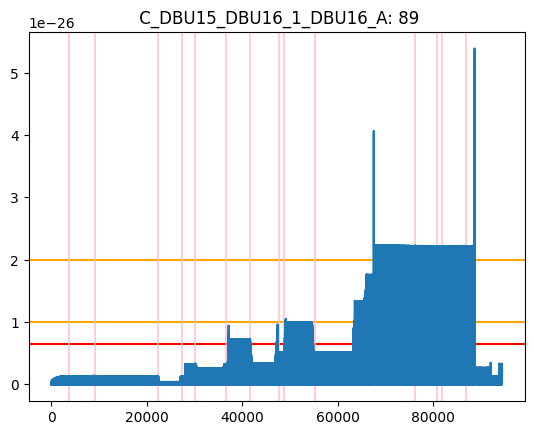

***********************************************************************************************
Sensor: 90  C_DBU15_DBU16_1_DBU16_B
90
DD = None


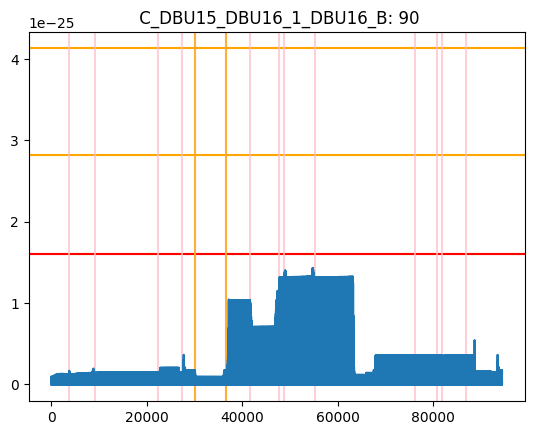

***********************************************************************************************
Sensor: 91  C_DBU15_DBU16_1_DBU16_C


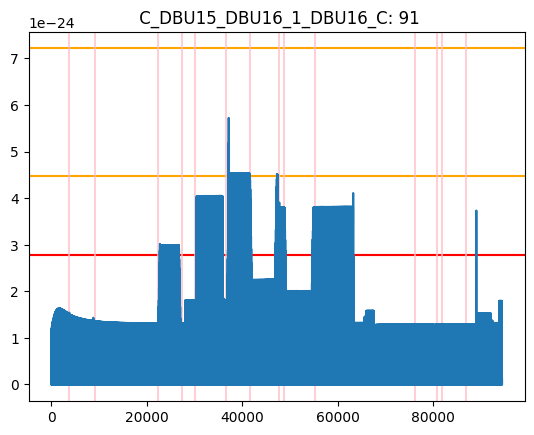

[None, 339, 339, None, 13, 4, 1, None, 0, None, None, None, 37, 0, 0, None, None, None, None, None, None, None, None, None, None, 12, 12, 3, 3, 1, 1, 5766, 0, 17, None, None, None, None, None, None, None, None, None, 1, None, 0, 17, None, None, 8, 8, 276, 276, 16, 16, 0, 5810, 5810, None, None, None, None, None, None, 5771, 33, 16, 0, 0, 9, None, None, None, None, None, 21, 0, 0, 14, None, 0, 0, 0, 0, 15, 15, None]


In [327]:
LD_corr = []
at_neighbor = {}

rsum_list = rsum_list_corr
threshold = thresholds_corr_95
t_list = t_corr
persistency = 1

for index, i in enumerate(rsum_list):
    print("***********************************************************************************************")
    attack_in = (i > threshold[index]).nonzero()

    violations = (rsum_list > threshold.reshape(-1, 1))

    print(f"Sensor: {things[index]} {cols[things[index]-1]}")
    at_neighbor[things[index]] = attack_in
    plt.title(f"{cols[things[index]-1]}: {things[index]}")

    for t in t_list:
        plt.axhline(t[index], color='orange')

    plt.axhline(threshold[index], color='red')

    if things[index] in attack_dict:
        #if sensor is being attacked

        # ground truth
        attack_indices = df_test.index[
            (df_test['Time'] >= attack_dict[things[index]][0] * 1e6) &
            (df_test['Time'] <= attack_dict[things[index]][1] * 1e6)] - 1201

        for start, end in all_attack_indices:

            # if this is the attack time of the sensor, plot solid red lines
            if attack_indices[0] == start:
                DD = detection_delay(violations[index], [(start, end)], window, w, persistency)[0]
                LD_corr.append(DD)
                print(f"DD = {DD}")
                start_w = start-window-w
                end_w = end+window+w-1
                plt.axvline(start_w, color='red')
                plt.axvline(end_w, color='red')

            # otherwise, plot pink lines
            else:
                start_w = start-window-w
                end_w = end+window+w-1
                plt.axvline(start_w, color='pink', alpha=0.75)
                plt.axvline(end_w, color='pink', alpha=0.75)

            start_w = start-window-w
            end_w = end+window+w-1
            for starts, ate in attack_i.items():
              if starts == start and things[index] in ate:
                DD = detection_delay(violations[index], [(start, end)], window, w, persistency)[0]
                LD_corr.append(DD)
                print(f"DD = {DD}")
                plt.axvline(start_w, color='orange', alpha=0.75)
                plt.axvline(end_w, color='orange', alpha=0.75)

    else:
         for start, end in all_attack_indices:
            start_w = start-window-w
            end_w = end+window+w-1
            plt.axvline(start_w, color='pink', alpha=0.75)
            plt.axvline(end_w, color='pink', alpha=0.75)
            for starts, ate in attack_i.items():
              if starts == start:
                if things[index] in ate:
                  print(things[index])
                  DD = detection_delay(violations[index], [(start, end)], window, w, persistency)[0]
                  LD_corr.append(DD)
                  print(f"DD = {DD}")
                  plt.axvline(start_w, color='orange', alpha=0.75)
                  plt.axvline(end_w, color='orange', alpha=0.75)

    plt.plot(i)
    plt.show()

print(LD_corr)

In [328]:
LD_corr, LD_cov

([None,
  339,
  339,
  None,
  13,
  4,
  1,
  None,
  0,
  None,
  None,
  None,
  37,
  0,
  0,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  12,
  12,
  3,
  3,
  1,
  1,
  5766,
  0,
  17,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  1,
  None,
  0,
  17,
  None,
  None,
  8,
  8,
  276,
  276,
  16,
  16,
  0,
  5810,
  5810,
  None,
  None,
  None,
  None,
  None,
  None,
  5771,
  33,
  16,
  0,
  0,
  9,
  None,
  None,
  None,
  None,
  None,
  21,
  0,
  0,
  14,
  None,
  0,
  0,
  0,
  0,
  15,
  15,
  None],
 [None,
  None,
  None,
  None,
  0,
  0,
  None,
  None,
  0,
  0,
  0,
  None,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  None,
  None,
  None,
  0,
  0,
  0,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  0,
  0,
  

In [329]:
order_attack = ['CT', 'Vphase', 'Cphase', 'GPS', 'GPS', 'CT', 'PT']

In [330]:
hops = {}
types = 1.1
for key, value in attack_dict.items():
  if types == value[0]:
    if value[1] not in hops:
      hops[value[1]]= [key]
    else:
      hops[value[1]] += [key]
  else:
    types = value[0]
    hops[value[1]]= [key]

In [331]:
stu = []
for i in hops:
  stu += [i]

In [332]:
all_attack_indice = []
for i in all_attack_indices:
  all_attack_indice += [i]
sorted(all_attack_indice)

[(4080, 8879),
 (22800, 27119),
 (30480, 36239),
 (42000, 47279),
 (49200, 54959),
 (76560, 80399),
 (82320, 86639)]

In [333]:
at_neighbor

{1: (array([37208, 37209, 37210, ..., 88695, 88696, 88697]),),
 2: (array([37155, 37163, 37164, ..., 63285, 63286, 63287]),),
 3: (array([37223, 37224, 37225, ..., 88674, 88675, 88676]),),
 5: (array([22789, 22790, 22791, ..., 88671, 88672, 88673]),),
 6: (array([37127, 37128, 37166, ..., 88694, 88695, 88696]),),
 7: (array([    1,     2,     3, ..., 93436, 93476, 93516]),),
 8: (array([    0,    14,    15, ..., 94393, 94432, 94433]),),
 9: (array([   16,    17,    18, ..., 94419, 94420, 94421]),),
 10: (array([    0,     1,     2, ..., 94446, 94447, 94453]),),
 12: (array([47450, 47451, 47452, 47453, 47454, 47455, 47459, 47460, 47461,
         47462, 47463, 47464, 47530, 47531, 47532, 47533, 47534, 47535,
         47539, 47540, 47541, 47542, 47543, 47544, 47610, 47611, 47612,
         47613, 47614, 47615, 47619, 47620, 47621, 47622, 47623, 47624,
         47689, 47690, 47691, 47692, 47693, 47694, 47695, 47699, 47700,
         47701, 47702, 47703, 47704, 47739, 47740, 67578, 67579, 675

In [334]:
def false_localization(attack_list ,hop):
  FL = 0
  for attacked_sensor in attack_list:
    if attacked_sensor in hop:
      continue
    else:
      FL += 1
  FLR = FL/len(hop)
  return FLR

Summary:

In [335]:
n = 0
falseLR = []
for start, end in sorted(all_attack_indice):
  attack_list = []
  print("***********************************************************************************************")
  print(f'For the {order_attack[n]} attack starting at index: {start} and ending at index: {end}')
  for key, values in at_neighbor.items():
    for i in values:
      if len(i) > 0:
        for k in i:
          if k+350 > start and k+350 < end:
            if key not in attack_list:
              attack_list += [key]
  print(f'These were the sensors that were detected inside that particular attack interval: {attack_list}')
  for atta in attack_list:
    hop = []
    for j in hops[stu[n]]:
      if j not in emptyr:
        hop += [j]
        hop += adj_list[j]
      else:
        hop +=[j]
    falseLRs = false_localization(attack_list, hop)
    falseLR += [falseLRs]
    if atta in hop:
      print(f'Attacked has been detected at sensor: {atta}')
    else:
      print(f'{atta} is a False Localization')

  if len(attack_list) > 0:
    print(f'This is the 1-hop neighborhood that we are interested in {sorted(hop)}')
  n += 1

***********************************************************************************************
For the CT attack starting at index: 4080 and ending at index: 8879
These were the sensors that were detected inside that particular attack interval: [7, 8, 9, 10, 15, 16, 17, 35, 52, 53, 54, 70]
Attacked has been detected at sensor: 7
Attacked has been detected at sensor: 8
Attacked has been detected at sensor: 9
Attacked has been detected at sensor: 10
Attacked has been detected at sensor: 15
Attacked has been detected at sensor: 16
Attacked has been detected at sensor: 17
Attacked has been detected at sensor: 35
Attacked has been detected at sensor: 52
Attacked has been detected at sensor: 53
Attacked has been detected at sensor: 54
Attacked has been detected at sensor: 70
This is the 1-hop neighborhood that we are interested in [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15,

In [336]:
falseLR

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [337]:
np.mean(falseLR)

0.0

In [338]:
np.mean(df_test['Time'][df_test['Time'] > 0.25e6].diff())

208.33200075946164